# Выявление профилей потребителей

# Материалы
Презентация: ссылка на яндекс диск - https://disk.yandex.ru/i/p_N48-2JH1COMw

**Описание проекта:**

В ходе данной работы мы примем на себя роль аналитиков данных в интернет магазине товаров для дома «Пока все ещё тут». К нам обратились коллеги с маркетингового отдела с просьбой исследовать наших покупателей, сегментировать их по определенным признакам и дать рекомендации по улучшению маркетинга. Работу будем выполнять на основе данных с транзакциями интернет-магазина.

**Цель работы:**

На основе полученных результатов, дать рекомендации: 
1. ***Каким покупателям и в какое время следует рассылать рекламные предложения с определенными товарами***.
2. ***Для каждого сегманта покупателей разработать специальные стратегии по увеличению объема продаж.***
3. ***Проработать стратегии по увеличению возвращаемости клиентов для разных сегментов.***

**Исходные данные:**

Датасет с транзакциями интернет-магазина «Пока все ещё тут».

Колонки:
- date (дата заказа);    
- customer_id (идентификатор покупателя);
- order_id (индентификатор заказа);
- product (наименование товара);
- quantity (количество товара в заказе);
- price (цена товара).

**План работы:**

1. Первым делом импортируем необходимые нам библиотеки, введем переменную с исходными данными и изучим общую информцию о датасете.
2. Далее займемся подготовкой данных к анализу. Скорректируем типы данных, проверим датафрейм на пропуски и при необходимости постараемся заменить их. Так же при наличии дубликатов обработаем их, добавим для удобства дополнительные столбцы и постараемся найти аномалии в данных.
3. Далее приступим к исследовательскому анализу, который будет разделен на два этапа. Первый будет посвящен анализу общих показателей бизнеса - выручка, средний чек и др., а так же категоризируем товары и посмотрим как ведут себя разные категории в разрезе по месяцам. 
4. Вторым же этапом в исследовательском анализе будет исследование покупателей, нам предстоить поделить их на сегменты, используя RFM анализ, однако в данной работе будем использовать его сжатую версию - FM анализ (показатели частоты и выручки). Посмотрим что характерно для тех или иных сегментов, как они себя ведут в разрезе сезонности (по месяцам). 
5. Следующим шагом будет проверка гипотез, выдвенем две гипотезы и проверим их, используя статистические тесты.
6. Кульминацией нашего исследования будут рекомендации, посвященные маркетинговым стратегиям для разных сегментов покупателей. Так же в дополнении дадим рекомендации по улучшению объема продаж для разных сегментов и как улучшить возвращаемость для них.
7. Так как наши коллеги из маркетингового отдела могут быть не ознакомлены с техническими особенностями нашего исследования, то для простоты представления полученных результатов подготовим презентацию для них с основными  выводами и идеями.
8. Подведем итоги по исследованию и дадим рекомендации.

## Знакомство с данными

In [1]:
# Импортируем необходимые нам библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
from plotly.subplots import make_subplots as sp
!pip install numpy

Запишем наши исходные данные в переменную data и сразу выведем общую информацию по датасету

In [2]:
data = pd.read_csv('D:\Python\ecom_dataset_upd.csv')
display(data.info() ,data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


None

date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  
0    Комнатное растение в горшке Алое Вера, d12, h30         1  142.0  
1  Комнатное растение в горшке Кофе Арабика, d12,...         1  194.0  
2                        Радермахера d-12 см h-20 см         1  112.0  
3                   Хризолидокарпус Лутесценс d-9 см         1  179.0  
4                     Циперус Зумула d-12 см h-25 см         1  112.0

Итак, в исходном датасете 7474 строки не мало, но и не много. Далее видим, что столбец дата имеет некорректный тип данных и представляется как целочисленное значение, так же price имеет тип - float, по ходу предобработки посмотрим необходимо ли изменить тип данных или же оставить как есть.

## Предобработка данных

### Изменение типа данных

Первым делом, начнем готовить данные для анализа с изменения типа данных.

In [3]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
data.head(5)

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  
0    Комнатное растение в горшке Алое Вера, d12, h30         1  142.0  
1  Комнатное растение в горшке Кофе Арабика, d12,...         1  194.0  
2                        Радермахера d-12 см h-20 см         1  112.0  
3                   Хризолидокарпус Лутесценс d-9 см         1  179.0  
4                     Циперус Зумула d-12 см h-25 см         1  112.0

Далее столбец price, проверим является и сумма десятичным числом, если да, то отсавим тип данных float

In [4]:
print('Сумма по столбцу price:',data.price.sum())

Сумма по столбцу price: 3578084.083333333


Оставляем тип данных как есть.

### Проверка на пропуски

In [5]:
data.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Отлично! В исходном датасете пропусков не обнаружено. Переходим к дубликатам.

### Проверка на дубликаты

Первым делом проверяем явные дубликаты

In [6]:
data.duplicated().sum()

0

Проверим дубликаты по определенным столбцам order_id и poduct.

In [7]:
data.loc[data.duplicated(subset=['order_id','product']) == 1].sort_values(['order_id','product'])

date                           customer_id  order_id  \
376  2018-10-23 13:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
509  2018-10-28 19:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
588  2018-11-02 14:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
758  2018-11-10 17:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
816  2018-11-15 15:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
...                  ...                                   ...       ...   
6703 2019-10-28 06:00:00  b89ace7f-7017-408c-8755-c4ff39b50980     73104   
6711 2019-10-28 21:00:00  cb65d08a-dae7-4890-aef0-bb9f79055e02     73108   
6728 2019-10-31 00:00:00  ffaeab76-3a8d-49ee-860f-17273b2fc8a2     73136   
6729 2019-10-31 02:00:00  ffaeab76-3a8d-49ee-860f-17273b2fc8a2     73136   
6736 2019-10-31 16:00:00  344aa778-e436-419e-a9c6-9b8f37b7c1df     73137   

                                                product  quantity   price  
376   Рассада зелени для кухни Лаванды в кассете по ...         1   315.0  
509   Рассада зелени для кухни Лаванды в кассете по ...         1   315.0  
588   Рассада зелени для кухни Лаванды в кассете по ...         1   315.0  
758   Рассада зелени для кухни Лаванды в кассете по ...         1   315.0  
816   Рассада зелени для кухни Лаванды в кассете по ...         1   315.0  
...                                                 ...       ...     ...  
6703                     Циперус Зумула d-12 см h-25 см         2   112.0  
6711                                Мирт d-9 см h-15 см         1   134.0  
6728  Таз пластмассовый со стиральной доской (Иж), 1...         1   397.0  
6729  Таз пластмассовый со стиральной доской (Иж), 1...         1   397.0  
6736         Сумка-тележка 2-х колесная Gimi Argo синяя         1  1087.0  

[1920 rows x 6 columns]

In [8]:
print('Доля дубликатов по столбцам order_id и product:',
      round(data.loc[data.duplicated(subset=['order_id','product']) == 1, 'order_id'].count() / data['order_id'].count(),2))

Доля дубликатов по столбцам order_id и product: 0.26


Довольно много дубликатов по столбцам order_id и product просто так отбросить мы их не можем, а скорее всего и не должны. Так как датасет описывает транзакции, то есть предположение, что эти дубли связаны с отменой заказа и возвратом денежных средств по ним, либо же с корректировкой заказа, так же стоит отметить, что дата у этих дубликатов разная. В данном случае оставим дубликаты.

### Добавление столбцов

Первым делом, добавим колонку с месяцем и годом. Данная колонка нам понадобится для изучения динамики сезонности товаров в дальнейшем.

In [9]:
data['month'] = data['date'].dt.strftime('%Y-%m')
data.head()

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price    month  
0    Комнатное растение в горшке Алое Вера, d12, h30         1  142.0  2018-10  
1  Комнатное растение в горшке Кофе Арабика, d12,...         1  194.0  2018-10  
2                        Радермахера d-12 см h-20 см         1  112.0  2018-10  
3                   Хризолидокарпус Лутесценс d-9 см         1  179.0  2018-10  
4                     Циперус Зумула d-12 см h-25 см         1  112.0  2018-10

Так как у нас есть как цена товара, так и его количество в заказе, то добавим столбец с итоговой стоимостью позиции в заказе.

In [10]:
data['cost_position'] = data['price'] * data['quantity']

Далее нам необходимо отобрать ключевые слова по столбцу product для категоризации товаров. Сначала приведем все значения к нижнему регистру.

In [11]:
data['product'] = data['product'].str.lower()
data.head()

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  \
0    комнатное растение в горшке алое вера, d12, h30         1  142.0   
1  комнатное растение в горшке кофе арабика, d12,...         1  194.0   
2                        радермахера d-12 см h-20 см         1  112.0   
3                   хризолидокарпус лутесценс d-9 см         1  179.0   
4                     циперус зумула d-12 см h-25 см         1  112.0   

     month  cost_position  
0  2018-10          142.0  
1  2018-10          194.0  
2  2018-10          112.0  
3  2018-10          179.0  
4  2018-10          112.0

Далее выведем уникальные значения столцба.

In [12]:
set(data['product'])

{'наволочка wellness rs50, 1-арктик 100% хлопок, 50х70 см, белая',
 'хлорофитум d-13 см',
 'герань домашняя (пеларгония зональная) цветущая d12, h25-30, малиново розовая, простая',
 'антуриум андрианум многоцветковый красный d-12 см',
 'гладильная доска gimi jean green line 107х30 см',
 'калатея микс d-12 см',
 'рассада арбуза сорт огонек горшок 9х9 см p-9',
 'мыльница пластмассовая на ванну м2221 1702010',
 'штора для ванной комнаты bacchetta marmo серая текстильная 180х200 см 6027',
 'муррайя d-9 см',
 'чайник электрический василиса т30-2000 нержавеющая сталь черный c красным 2000 вт 1,8 л',
 'цикламен d-12 см h-20 цвет в ассортименте',
 'контейнер для свч полимербыт премиум 1,2 л 4356200',
 'вероника колосковая микс объем 1 л',
 'флокс друммонда смесь 0,1 г 4650091480401',
 'сумка-тележка хозяйственная rolser rg saquet, синяя, saq002 azul convert',
 'искусственный цветок подснежник садовый пластиковый белый',
 'урна-пепельница из нержавеющей стали, hobbyka/хоббика, 83*38см, па022',


Отобрав ключевые слова для каждой категории, создаем переменные-категории.

In [13]:
# Данная категория включает все цветы, в том числе в горшке и семена/кассеты.
flowers = ['роза', 'петуния' ,  'азалия' ,  'пеларгония' ,  'примула' ,  'дендробиум' ,
           'фаленопсис' ,  'герань' , 'цветок' ,  'пуансеттия' ,  'ранункулус', 'фаленопсис' ,
           'хризантема' ,  'колокольчик' , 'герань' ,  'искусственный', 'лобелия' , 'фиалка',
           'тюльпан' ,  'платикодон' 'кампанула', 'гайлардия','вербена', 'декабрист','бегония',
           'цинния', 'космея', 'мускари', 'кампанула', 'глоксиния', 'глоксиния', 'бальзамин', 
          'гортензия', 'гербера', 'флокс', 'бархатцы', 'алиссум', 'гвоздика', 'годеция', 'пуансетия',
          'цикламен', 'каланхое', 'крокусы', 'гипсофила', 'тюльпаны', 'калибрахоа', 'аквилегия',
          'гиацинты', 'нарцисс', 'гиацинт', 'бакопа', 'калибрахоа', 'георгина', 'котовник', 'фуксия',
          'синнингия', 'мимоза', 'калла', 'виола', 'лилейник', 'платикодон', 'энотера', 'гардения',
          'вероника', 'монарда', 'нивянник', 'рудбекия', 'барвинок', 'камнеломка', 'солидаго',
           'физостегия', 'бадан', 'цикламен,', 'эхинацея', 'астра', 'лен', 'лаватера', 'анемона',   
          'мединилла', 'импатиенс', 'амариллис', 'лантана', 'буддлея', 'кореопсис', 'остеоспермум',
          'аргирантерум', 'левкой', ]

# Категория plants включает в себя все виды растений, овощей, ягод и фруктов, а также же семена/горшки/кассеты для них.
plants = ['афеляндра', 'антуриум', 'цинерария', 'эхинокактус', 'душица','растение',
          'радермахера', 'хризолидокарпус', 'циперус', 'настурция', 'пеперомия',
          'кофе', 'юкка', 'лапчатка', 'соланум', 'незабудка', 'вербейник', 'адиантум',
          'кассете', 'шеффлера', 'суккулент', 'эвкалипт', 'нолина', 'пахира' 
         'адиантум', 'калатея', 'хлорофитум', 'эхеверия', 'мирт', 'иссоп', 'аспарагус',
         'молодило', 'мелисса', 'розмарин', 'нолина', 'альбука', 'крассула',
         'лаванда', 'артемизия', 'каллуна', 'подсолнечник', 'калоцефалус', 'эшшольция',
         'подсолнечник', 'гиностемма', 'ель', 'алоэ', 'сантолина', 'мята', 'капсикум', 
         'диффенбахия', 'кипарисовик', 'аптения', 'фиттония', 'скиммия', 'спатифиллум', 
         'фикус', 'лиана', 'кодонанта', 'седум', 'нефролепис', 'чабер', 'овсянница',
         'смолевка', 'лавр', 'ясколка', 'цитрофортунелла', 'гимнокалициум', 'папоротник',
         'патиссон', 'джункус', 'драцена', 'хоста', 'осина', 'сциндапсус', 'бузульник',
         'эпипремнум', 'муррайя', 'фатсия', 'хамедорея', 'зверобой', 'клен', 'замиокулькас',
         'пахира', 'литопс', 'патиссона', 'дерево','томата', 'огурец', 'салат', 'укроп',
          'базилик', 'морковь', 'тимьян', 'томат', 'баклажан', 'кабачок', 'тыква', 'петрушка',
          'зелени', 'огурца', 'горох', 'капусты', 'перца', 'тыквы', 'пряные', 'дыня','арбуз', 
          'земляника', 'виноград', 'клубника', 'арбуза', 'дыни', 'клубники', 'кабачка']

# Категория house_goods включает в себя товары для дома в том числе белье, строительные товары, товары для кухни и интерьера.
house_goods = ['тряпкодержатель', 'сушилка', 'чехол','карниз', 'гладильная', 'вешалка',
               'плечики', 'прищепок', 'корзина', 'сиденье', 'весы', 'доска', 'белье',
               'салфетница', 'обувница', 'чехол', 'салфеток', 'почтовый', 'подставка',
               'стакан', 'бидон', 'ковш', 'дозатор', 'контейнер', 'кувшин', 'простыня',
               'вешалок', 'ковров', 'ванной', 'подушка', 'полотенце', 'одежный',
               'прищепок', 'ёрш', 'ерш', 'посуды', 'салфетка', 'ящик', 'короб', 'коробка',
               'наматрасник', 'салфетка', 'вкладыши', 'наматрицник-чехол', 'утюг', 
              'халат', 'держатель', 'фен','вешалка-плечики', 'кухонные', 'кухонных',
              'ролик', 'ролика', 'покрывало','вешалка-сушилка', 'одеяло', 'вешалки',
              'подголовник', 'вантуз', 'этажерка', 'вешалка-перекладина', 'салфетки',
              'полотенец', 'штор', 'рукав', 'белья', 'полка', 'урна-пепельница', 'наматрацник',
              'наволочка', 'обувница-3', 'пододеяльник', 'колесах', 'корзинка', 'гигиенических',
              'вентиляционная', 'уголок', 'вакуумный', 'кафеля', 'окон', 'микрофибры', 'вешалка-стойка',
               'чайник', 'тарелка', 'термос', 'салатник', 'лоток', 'кружка', 'хлебница', 'емкость',
               'мантоварка-пароварка', 'крышка', 'кастрюля', 'противень', 'форма', 'сковородка', 
               'миксер', 'tepмокружка', 'кондитерский', 'вилка', 'ложка', 'столовый', 'котел', 
               'кружек', 'фужеров', 'толкушка', 'банка', 'сковорода', 'крышка', 'сковороды', 'масленка',
               'чайный', 'салатников', 'рыбочистка', 'овощеварка', 'терка', 'овощечистка', 'мини-сковорода',
               'бокалов', 'стаканов', 'измельчитель', 'мантоварка', 'ножей', 'выпечки', 'картофелемялка',
               'миска', 'пресс', 'кексов', 'приборов', 'термокружка', 'электроштопор', 'блюдце', 'бульонница',
               'термостакан', 'просеиватель', 'орехоколка', 'сито', 'блюдо', 'скалка', 'венчик', 'тортница',
               'сотейник', 'отделитель', 'сахарница', 'соковарка', 'соковыжималка',  'половник', 'кипятильник',
               'муляж', 'кашпо', 'ковёр', 'ваза', 'штора', 'скатерть', 'коврик', 'простынь', 'постельное',
               'полки', 'кофр', 'плед', 'ковер', 'декоративная', 'светильник', 'комод', 'мыльница', 'фоторамка',
               'картина', 'композиция', 'стеллаж', 'пуф', 'ванна']

# Данная категория включает в себя инструменты, а так же дополнительные расходные материалы для них.
tools = ['перчатки', 'сумка', 'щетка', 'щетка-сметка', 'тележка', 'насадка', 'окномойка', 'лестница',
        'лестница' , 'стремянка', 'ведро', 'тележка', 'насадка-моп', 'стремянка', 'петля', 'подрукавник',
         'таз', 'швабра', 'нож', 'проволочный', 'окномойка', 'веник', 'стяжка', 'крепеж', 'пружина', 'таз',
        'стремянки', 'щетка-утюжок', 'сверел', 'ножеточка', 'сверло', 'корыто', 'сварка', 'шпингалет',
        'шнур', 'уличная', 'сметка', 'измерительный', 'линейка', 'лопатка', 'сумка-тележка', 'завертка',
        'лестница-стремянка', 'линейка,', 'губка', 'петля-стрела', 'пробка', 'шило', 'термометр',
        'рассекатель', 'сетка', 'ручка-скоба', 'инструмент', 'сверло-фреза', 'стремянка-табурет',
        'насадка-отжим', 'пылесос', 'сверло', 'фал', 'штангенциркуль', 'напильников', 'сверло',
        'фреза', 'прищепки', 'фиксатор-шар', 'скребок', 'отжим', 'титана', 'шпагат', 'гладильной',
        'веревка', 'мешок', 'инструментов', 'пьезозажигалка',  'щётка', 'совок', 'основание', 'стяжки',
        'мебельная']

# Данная категория включает в себя химические жидкости/субстанции/косметику.
chemical_substances = ['средство', 'календула','мыло', 'пиретрум', 'концентрат',
                       'пена', 'паста', 'биопорошок', 'крем', 'стиральный', 'бензин',
                      'антижир', 'ополаскиватель', 'кондиционер', 'соль', 'гель', 
                       'увлажняющая', 'мыло-скраб', 'антинакипин', 'отбеливатель']

Создадим для каждой переменной словарь с ключом - ключевым словом, а значением - наименованием категории. ( Данный код был написан при помощи chatGPT, идея следующая: мы создаем словари при помощи цикла, в каждой итерации
для ключевого слова присваиваем наименование категории. 

Изначально была схожая идея с созданием словаря со значениями (ключевыми словами) и ключом(категории). Однако при использовании функции возвращались только категории 'other'. Понял, что ошибка в том, что функция не применима к значению - списку из ключевых слов, важно было создать ключ-значение для всех ключевых слов).

In [14]:
flowers_dict = {flower: 'flowers' for flower in flowers} 
plants_dict = {plant: 'plants' for plant in plants} 
house_goods_dict = {house_good: 'house_goods' for house_good in house_goods}
tools_dict = {tool: 'tools' for tool in tools} 
chemical_substances_dict = {substance: 'chemical_substances' for substance in chemical_substances}

Создаем общий словарь

In [15]:
categoriez = dict(**flowers_dict, **plants_dict, **house_goods_dict, **tools_dict, **chemical_substances_dict)

Далее вводим две функции:

    1) get_category_from_column для присваивания категории;
    2) category_product для возврата обновленного датафрейма с применением функции get_category_from_column.

In [16]:
def get_category_from_column(name, category_dict):
    
    """ Для столбца с наименованием name используем метод split,
    чтобы разделить полное наименование продукта на отдельные слова.
    Далее для каждого полученного слова мы проверяем есть ли оно в ключах в словаре
    category_dict и присваиваем значения словаря (категорию),
    в противном случае возввращаем "other" """
    
    words = name.split() 
    for word in words: 
        if word in category_dict: 
            return category_dict[word] 
    return 'other'     
def category_product(data, name_column, category_dict):
    
    """" Создаем новый столбец category_product
    в исходном датафрейме и применяем к нему функцию get_category_from_column.
    возвращаем обновленный датафрейм. """
    
    data['category_product'] = data[name_column].apply(lambda name: get_category_from_column(name, category_dict)) 
    return data                                            

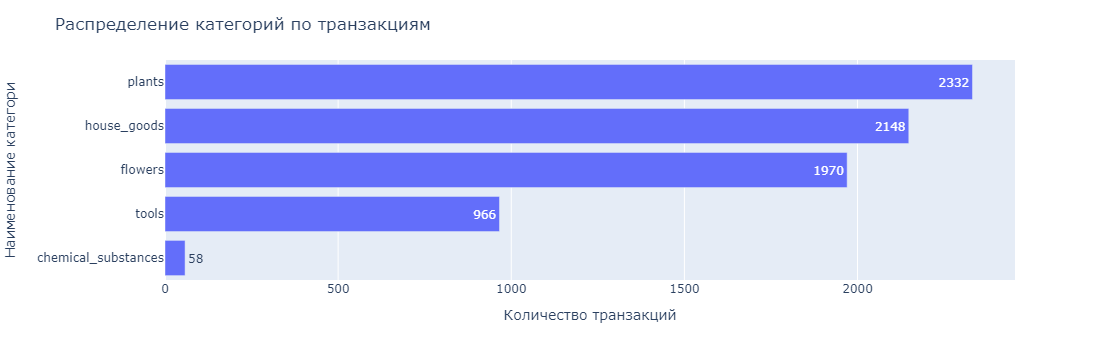

In [17]:
data = category_product(data,'product', categoriez)
category_transactions = data.pivot_table(
    index = 'category_product', values = 'product', aggfunc ='count'
    ).sort_values('product').reset_index()
category_transactions_fig = px.bar(category_transactions,
                                  x='product',
                                  y='category_product',
                                  text='product')
category_transactions_fig.update_layout(title='Распределение категорий по транзакциям',
                                       xaxis_title='Количество транзакций',
                                       yaxis_title='Наименование категори')

Больше всего получилось транзакций, связанных с категориям:
    
    - plants (2332);
    - house_goods (2148);
    - flowers (1970)
    
Меньше всего покупали товаров:

    - tools (966);
    - chemical_substances (58).
    

Только данный график показывает распределение именно транзакций, интересно было бы посмотреть на распределение по товарам:  каких категорий в нашем ассортименте больше, а каких меньше.

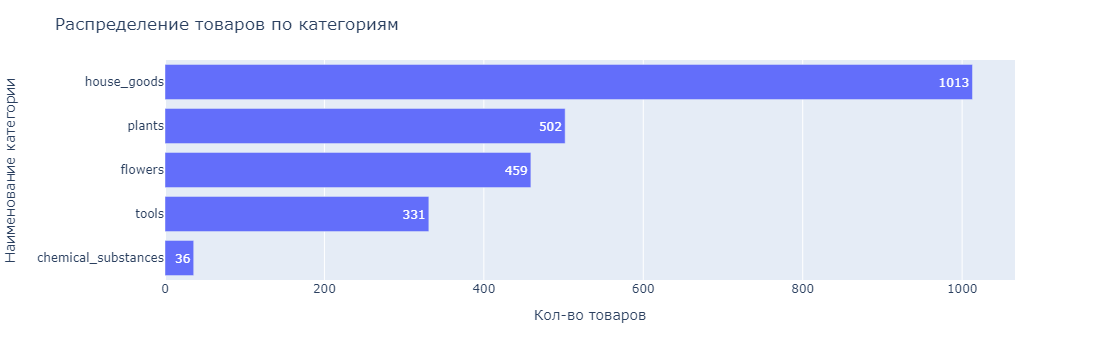

In [18]:
top_category = data.pivot_table(
    index='category_product', values = 'product', aggfunc = 'nunique'
    ).sort_values('product', ascending=True).reset_index()
top_category_fig = px.bar(top_category,
                          x = 'product',
                          y = 'category_product',
                         text='product')
top_category_fig.update_layout(title='Распределение товаров по категориям',
                              xaxis_title='Кол-во товаров',
                              yaxis_title='Наименование категории')

Картина по уникальным товарам изменилась. Наибольшее количество уникальных товаров в категории house_goods, flowers и plants, в то время как меньше всего ассортимента по tools и chemical_substances.

### Проверка аномалий

#### Распределение цен

Приступаем к проверке аномалий в датафрейме. Первым делом посмотрим на распределение по стоимости товаров.

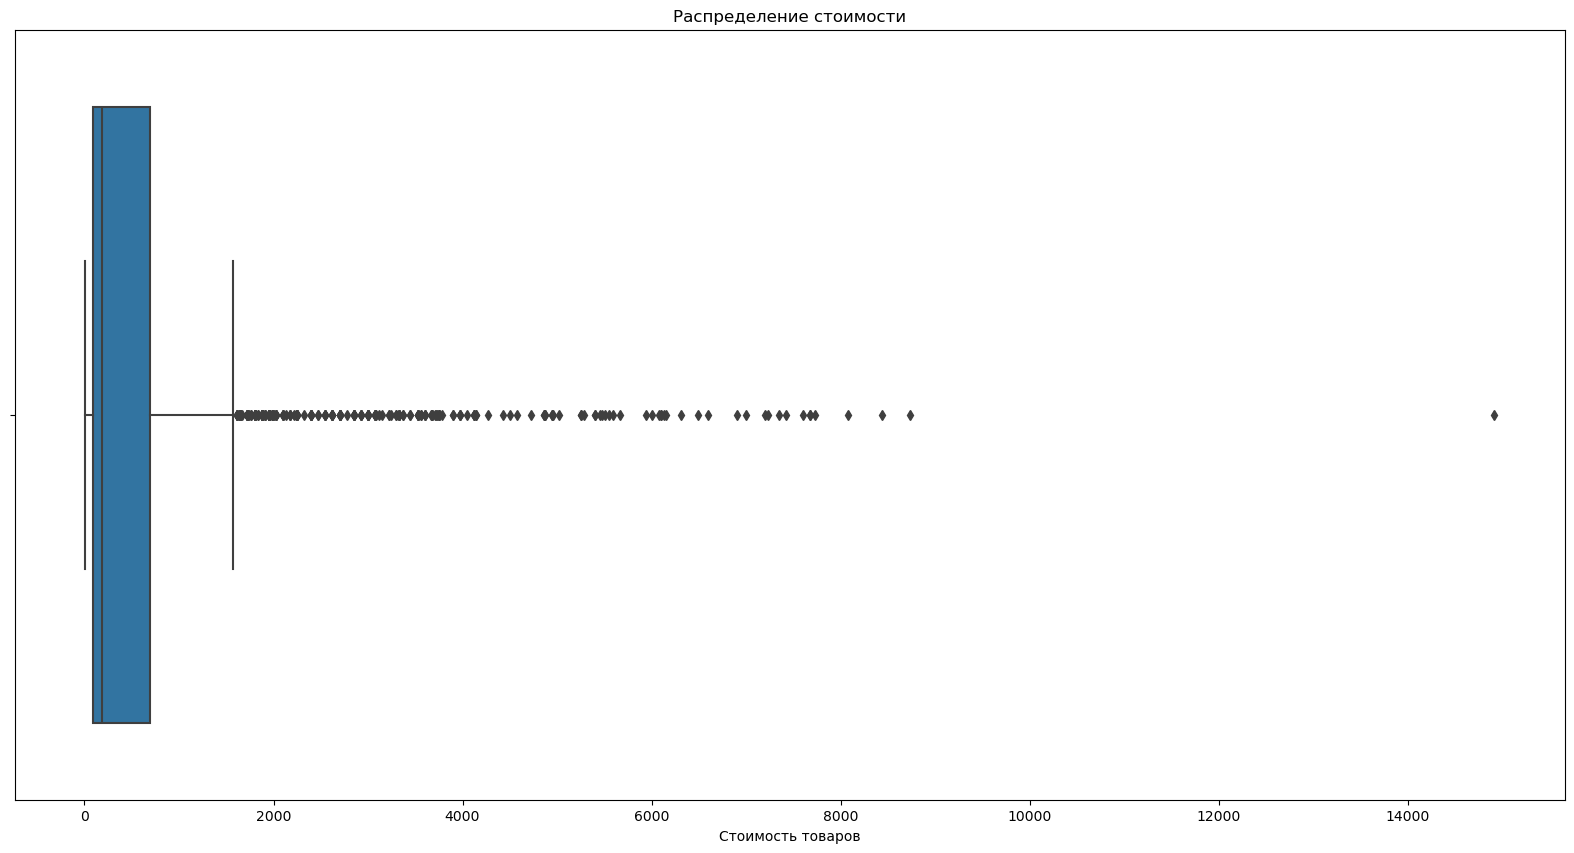

price
count   2341.000000
mean     634.851773
std     1127.275779
min        9.000000
25%       90.000000
50%      188.000000
75%      697.000000
max    14917.000000

In [19]:
plt.figure(figsize=(20, 10))
price_list = data.pivot_table(index='product', values = 'price', aggfunc='first').reset_index()
price_list_boxplot = sns.boxplot(data=price_list, x = price_list['price'])
plt.xlabel('Стоимость товаров')
plt.title('Распределение стоимости')
plt.show()
price_list.describe()

БОльшая часть товаров имеет стоимость ниже 700 д.е., однако встречаются и аномально высокие цены, доходящие вплоть до 15000 д.е. Ограничим график до 1700.

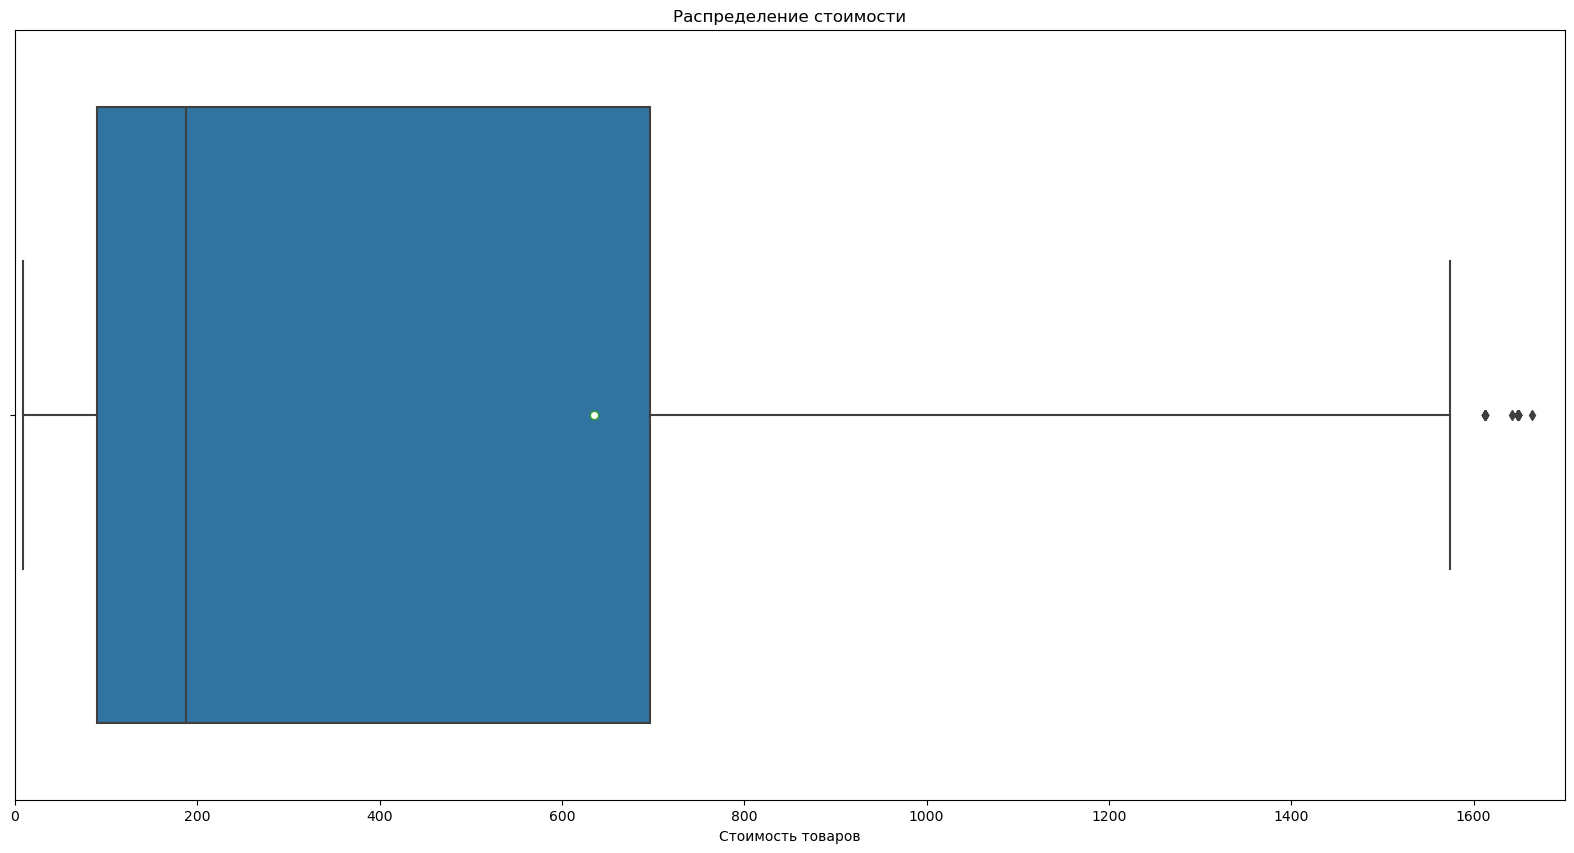

In [20]:
plt.figure(figsize=(20,10))
price_list_boxplot = sns.boxplot(data=price_list,
                                 x = price_list['price'],
                                 showmeans=True,
                                 meanprops={'marker':'o','markerfacecolor':'white'})
plt.xlim(0, 1700)
plt.xlabel('Стоимость товаров')
plt.title('Распределение стоимости')
plt.show()

Итак, основная масса стоимости товаров ниже 700, медианная стоимость 1 еденицы товара в интернет-магазине ~190 д. единиц. Так же можно заметить, как сильно выбросы влияют на среднюю цену, она сильно выше чем меиданное значение. В данном случае, мы не может отбрасывать и что-либо делать со стоимостью. Так как это фиксированная цена за товары, отбрасывать аномально высокие значения в данной случае не уместно, оставим аномалии как есть.

Взглянем так же на распределение цен по категориям товаров.

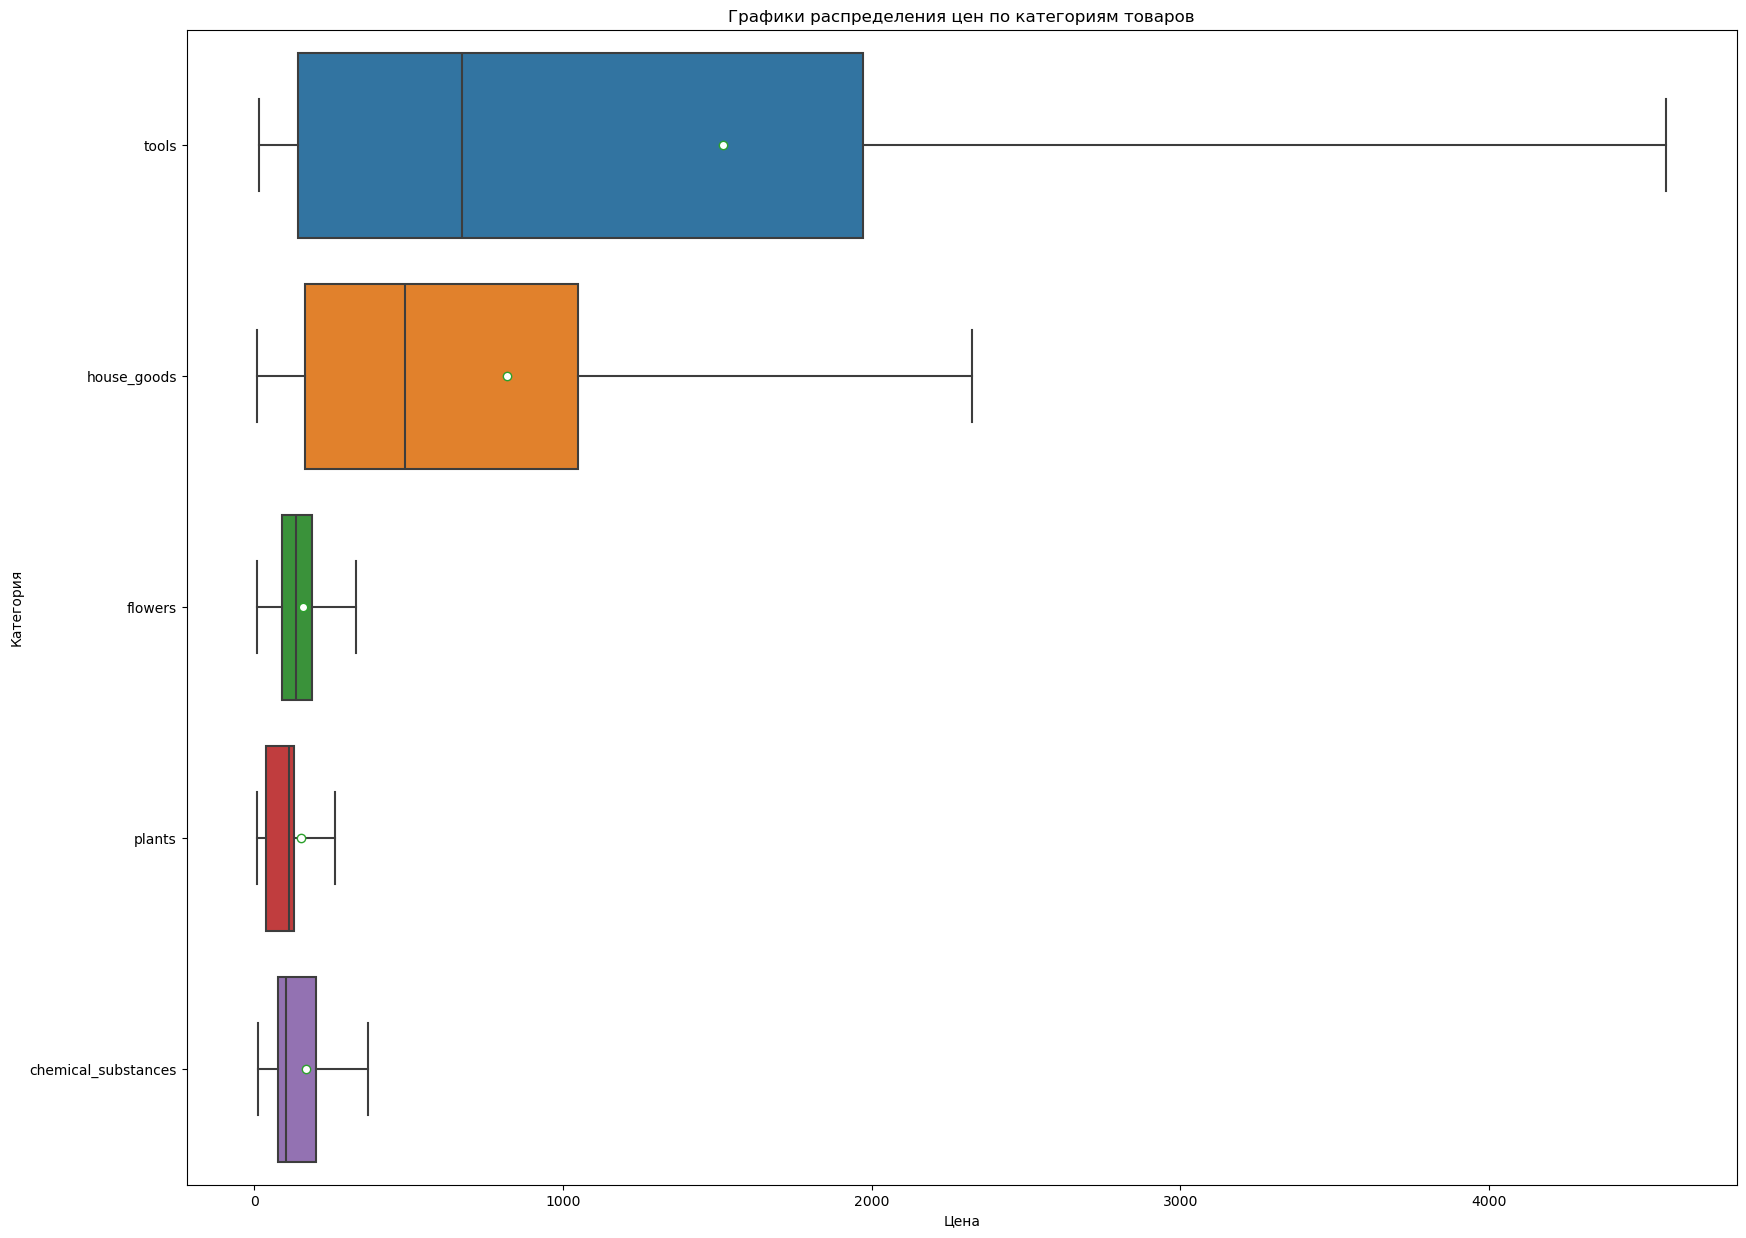

In [21]:
median_middle_price = data.loc[:, ['category_product','price']].groupby('category_product').median()\
    .sort_values('price',ascending=False)

price_list_category = data.pivot_table(index=['product','category_product'], values='price', aggfunc='first').reset_index()

plt.figure(figsize=(20,15))
sns.boxplot(data=price_list_category, x='price', y='category_product',
            order=median_middle_price.index, showmeans=True,
            meanprops={'marker':'o','markerfacecolor':'white'}, showfliers=False)
plt.xlabel('Цена')
plt.ylabel('Категория')
plt.title('Графики распределения цен по категориям товаров')
plt.show()

На графике распределения видно, что самые высокие цены у товаров из категорий - tools и house_goods. Наиболее низкие цены у plants, flowers и chemical_substances. У всех категорий присутствуют выбросы и можно заметить, как они сильно влияют на средние значения.

Для интереса посмотрим, что за товары с самой высокой стоимостью и низкой.

In [22]:
display(data.sort_values('price', ascending=False).head(1),
       data.sort_values('price').head(1))

date                           customer_id  order_id  \
5992 2019-07-29 17:00:00  0d87f4ae-465a-4fac-81e6-5d629761783e     72139   

                                                product  quantity    price  \
5992  сушилка уличная leifheit 85210 linomatic v 400...         1  14917.0   

        month  cost_position category_product  
5992  2019-07        14917.0      house_goods

date                           customer_id  order_id  \
5642 2019-07-03 22:00:00  1ec1ad59-a29b-4949-929d-f4fc4fe14758     14887   

                                                product  quantity  price  \
5642  алиссум (лобулярия) снежные одежды 0,2 г 46500...         1    9.0   

        month  cost_position category_product  
5642  2019-07            9.0          flowers

Самая высокая стоимость у уличной сушилки, по всей видимости она какая-то суперновороченная, возможно, с каким то подогревом. Самая низкая стоимость у семян цветов алиссум (лобулярия). Интересная особенность - оба заказа были совершены в июле 2019 года.

#### Распределение стоимости заказа.

Проверим как распределены стоимости заказов. Создадим датафрейм с заказами и их общей стоимостью.

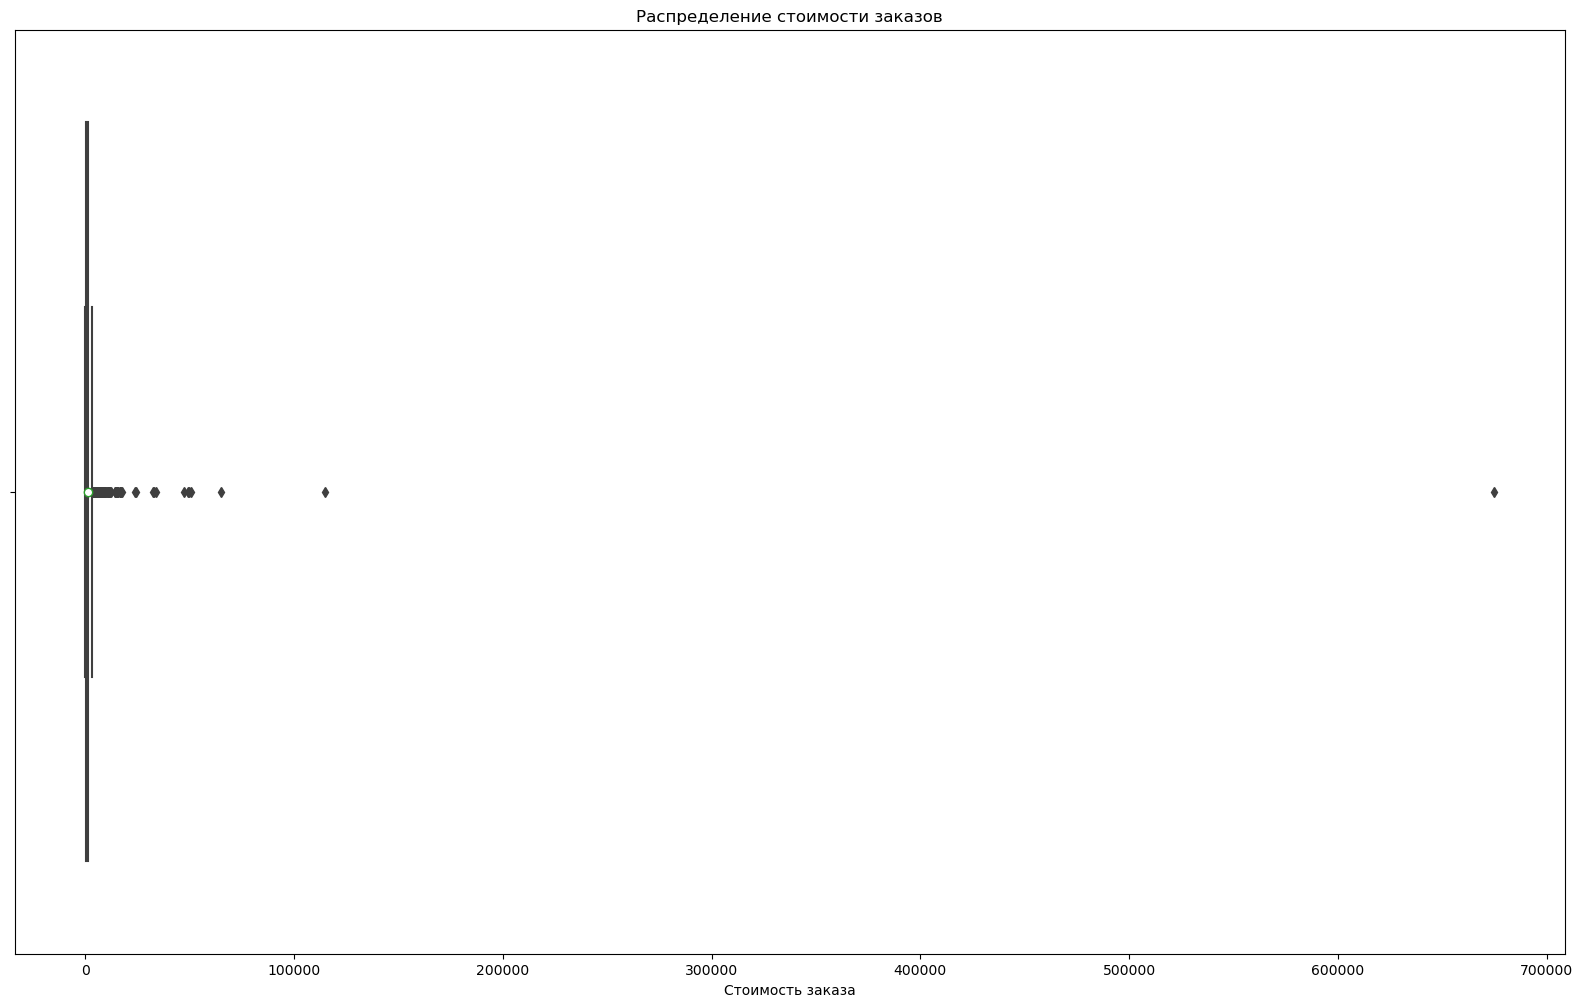

count      3521.000000
mean       1521.710996
std       11855.719938
min           9.000000
25%         200.000000
50%         600.000000
75%        1434.000000
max      675000.000000
Name: cost_position, dtype: float64

In [23]:
order_price = data
order_price = order_price.pivot_table(
    index='order_id', values='cost_position', aggfunc='sum').reset_index()
plt.figure(figsize=(20,12))
sns.boxplot(data=order_price, x = 'cost_position',
            showmeans=True, meanprops={'marker':'o','markerfacecolor':'white'})
plt.xlabel('Стоимость заказа')
plt.title('Распределение стоимости заказов')
plt.show()
order_price['cost_position'].describe()

Тут так же есть аномалии -  большие заказы, ораничим график до 4000 д.е.

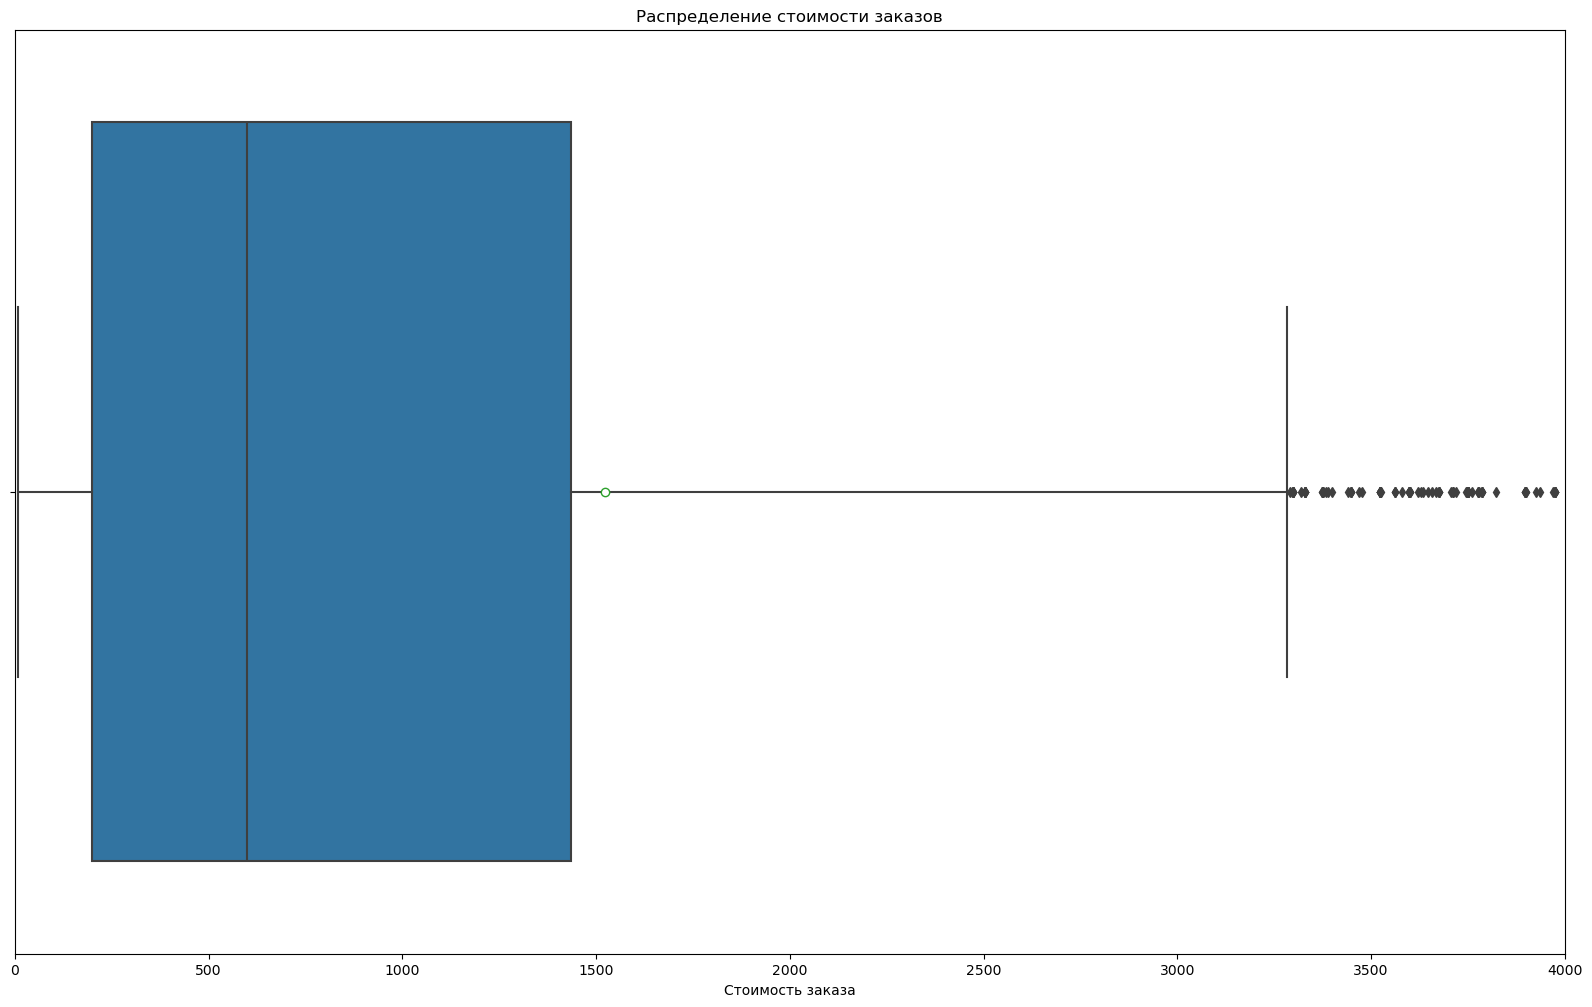

In [24]:
plt.figure(figsize=(20,12))
sns.boxplot(data=order_price, x = 'cost_position',
            showmeans=True, meanprops={'marker':'o','markerfacecolor':'white'})
plt.xlim(0,4000)
plt.xlabel('Стоимость заказа')
plt.title('Распределение стоимости заказов')
plt.show()

На графике видно, что аномальные значения опять сильно влияют на среднее значение, медианным же значением являются заказы стоимостью 600 д.е. БОльшая часть заказов находится в пределах до 1500 д.е. 

Выведем строки с заказом, стоимость которого выше 600000 д.е.

In [25]:
extra_orders = order_price.loc[order_price['cost_position'] > 600000]
data.query('order_id in @extra_orders.order_id')

date                           customer_id  order_id  \
5456 2019-06-18 15:00:00  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   

                                                product  quantity  price  \
5456  вантуз с деревянной ручкой d14 см красный, bur...      1000  675.0   

        month  cost_position category_product  
5456  2019-06       675000.0      house_goods

По товарам в данном заказе, можно предположить, что скорее всего это какая то промышленная оптовая закупка. Взглянем на долю кол-ва строк этого заказа в исходном датафрейме.

In [26]:
print('Доля в исходном датафрейме:', round(
    data.query('order_id in @extra_orders.order_id')['product'].count() / data['product'].count(), 4))

Доля в исходном датафрейме: 0.0001


Менее 1% потери строк от общего количества в исходных данных

Удалим данный заказ. Перед этим проверим кол-во строк до удаления и после.

In [27]:
print('Количество строк до удаления:', data['product'].count())

Количество строк до удаления: 7474


In [28]:
data = data.query('order_id not in @extra_orders.order_id')

In [29]:
print('Количество строк после удаления:', data['product'].count())

Количество строк после удаления: 7473


#### Распределение кол-ва товара в заказе.

Взглянем на распределение кол-ва товаров в заказе. Введем переменную с продуктами и заказанного кол-ва.

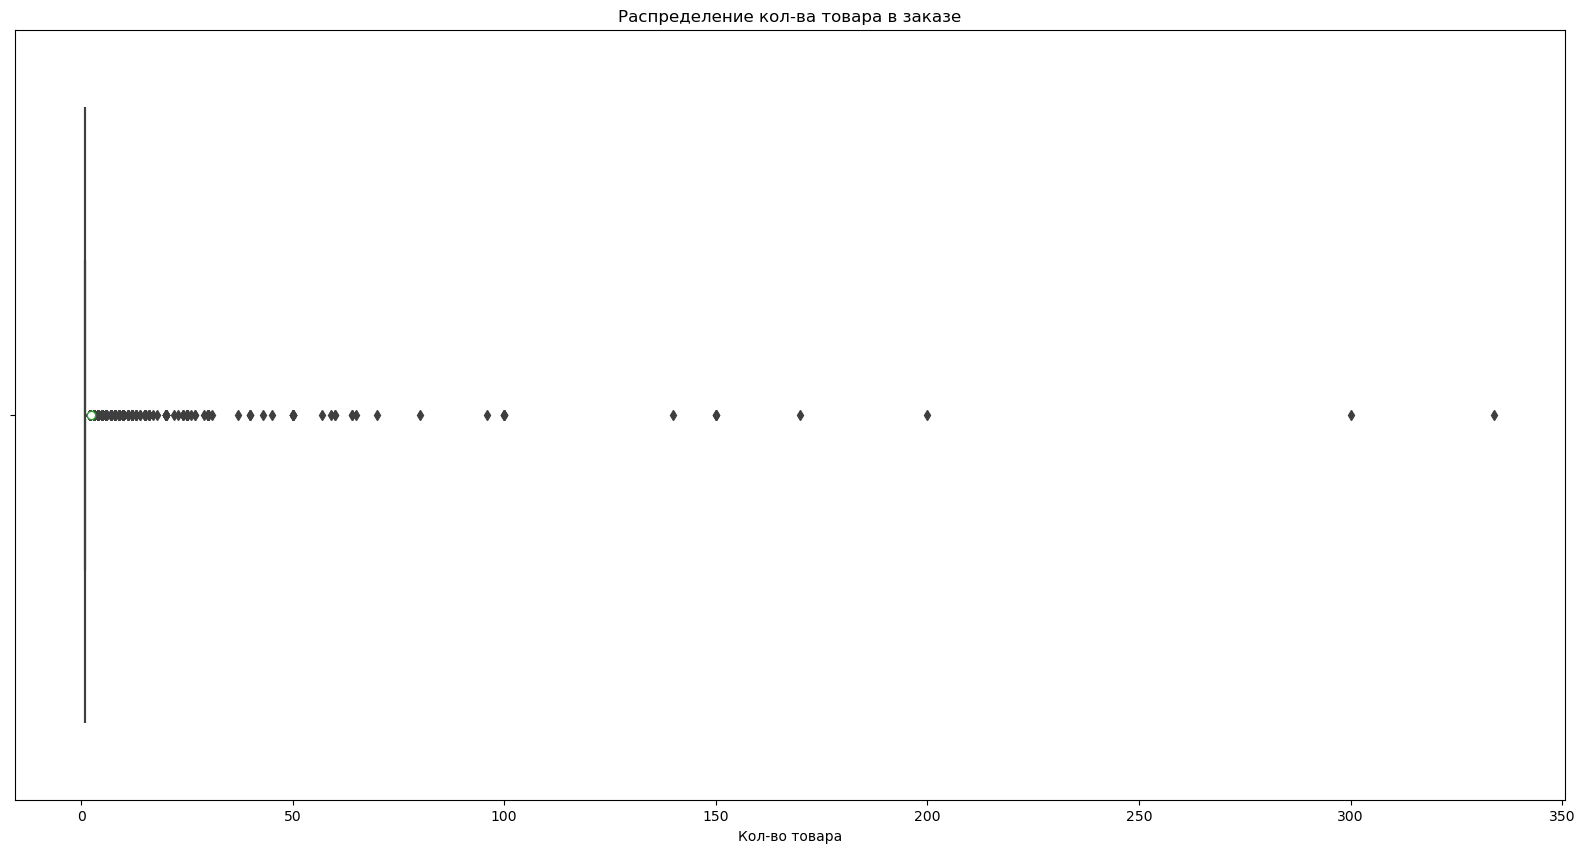

order_id     quantity
count    5553.000000  5553.000000
mean    55979.904916     2.404646
std     32442.518889     9.598982
min     12624.000000     1.000000
25%     14810.000000     1.000000
50%     69205.000000     1.000000
75%     71937.000000     1.000000
max    112789.000000   334.000000

In [30]:
quantity_products = data.pivot_table(index=('order_id','product'), values='quantity', aggfunc='first').reset_index()
plt.figure(figsize=(20,10))
sns.boxplot(data=quantity_products, x = 'quantity',
           showmeans=True, meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Распределение кол-ва товара в заказе')
plt.xlabel('Кол-во товара')
plt.show()
quantity_products.describe()

По описанию количественной переменной quantity можно понять, что ограничивать график здесь не имеет смысла. В основном заказы совершаются на 1 позицию в количестве 1 шт. Всё, что выше 1 уже считается аномальными значениями, однако есть заказ с товаром, заказанным в количестве 334 шт. Взглянем на него.

In [31]:
extra_quantity = data.loc[data['quantity'] == 334]
extra_quantity

date                           customer_id  order_id  \
5071 2019-06-11 07:00:00  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   

                                               product  quantity  price  \
5071  вешалки мягкие для деликатных вещей 3 шт шоколад       334  148.0   

        month  cost_position category_product  
5071  2019-06        49432.0      house_goods

Итак, у нас есть заказ на вешалки, заказанных в количестве 334, что является максимальным аномальным значением. Проверим, что еще есть в данном заказе помимо вешалок.

In [32]:
data.query('order_id in @extra_quantity.order_id')

date                           customer_id  order_id  \
5071 2019-06-11 07:00:00  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   

                                               product  quantity  price  \
5071  вешалки мягкие для деликатных вещей 3 шт шоколад       334  148.0   

        month  cost_position category_product  
5071  2019-06        49432.0      house_goods

Данный заказ был совершен только на вешалки, как и в случае с вантузами, скорее всего это большая закупка. Так же взглянем на топ-5 самых больших заказов по кол-ву товаров.

In [33]:
top_5_extra_quantity = quantity_products.sort_values('quantity', ascending=False).head()
top_5_extra_quantity

order_id                                            product  quantity
4039     71668   вешалки мягкие для деликатных вещей 3 шт шоколад       334
3943     71478                          муляж яблоко 9 см красное       300
2822     69289      ручка-скоба рс-100 белая *трибатрон*, 1108035       200
2355     68815                          муляж яблоко 9 см красное       170
2111     68611  пружина дверная 240 мм оцинкованная (д-19 мм) ...       150

Итого мы имеем 5 заказанных товаров количество которы выше 150 в заказе. Посмотрим являются ли данные заказы только на эти позиции.

In [34]:
data.query('order_id in @top_5_extra_quantity.order_id')

date                           customer_id  order_id  \
211  2018-10-11 14:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
212  2018-10-11 14:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
266  2018-10-16 08:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
267  2018-10-16 08:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
568  2018-11-01 08:00:00  aa42dc38-780f-4b50-9a65-83b6fa64e766     68815   
1158 2018-12-10 14:00:00  a984c5b7-ff7e-4647-b84e-ef0b85a2762d     69289   
3961 2019-05-20 21:00:00  5d189e88-d4d6-4eac-ab43-fa65a3c4d106     71478   
5071 2019-06-11 07:00:00  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   

                                                product  quantity  price  \
211                 крепеж для пружины дверной, 1107055       150   19.0   
212   пружина дверная 240 мм оцинкованная (д-19 мм) ...       150   38.0   
266                 крепеж для пружины дверной, 1107055       150   19.0   
267   пружина дверная 240 мм оцинкованная (д-19 мм) ...       150   38.0   
568                           муляж яблоко 9 см красное       170   51.0   
1158      ручка-скоба рс-100 белая *трибатрон*, 1108035       200   29.0   
3961                          муляж яблоко 9 см красное       300   51.0   
5071   вешалки мягкие для деликатных вещей 3 шт шоколад       334  148.0   

        month  cost_position category_product  
211   2018-10         2850.0            tools  
212   2018-10         5700.0            tools  
266   2018-10         2850.0            tools  
267   2018-10         5700.0            tools  
568   2018-11         8670.0      house_goods  
1158  2018-12         5800.0            tools  
3961  2019-05        15300.0      house_goods  
5071  2019-06        49432.0      house_goods

Построим график распределения для кол-ва товаров, значение которых выше или равно 150. Создадим переменную с товарами заказанных на не менее чем 150 штук.

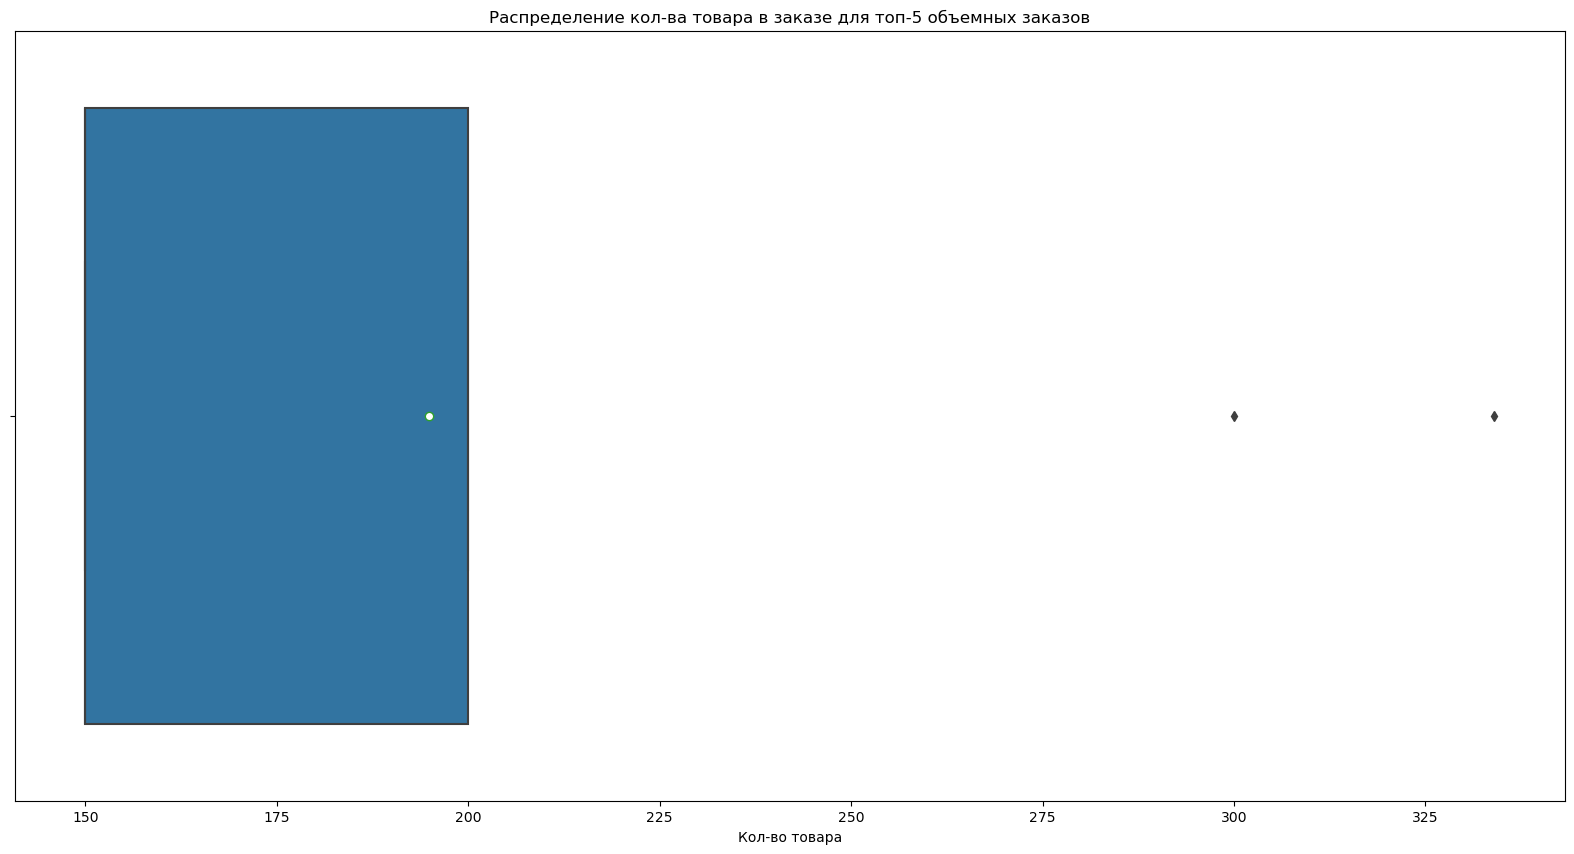

In [35]:
extra_quantity_pos = data.query('quantity >= 150')


plt.figure(figsize=(20,10))
sns.boxplot(data=extra_quantity_pos, x = 'quantity',
           showmeans=True, meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Распределение кол-ва товара в заказе для топ-5 объемных заказов')
plt.xlabel('Кол-во товара')
plt.show()

Итак среди заканных товаров свыше 150 штук только заказы на товары в количестве 300 и 334 считаются аномалными.

Взглянем как распределены заказы с товарами в количестве свыше 20 шт.

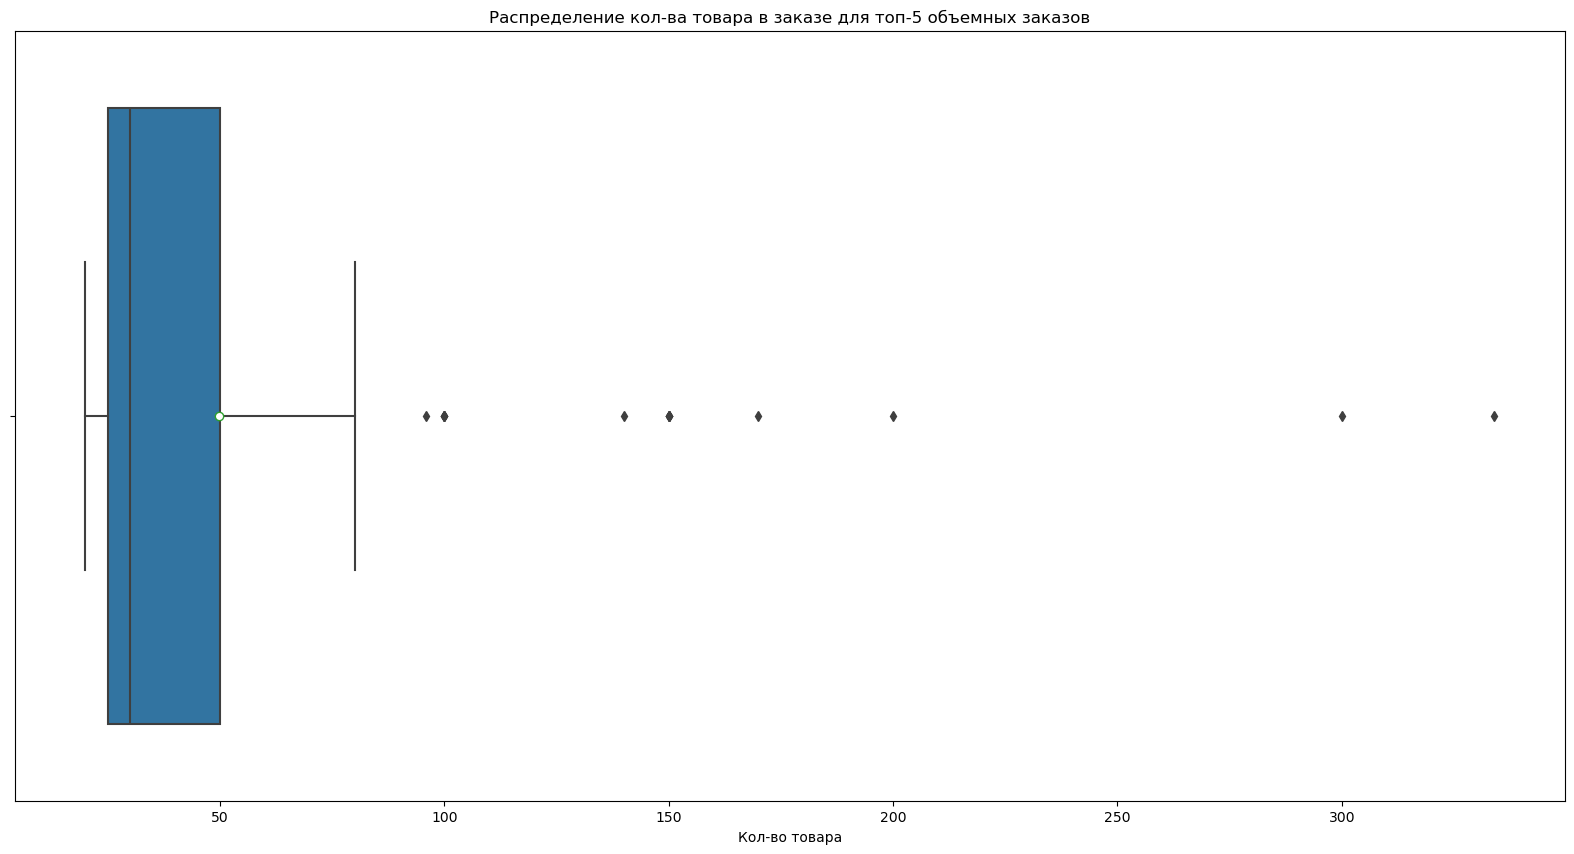

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data.query('quantity >= 20'), x = 'quantity',
           showmeans=True, meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Распределение кол-ва товара в заказе для топ-5 объемных заказов')
plt.xlabel('Кол-во товара')
plt.show()

Как среди свыше 20 заказанных товаров, так и свыше 150. Два заказа являются аномальными. Посмотрим какое количество товаров среди закупок свыше 20 штук является 99 перцентилем.

In [37]:
print('99-ый перцентиль среди оптовых покупок:', int(np.percentile(data.query('quantity >= 20')['quantity'], [99])))

99-ый перцентиль среди оптовых покупок: 290


C:\Users\тима\AppData\Local\Temp\ipykernel_22344\2901119885.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Будем считать, что товар, заказанный в количестве более чем 20 шт является оптовой закупкой, поэтому просто так удалять мы и не можем, даже если они считаются аномальными значениями. Даже среди аномальных заказов, два из них являются выбросами, и превышают 99-ый перцентиль. Взглянем на долю данных заказов в исходном датафрейме.

In [38]:
perc_99_quantity = int(np.percentile(data.query('quantity >= 20')['quantity'], [99]))
print('Доля аномальных оптовых закупок:',
      round(data.query('quantity >= @perc_99_quantity')['product'].count()/ data['product'].count(),4))

Доля аномальных оптовых закупок: 0.0003


C:\Users\тима\AppData\Local\Temp\ipykernel_22344\2447026521.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Так как доля таких оптовых закупок менее 1 % удалим их.

In [39]:
data = data.query('quantity < @perc_99_quantity')
print('Кол-во строк после удаления:', data['product'].count())

Кол-во строк после удаления: 7471


Удаление аномалии успешно!

### Количество пользователей на один заказ

Проверим все ли заказы были совершены одним покупателем.

In [40]:
users_per_orders = data.pivot_table(
    index='order_id', values='customer_id', aggfunc='nunique').reset_index()
users_per_orders = users_per_orders.query('customer_id > 1')
print('Количество заказов, совершенных более чем 1-им пользователем:', users_per_orders['order_id'].count())

Количество заказов, совершенных более чем 1-им пользователем: 29


Зная, что данные заказы некорректны. Посмотрим на их долю в общем кол-ве строк. 

In [41]:
print('Доля некорректных заказов:',
      round(
          data.query('order_id in @users_per_orders.order_id'
      )['product'].count() / data['product'].count(),2))
print('Кол-во строк в исх. данных:',
      data.query('order_id in @users_per_orders.order_id')['product'].count() )

Доля некорректных заказов: 0.01
Кол-во строк в исх. данных: 89


Удаляем задублированные заказы для разных пользователей.

In [42]:
print('Кол-во строк до удаления:', data['product'].count())
data = data.query('order_id not in @users_per_orders.order_id')
print('Кол-во строк после удаления:', data['product'].count())

Кол-во строк до удаления: 7471
Кол-во строк после удаления: 7382


Удаление прошло успешно!

### Промежуточный итог

В ходе предобработки данных:
    
    - Скорректировали тип данных столбца date, а так же добавили новый столбец только c годом и месяцем - month;
    - Проверили исходные данные на явные дубликаты и пропуски, которых не оказалось.
    - Неявные дубликаты удалять не стали, так как исхдные даннные содержать информацию о транзакциях, что наталкивает на мысль, что заказы могут быть омтенены или по ним был произведен возврат. Дубликаты проверялись по столбцам order_id + product;
    - Добавили новый столбец с категорией товаров, используя слвоарь с категориями и ключевыми словами продуктов. Доабвили новый столбец cost_position с полной стоимостью заказанного товара.
    - Выяснили, что больше всего транзакций, связанно с товарами категории plants, меньше всего - chemical_substances.
    - Больше всего в ассортименте интрнет-магазина преобладают товары категории house_goods, меньше всего - chemical_substances.
    - Определили, что медианное значение стоимости 1 еденицы товара в магазине - 188 д.е., однако в стоимости товаров слишком много аномалий и максимальное значение доходит до 14917 д.е. за сушилку уличную, минимальным же будет - 9 д.е. за алиссум (лобулярия);
    - Самые высокие цены у товаров категорий tools, house_goods, самые низкие у vegetables, chemical_substances.
    - Медианное значение стоимости 1-го заказа составляет 600 д.е., однако и здесь довольно много аномалий. В среднем стоимость 1-го заказа в районе от 200 до 1434. Самое высокое значение стоимости заказа составляет 675000 д.е.. Данный заказ удалили, как выброс, на исходные данные не повлияло.
    - Так же просмотрели заказы с топ-5 аномальным объемом к заказу. Предположили, что оптовые закупкы являются на кол-во свыше 20. Среди этого кол-ва два заказа являются свыше 99 перцентиля, удалили их как аномальные значения.
    - Обнаружили, что существуют заказы с одним номером для разных пользователей, проверили долю данных заказов (около 1%) удалили строки в исходном датафрейме.
    

## Исследовательский анализ

### Анализ общих показателей

#### Динамика выручки

Приступаем к исследовательскому анализу. В первую очередь, посмотрим на динамику показателя выручки по месяцам. 

In [43]:
revenue_per_month = data
revenue_per_month = (revenue_per_month.pivot_table(index='month',
                                                   values='cost_position',
                                                   aggfunc='sum')
                     .reset_index())
revenue_per_month.sort_values('month')

month  cost_position
0   2018-10  420006.000000
1   2018-11  371180.000000
2   2018-12  383069.000000
3   2019-01  262830.000000
4   2019-02  342641.000000
5   2019-03  299034.000000
6   2019-04  379783.000000
7   2019-05  286204.000000
8   2019-06  358513.000000
9   2019-07  276547.000000
10  2019-08  197490.000000
11  2019-09  201467.000000
12  2019-10  240057.000000
13  2019-11  128791.750000
14  2019-12  202885.333333
15  2020-01  174036.333333

Итого получилась таблица с выручкой по месяцам за 15 месяцев. Выручка рассчитывалась как сумма всех заказанных товаров. Построим график.

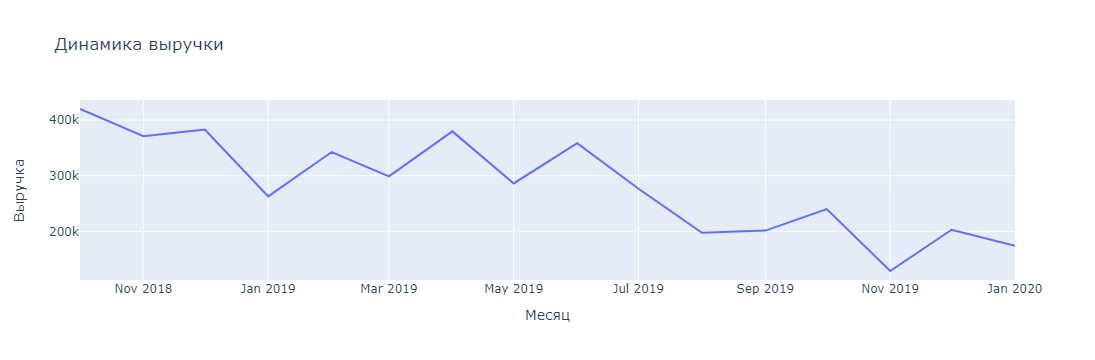

In [44]:
dynamics_revenue = px.line(revenue_per_month, x='month', y='cost_position',
                           title='Динамика выручки', )
dynamics_revenue.update_layout(xaxis_title='Месяц', yaxis_title='Выручка')

Первое, что бросается в глаза это то, что общая выручка идет на спад. Максимальные значения показателя выручки наблюдались в октябре 2018, апреле 2018 и в июне 2019 в разные периоды года. Видно, что выручка не стабильна, есть как резкие скачки, так и резкие просадки.

#### Средний чек

Далее переходим к анализу среднего чека. Так как ранее мы изучили распределение средних чеков и знаем, что в чеках есть аномальные значения, то предлагаю построить два графика. Первый для меданного значения чека по месяцам, второй же для среднего чека, рассчитанного как выурчка/кол-во заказов. Взглянем на разницу в данных графиках. Начнем с меданного значения чеков.

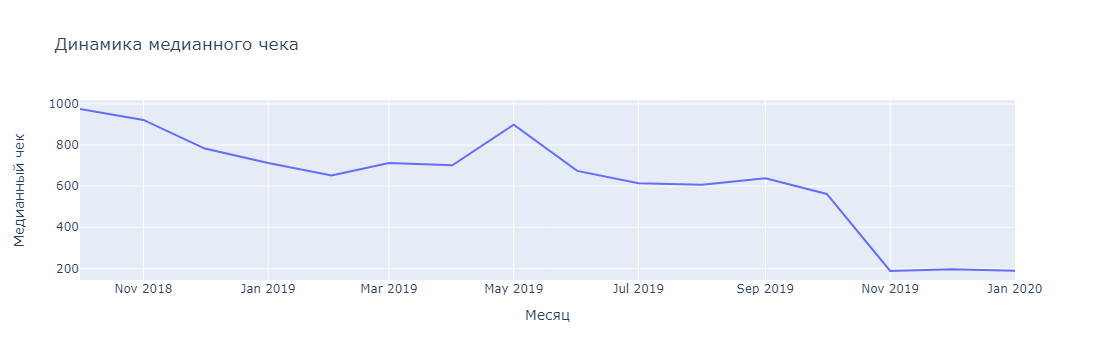

In [45]:
aov_per_month = data
aov_per_month = aov_per_month.groupby(['month','order_id'], as_index=False)['cost_position'].sum()
aov_per_month_median = aov_per_month.pivot_table(index='month', values='cost_position', aggfunc='median').reset_index()
aov_per_month_median = aov_per_month_median.rename(columns={'cost_position':'median'})
dynamics_aov_median = px.line(aov_per_month_median, x='month', y='median',
                           title='Динамика медианного чека', )
dynamics_aov_median.update_layout(xaxis_title='Месяц', yaxis_title='Медианный чек')

Как и в случае с общей выручкой, медианный чек идет на спад, что значит покупатели заказывают либо намного меньше, либо более дешёвые товары. Самым высоким значением было 975 д.е. в октябре 2018. Так же есть пик в 899 д.е. в мае 2019. Особое внимание стоит уделить резкому падению после октября 2019 с последующим медианным чеком в 187 д.е. в ноябре 2019. Взглянем на динамику среднего чека, рассчитанного как выручка/кол-во заказов.

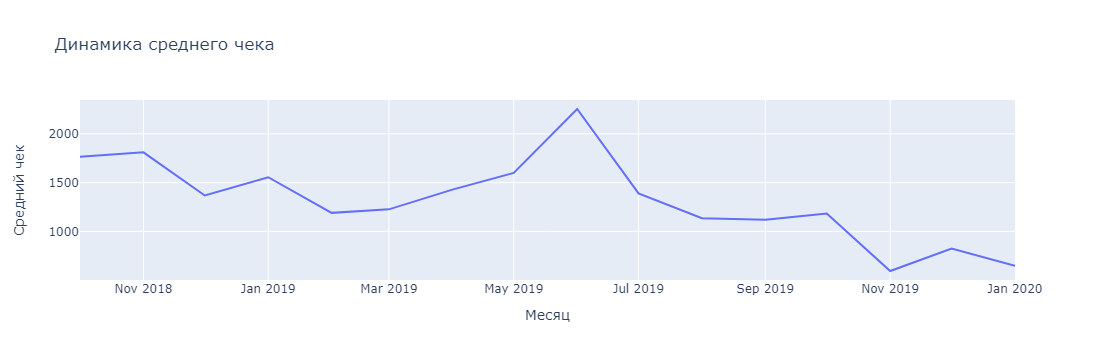

In [46]:
amount_orders = data.pivot_table(index='month', values = 'order_id', aggfunc='nunique').reset_index()
aov_per_month_avg = revenue_per_month.merge(amount_orders, how='left', on='month')
aov_per_month_avg['avg_order_price'] = aov_per_month_avg['cost_position'] / aov_per_month_avg['order_id']

dynamics_aov_avg = px.line(aov_per_month_avg, x='month', y='avg_order_price',
                           title='Динамика среднего чека', )
dynamics_aov_avg.update_layout(xaxis_title='Месяц', yaxis_title='Средний чек')

Как и в случае с меданным чеком, общая тенденция среднего чека постепенно падает. Однако есть пик в 2254 д.е. в июне 2019 года. По всему временному интервалу общее значение среднего чека намного выше чем медиданное, и на мой взгляд, правильней ориентироваться именно на средний чек, так как аномальные заказы точно так же приносят выручку, как и все остальные, поэтому просто так не брать их в расчет мы не можем.

#### Месячная средняя вырука в покупателя

Так как ранее мы вводили переменную с выручкой по месяцам, посчитаем количество уникальных пользователей по месяцам и соеденив две таблицы, поделим выручку на пользователей, получим ARPPU.

In [47]:
user_count = data.pivot_table(index='month', values='customer_id', aggfunc='nunique').reset_index()
arppu_per_month = revenue_per_month.merge(user_count, how='left', on='month')
arppu_per_month['arppu'] = arppu_per_month['cost_position'] / arppu_per_month['customer_id']
arppu_per_month

month  cost_position  customer_id        arppu
0   2018-10  420006.000000          179  2346.402235
1   2018-11  371180.000000          179  2073.631285
2   2018-12  383069.000000          230  1665.517391
3   2019-01  262830.000000          153  1717.843137
4   2019-02  342641.000000          246  1392.849593
5   2019-03  299034.000000          229  1305.825328
6   2019-04  379783.000000          237  1602.459916
7   2019-05  286204.000000          165  1734.569697
8   2019-06  358513.000000          150  2390.086667
9   2019-07  276547.000000          187  1478.860963
10  2019-08  197490.000000          166  1189.698795
11  2019-09  201467.000000          172  1171.319767
12  2019-10  240057.000000          174  1379.637931
13  2019-11  128791.750000          217   593.510369
14  2019-12  202885.333333          246   824.737127
15  2020-01  174036.333333          269   646.975217

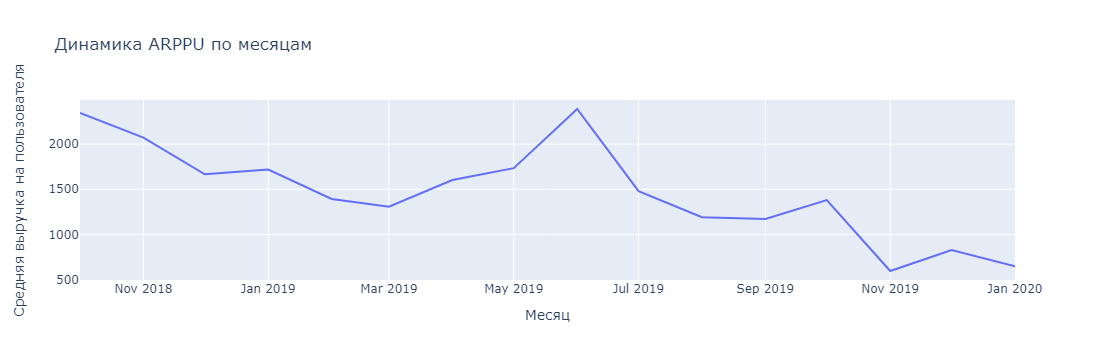

In [48]:
dynamics_arppu = px.line(arppu_per_month, x='month', y='arppu',
                           title='Динамика ARPPU по месяцам', )
dynamics_arppu.update_layout(xaxis_title='Месяц', yaxis_title='Средняя выручка на пользователя')

На графике месячного ARPPU видно, как тенденция схожа с графиком среднего чека. В целом, график идет на спад с пиковой точкой в июне 2019. Так как график схож со средним чеком, то предположим, что 1 пользователь совершает в среднем 1 заказ за месяц. Рассчитаем это. Разделим кол-во заказом по месяцам на количество уникальных пользователей.

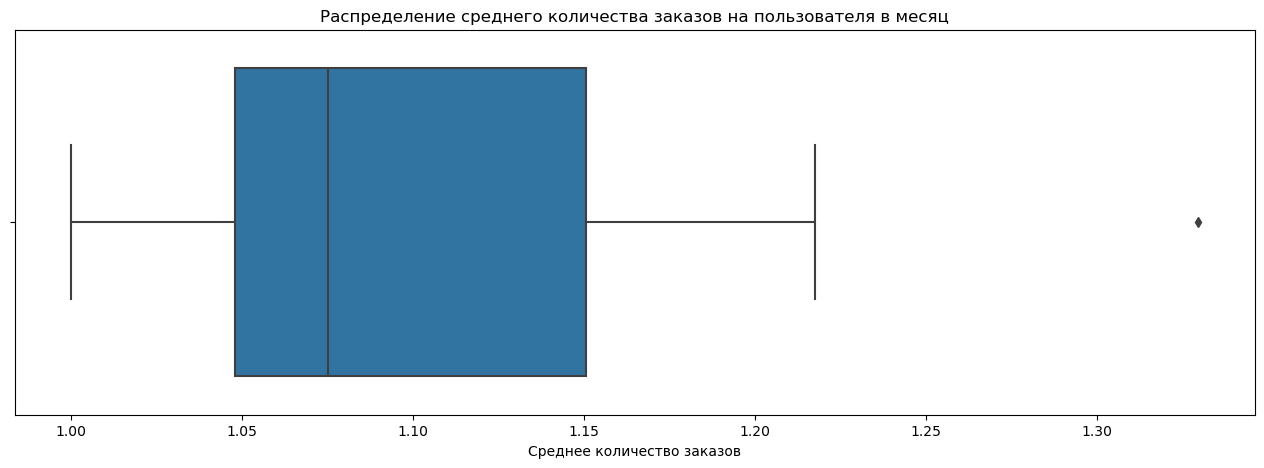

In [49]:
order_per_user = amount_orders.merge(user_count[['month', 'customer_id']], how='left', on = 'month')
order_per_user['amount_order'] = order_per_user['order_id'] / order_per_user['customer_id']
plt.figure(figsize=(16,5))
sns.boxplot(data=order_per_user, x='amount_order')
plt.xlabel('Среднее количество заказов')
plt.title('Распределение среднего количества заказов на пользователя в месяц')
plt.show()


Так и есть, в среднем пользователь совершает не более 1 заказа в месяц, даже аномальное значение не доходит до 2-ух заказов. Поэтому динамика среднего чека так схожа с месячным ARPPU. 

### Анализ категорий товаров.

#### Категоризация

Так как на шаге предобработки мы уже сделали категоризацию товаров, на данном этапе повторно выведем уникальные товары по категориям.

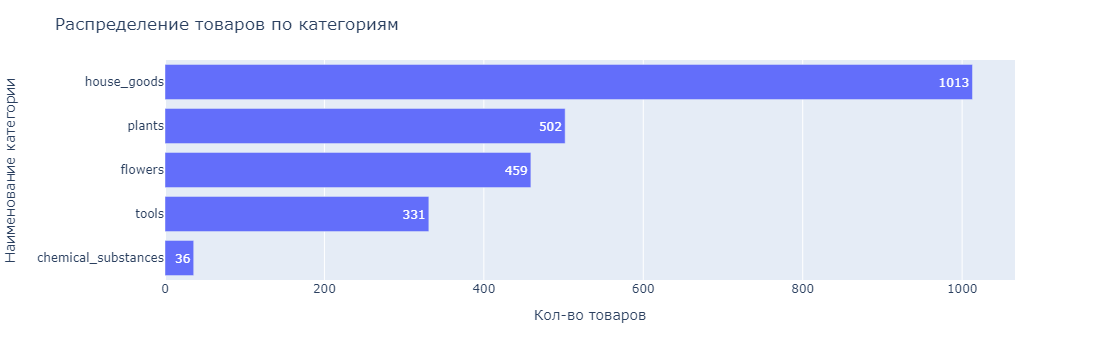

In [50]:
top_category_fig

Итого у нас получается 9 каегорий товаров:
    
    - house_goods: товары для дома, в том числе кухонные товары/принадленжости, товары для интерьера;
    - flowers: цветы, а также саженцы, семена и тд.;
    - tools: инструменты;
    - plants: растения, овощи, ягоды, а так же саженцы, семена и т.д.;
    - chemical_substances: хим. жидкости и субстанции.
    
Больше всего ассортимента в таких категориях как: house_goods (1013), plants(502), flowers (459), tools(331). Меньше всего: chemical_substances(36).
    

Так как на этапе предобработки, мы отчистили данные от некоррекных заказов и убрали аномалии, то построим график повторно.

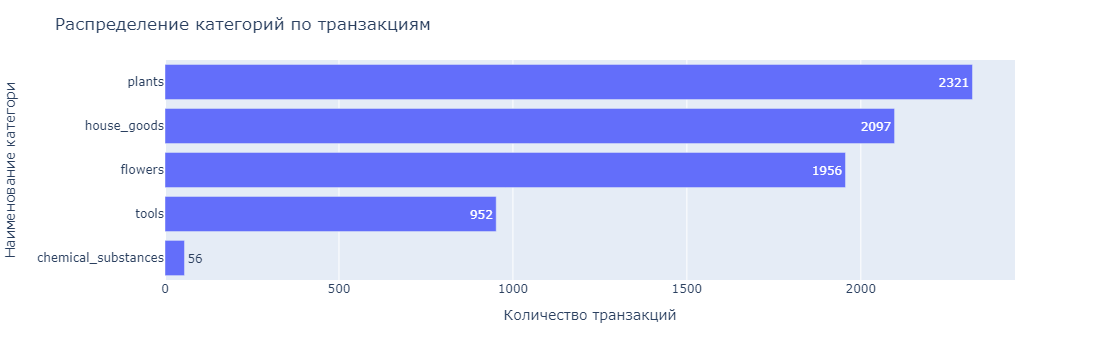

In [51]:
data = category_product(data,'product', categoriez)
category_transactions = data.pivot_table(
    index = 'category_product', values = 'product', aggfunc ='count'
    ).sort_values('product').reset_index()
category_transactions_fig = px.bar(category_transactions,
                                  x='product',
                                  y='category_product',
                                  text='product')
category_transactions_fig.update_layout(title='Распределение категорий по транзакциям',
                                       xaxis_title='Количество транзакций',
                                       yaxis_title='Наименование категори')

По транзакциям же ситуация немного другая. Более всего было совершено заказов на такие категории как plats(2321), house_goods(2097),flowers(1956). Меньше всего было заказов на tools(952) и chemical_substances(56).

#### Средняя стоимость по категориям.

Приступая к анализу товаров, первым делом посмотрим на среднюю стоимость товаров по категориям. Ранее выводили распределение цен по категориям. Повторно построим график.

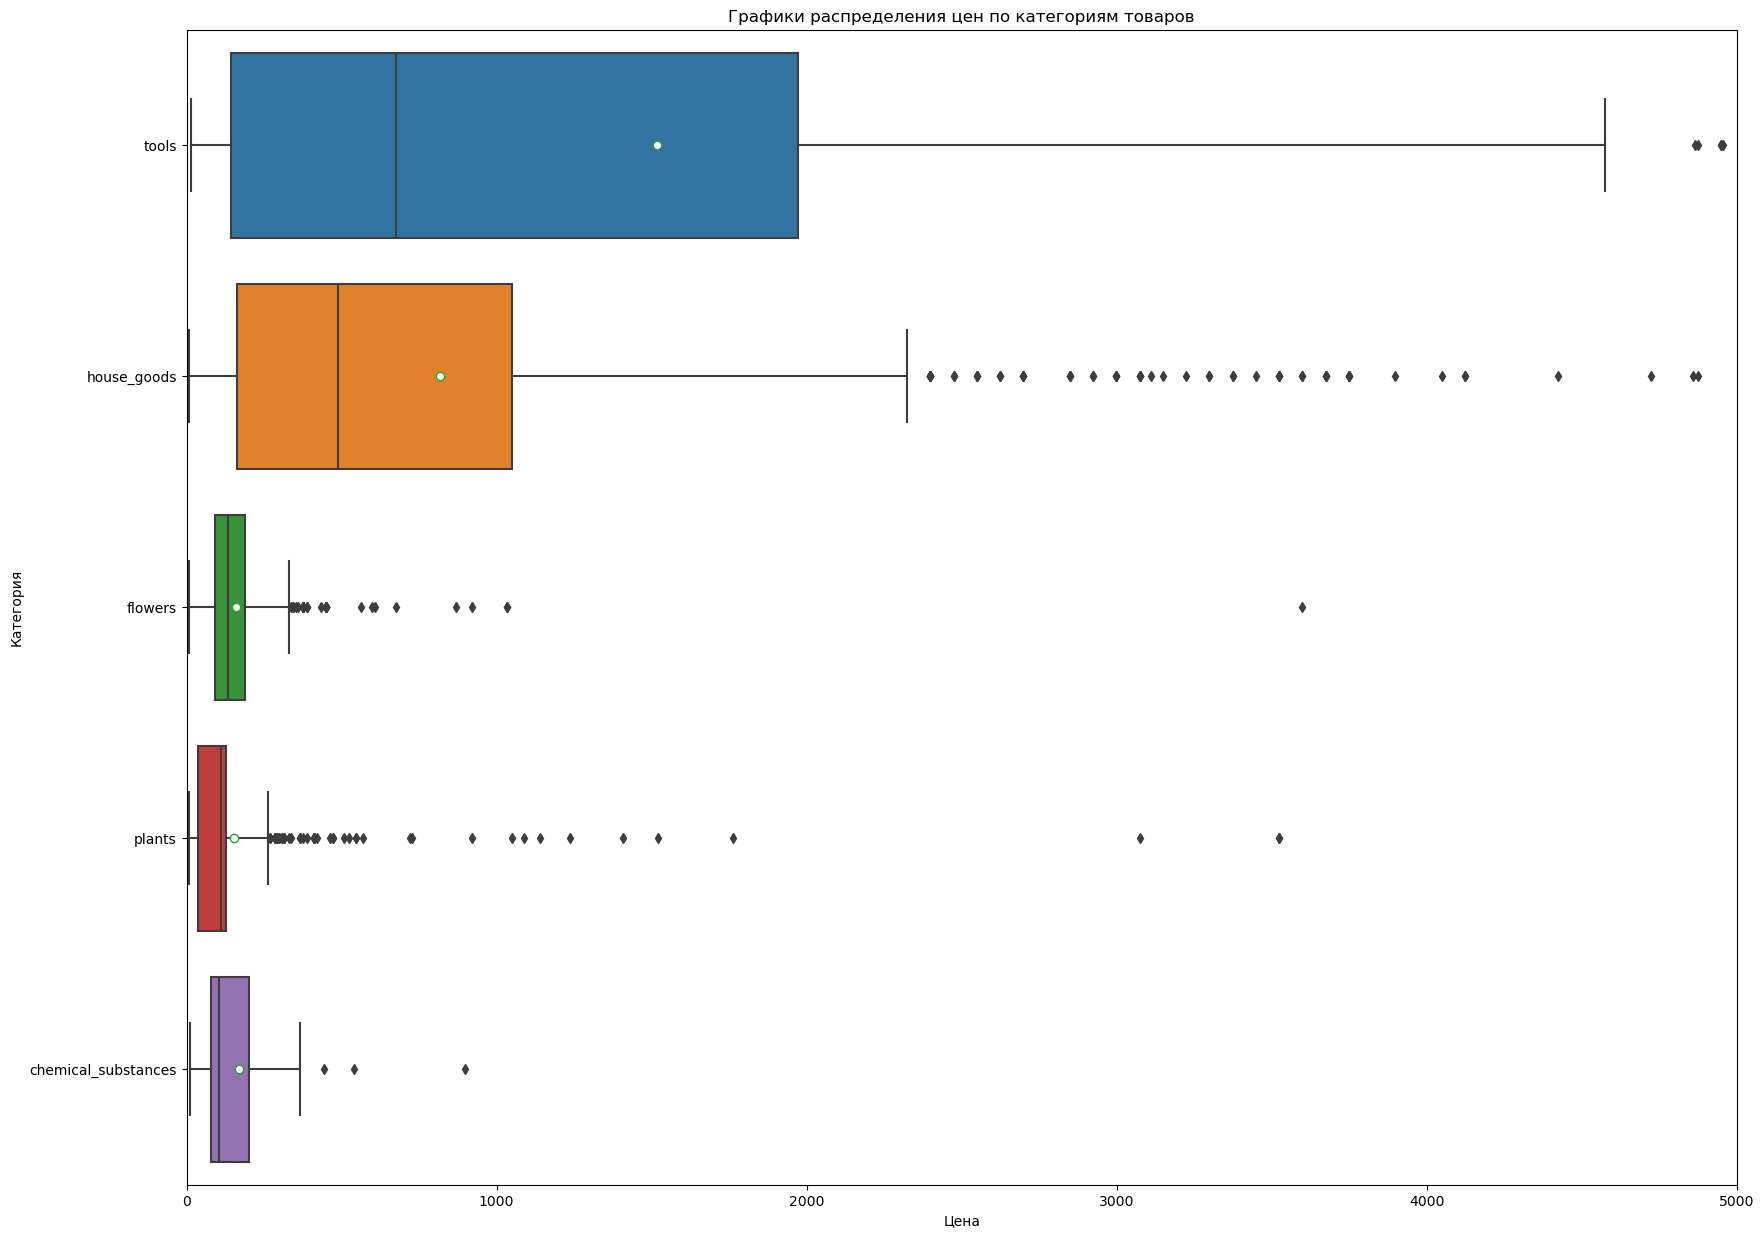

In [52]:
plt.figure(figsize=(20,15))
sns.boxplot(data=price_list_category, x='price', y='category_product',
            order=median_middle_price.index, showmeans=True,
            meanprops={'marker':'o','markerfacecolor':'white'})
plt.xlim(0, 5000)
plt.xlabel('Цена')
plt.ylabel('Категория')
plt.title('Графики распределения цен по категориям товаров')
plt.show()

Самые высокие показатели средней стоимости товаров у категории tools, так же как и вариативность, далее идут house_goods, товары как правильно представляют собой электроннику, мебель, товары для интерьеры или обработанные строительные материалы, поэтому и стоимость за них выше. Самые низкие цены у plants, chemical_substances и plants. В основном стоимость можно поделить на две категории: товары, связанные с семенами, растениями и др., они как правило ниже, и товары для дома/инструменты здесь в основном специальные инструменты, посуда, приборы на них цена выше.

#### Сезонность категорий

Исследуем сезонность категорий. Рассчитаем для каждой категории кол-во заказанных позиций по месяцам. Количество заказанного ассортимента будем считать как сумму количества заказанных товаров.

In [53]:
season_category = data.pivot_table(index=('month','category_product'), values='quantity', aggfunc='sum').reset_index()
season_category.head(10)

month     category_product  quantity
0  2018-10  chemical_substances         7
1  2018-10              flowers       169
2  2018-10          house_goods       704
3  2018-10               plants        72
4  2018-10                tools      1104
5  2018-11  chemical_substances        12
6  2018-11              flowers       131
7  2018-11          house_goods       952
8  2018-11               plants        36
9  2018-11                tools       222

Построим график динамики заказанных товаров по категориям.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



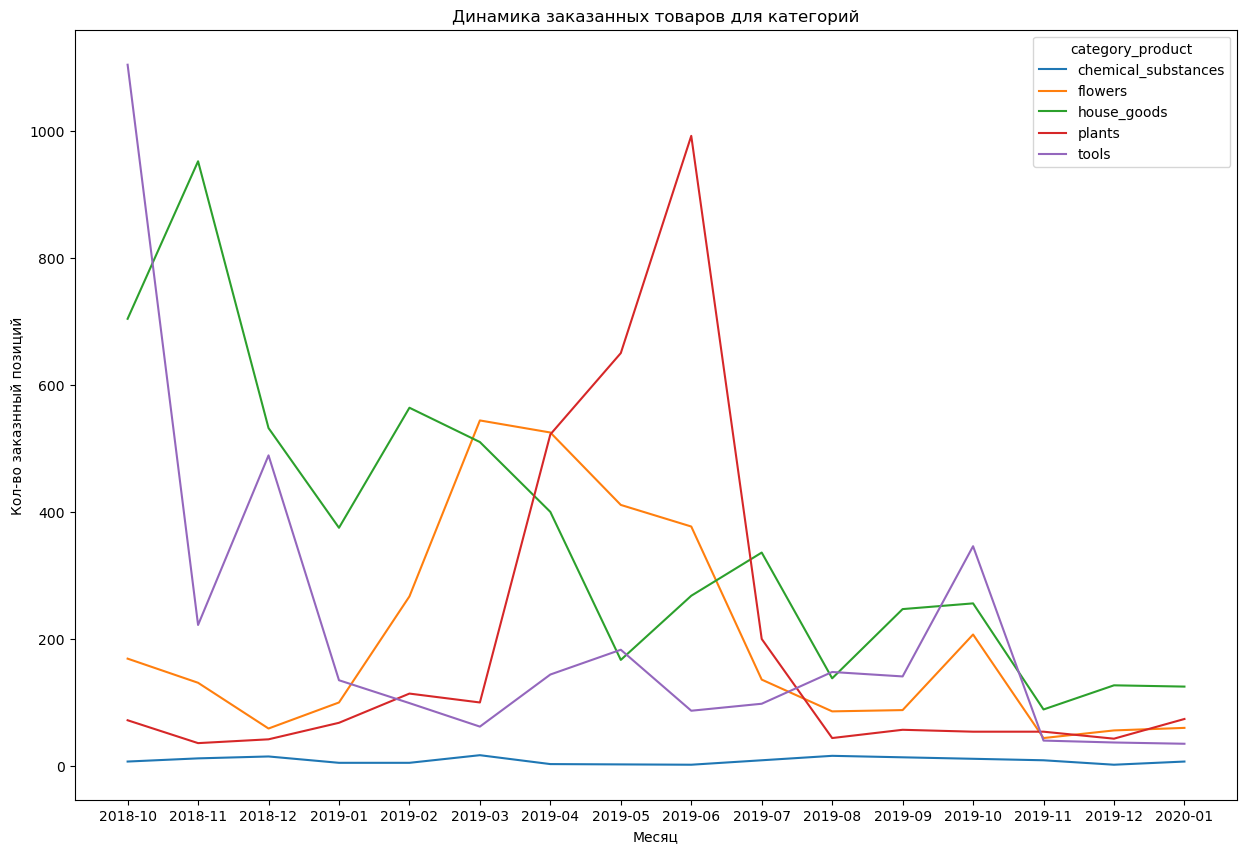

In [54]:
plt.figure(figsize=(15,10))
sns.lineplot(data=season_category,x='month', y='quantity', hue='category_product')
plt.title('Динамика заказанных товаров для категорий')
plt.xlabel('Месяц')
plt.ylabel('Кол-во заказнный позиций')
plt.show()

Комментарии по графику:
    
    -  Категория tools. Наибольшие продажи были с началом периода исходных данных. Так же скачки продаж наблюдались в декабре 2018 и мае и октябре 2019 года. По всем остальным периодам график примерно на одном уровне.
    
    - Категория plants. На протяжении всего периода имеет средние показатели, однако резкий рост с марта по июнь с дальнейшим падением. Скорее всего это связано с наступлением дачных сезонов и тем, что покупатели готовятся к посеву. Собрав информацию в интрнете узнал, что существуют разные культуры, однако все они сажаются весной/начало лета, различаются лишь ранним, средним и поздневесенним посевом.
    
    - Категория house_goods. Данная категория имеет четыре ярко выраженных пика в ноябре 2018, феврале 2019 и июле и октябре 2019. Скорее всего это можно связать со сменой сезонов и обновлением повседневно используемых товаров, как мы помним, в категории есть белье, посуда, товары для интерьера.
    
    - Рост категории flowers с начала 2019 года и до середины весны, а так же скачок в октябре. Просмотрев информацию в разных источниках, выяснил, что это можно связать с тем, что начало года/весна могут считаться одним из самых лучших времен для посадки цветов и ближе к теплому времени года их пересаживают уже в землю. Так же есть небольшой рост с сентября по октябрь 2019 года, скорее всего это покупка букетов к началу учебного года.
    
    - Категория chemical_substances имеет стабильно низкие продажи;

#### Анализ прибыли категорий

Взглянем какие категории принесли самую большую выручку за весь исследуемыей период, а так же на динамику выручки по месяцам.

In [55]:
revenue_categories_per_month = data
revenue_categories_per_month = revenue_categories_per_month.pivot_table(
    index=('month','category_product'), values='cost_position', aggfunc='sum'
    ).reset_index()
revenue_categories_per_month['cost_position'] =round(revenue_categories_per_month['cost_position'])
revenue_categories_per_month.head()

month     category_product  cost_position
0  2018-10  chemical_substances         1089.0
1  2018-10              flowers        21657.0
2  2018-10          house_goods       245826.0
3  2018-10               plants        17209.0
4  2018-10                tools       134225.0

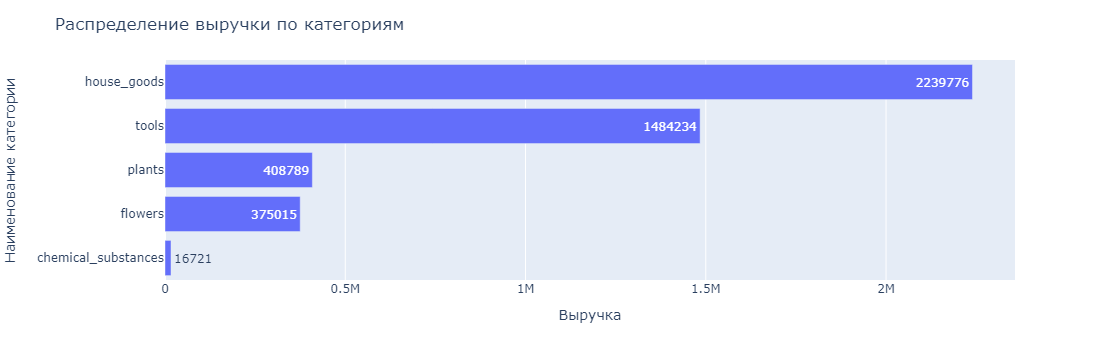

In [56]:
revenue_categories = revenue_categories_per_month.groupby(
    'category_product', as_index=False
    )['cost_position'].sum().sort_values('cost_position')

revenue_categories_fig = px.bar(revenue_categories,
                          x = 'cost_position',
                          y = 'category_product',
                         text='cost_position')
revenue_categories_fig.update_layout(title='Распределение выручки по категориям',
                              xaxis_title='Выручка',
                              yaxis_title='Наименование категории')

Больше всего выручки за рассматриваемый период принесла категория house_goods - 2 239 776 д.е. Далее идет категория tools 1 484 234 д.е. Так как в данные категории входят обработанные товары, гаджеты, инструменты и др., то и цена на них сильно выше чем на семена растений. Plants и flowers имет выручку в 408 789 и 375 015 д.е. соответсвенно. Меньше всего было выручки принесла категория chemical_substances 16 721.

Взглянем на динамику выручки по месяцам.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



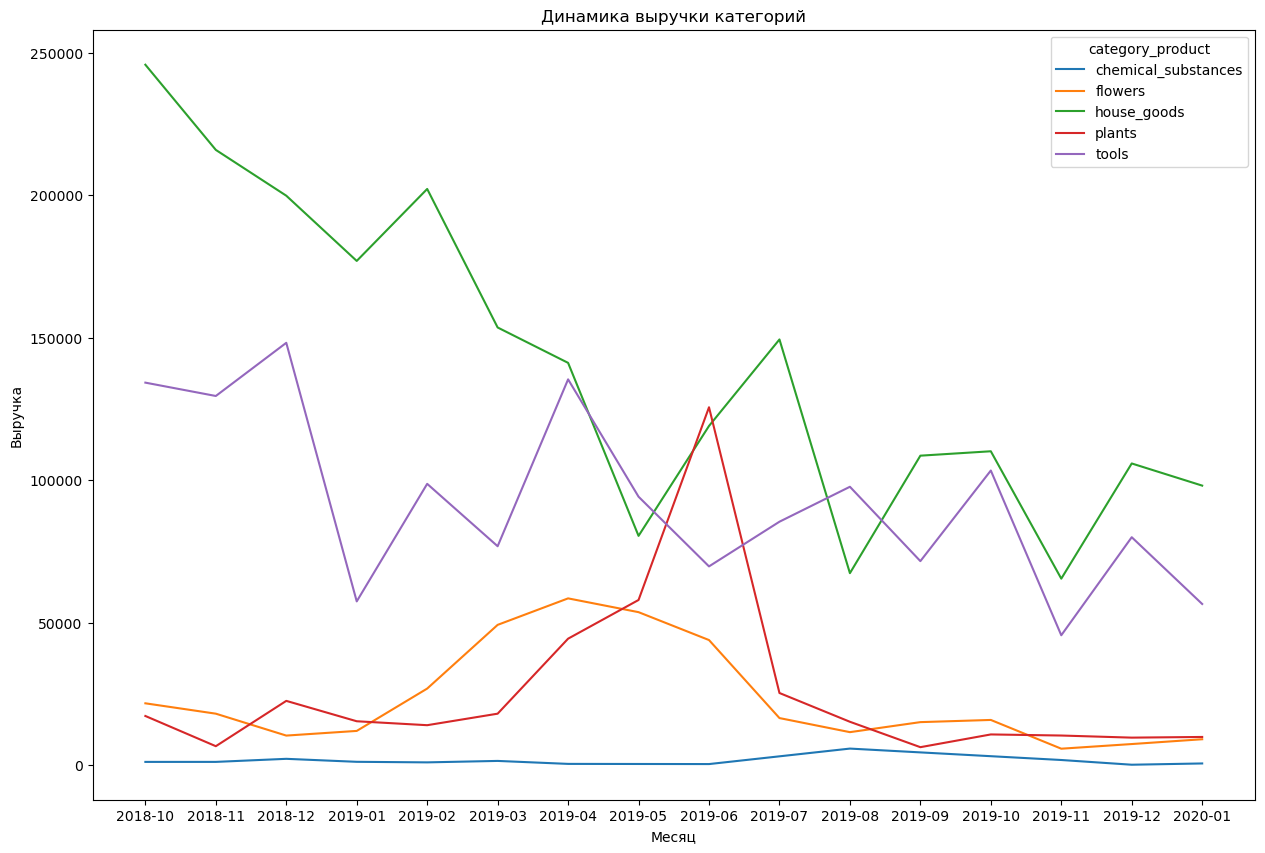

In [57]:
plt.figure(figsize=(15,10))
sns.lineplot(data=revenue_categories_per_month, x='month', y='cost_position', hue='category_product')
plt.title('Динамика выручки категорий')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

В целом динамика выручки категорий схожа с динамикой кол-ва заказанных товаров по категориям, оно и логично. Отдельно стоит отметить, что если для таких категорий как plants и flowers наблюдается резкий рост и падение с начала года до конца лета, а на всем остальном периоде стабильно низкая выручка, то для категорий house_goods и tools общий тренд нисходящий, т.е. периодически имеет резкие скачки вверх, выручка по категориям хоть и выше других категорий, однако постепенно падает.

#### Средний чек для категорий

Так же, на мой взгляд, интересно посмотреть на распределение среднего чека по категориям. Построим график.

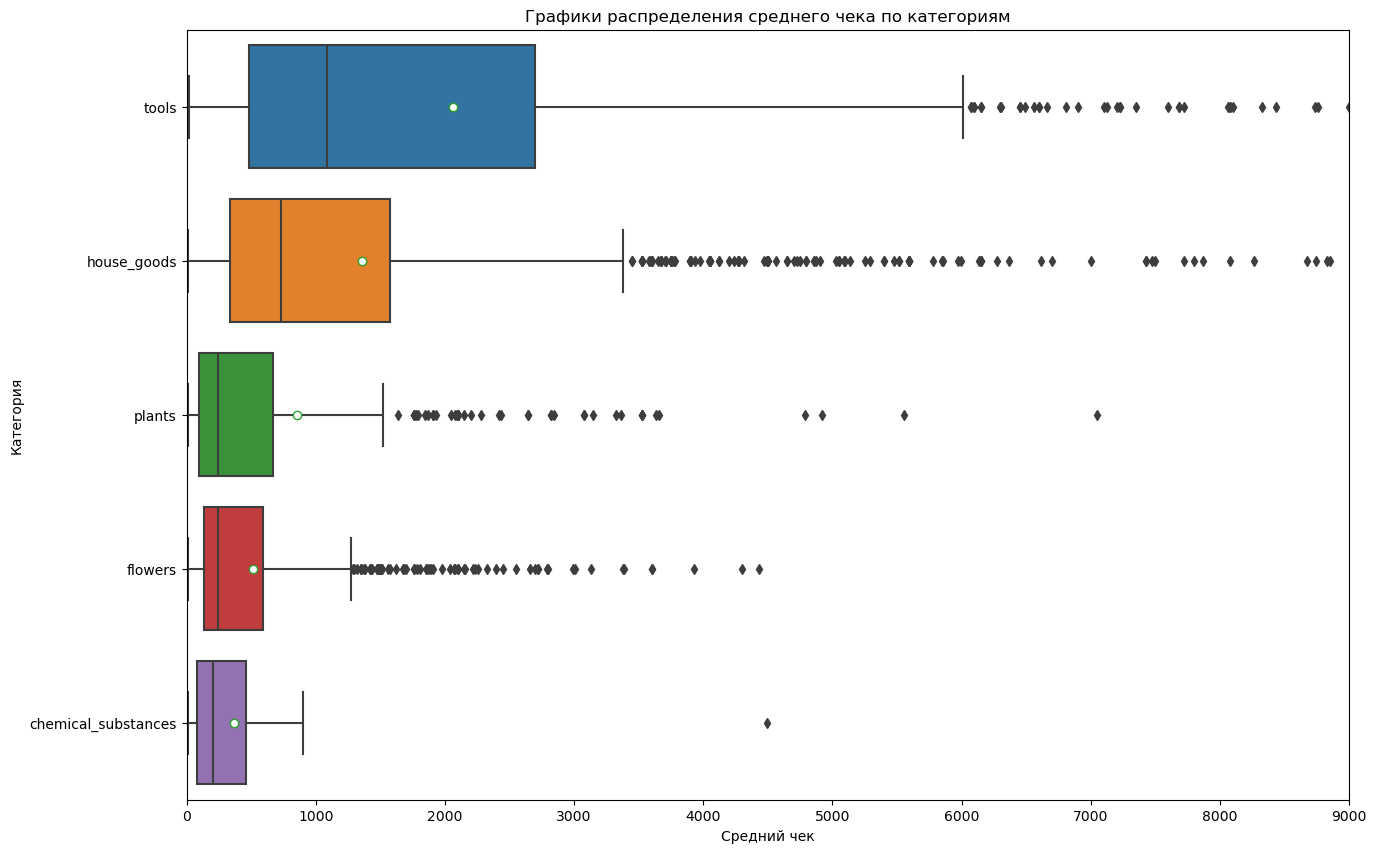

count      3619.000000
mean       1250.216750
std        3120.672737
min           9.000000
25%         194.000000
50%         582.000000
75%        1349.000000
max      114750.000000
Name: cost_position, dtype: float64

In [58]:
aov_per_categry = data
aov_per_categry = aov_per_categry.pivot_table(
    index=('category_product','order_id'), values='cost_position', aggfunc='sum').reset_index()


median_aov_category = (aov_per_categry.loc[:,['category_product','cost_position']]
                       .groupby('category_product').median()
                       .sort_values('cost_position',ascending=False))

plt.figure(figsize=(15,10))
sns.boxplot(data=aov_per_categry, x='cost_position', y='category_product', order=median_aov_category.index,
            showmeans=True, meanprops={'marker':'o','markerfacecolor':'white'})
plt.xlim(0,9000)
plt.xlabel('Средний чек')
plt.ylabel('Категория')
plt.title('Графики распределения среднего чека по категориям')
plt.show()
aov_per_categry['cost_position'].describe()

Увы, но интересных явлений не случилось. Средний чек категорий tools, house_goods выше других. По категориям flowers, plants как вариативность так и сам показатель медианного чека одинаков, но в категории plants были сформированы аномальные чеки дороже других аномальных чеко в категориях растительности, что сильно повлияло на ср. чек. 

### Промежуточный итог

Проанализировав общие показатели выручки, её динамики как по магазину в целом, так и по категориям, можно прийти к следующему:

    - Общая тенденция выручки имеет нисходящий тренд за рассматриваемый период;
    - Так же как и выручка, средний чек на пользователя по месяцам стремится вниз, однако есть резкий скачок в период с мая 2019 по июнь 2019 год.
    - Показатель ARPPU схож с динамикой среднего чека, связанно это со средним количество чеков на покупателя - не выше 1.3 чека на пользователя.
    - Что касается категорий, то больше всего ассортимента по товарам house_goods, а меньше всего по chemical_substances. Транзакций же больше по товарам plants. 
    - Наиболее высокие цены на товары у категорий house_goods и tools. Самые низкие цены в основном на товары растительного происхождения: семена, саженцы, кассеты с семенами и др., а также хим. жидкости.
    - Динамика кол-ва заказнных товаров различна:
    
        1) Для растений характерен рост продаж весной/начало лето;
        2) Для товаров для дома и инструментов общая тенденция нисходящая, но волатильна: резкие скачки и просадки;
        3) Для категории chemical_substances стабильно низкое кол-во проданных товаров
        
    - С выручкой ситуация схожа -  для растений и цветов сезонна, а вот для house_goods и tools переодически графики растут, но общий тренд нисходящий. Товары house_goods и tools приносят стабильно выше выручки, так же как и средний чек по этим категориям выше, но это связано с ценами на товары данных категорий.

## Исследовательский анализ сегментов покупателей

### Сегментирование покупателей

Главной задачей данного исследования является сегментирование покупателей и улучшение маректинговый кампаний для них. Начнем с сегментирования покупателей, делать это мы будем с использованием FM - анализа. Вспомним переменные, задействованные в данном инструменте:

    - F - частота покупок;
    - M - Выручка, которую приносят покупатели.
    
Таким образом, сегментирование наших покупателей будем иметь следующий вид:

    1 группа. Часто совершающие покупки / выручка выше среднего;

    2 группа. Часто совершающие покупки / выручка ниже среднего;

    3 группа. Не постоянные покупатели / выручка выше среднего;

    4 группа. Не постоянные покупатели / выручка ниже среднего;

    5 группа. Покупатели, совершившие одну покупку.
    
Первым делом, создаем датафрейм с кол-вом покупок у пользователей.

#### Сегментация по кол-ву покупок

In [59]:
count_orders_per_cust = data.pivot_table(index='customer_id', values='order_id', aggfunc='nunique').reset_index()
count_orders_per_cust = count_orders_per_cust.rename(columns={'order_id':'count_orders'})
display(count_orders_per_cust.sort_values('count_orders', ascending=False).head(),
count_orders_per_cust.sort_values('count_orders', ascending=False).tail())

customer_id  count_orders
1882  c971fb21-d54c-4134-938f-16b62ee86d3b           126
728   4d93d3f6-8b24-403b-a74b-f5173e40d7db            35
1077  73d1cd35-5e5f-4629-8cf2-3fda829d4e58            17
1716  b7b865ab-0735-407f-8d0c-31f74d2806cc             7
17    0184f535-b60a-4914-a982-231e3f615206             5

customer_id  count_orders
977   6a2bdd04-7d99-4f78-8bce-e7b37bb7abbb             1
974   69cf691b-a6c2-4543-aa8a-8cf42fe4a76e             1
973   69c524f1-dd2a-4c4e-a5b0-def54dc96f9e             1
972   69b17a52-a59b-4656-8d47-375e81e7d5f1             1
2409  ffe82299-3f5b-4214-87fe-3d36ecccfac3             1

Далее формируем переменную с номерами id покупателей, кто совершил заказ один раз.

In [60]:
single_order_cust = count_orders_per_cust.loc[count_orders_per_cust['count_orders'] == 1]
display(single_order_cust.sort_values('count_orders').head(),
    single_order_cust.sort_values('count_orders').tail())
print('Кол-во пользователей с 1 заказом:', single_order_cust['customer_id'].count())

customer_id  count_orders
0     000d6849-084e-4d9f-ac03-37174eaf60c4             1
1599  adbb375f-0f2e-47ad-84ed-9ae19a7edc57             1
1595  ad9c1a91-504d-416a-924c-430d5db3805a             1
1594  ad935627-11d4-4a1c-9d69-cf0e33047aa8             1
1593  ad7bff9b-c9fd-4aa1-8fc7-7c66fe34fe65             1

customer_id  count_orders
795   560083b4-f5a2-4a86-99c3-59e736915f42             1
793   55f5138e-78d9-4a55-9237-47a87d966444             1
789   5580760e-3857-4710-b4a5-70c29aa54342             1
1204  81a7e269-cab6-4866-b99b-1f2bbe78bc1a             1
2409  ffe82299-3f5b-4214-87fe-3d36ecccfac3             1

Кол-во пользователей с 1 заказом: 1537


Отлично в датафрейме single_order_cust содержаться customer_id с номерами пользователей, которые совершали заказ один раз.

Далее нам необходимо построить распределение кол-ва покупок на пользователя, чтобы обозначить границу часто совершаемых покупок.

In [61]:
multi_orders_cust = count_orders_per_cust.query('customer_id not in @single_order_cust.customer_id')
display(multi_orders_cust.sort_values('count_orders').head(),
       multi_orders_cust.sort_values('count_orders').tail())

customer_id  count_orders
6     005ba170-45e8-42de-93f7-192481ae2659             2
1598  adb72676-d53e-4b1d-9db4-7aa4df23a69b             2
1600  add6d8bd-36ca-4c46-8a0b-7f13bbd05555             2
1602  ae036d1b-b1d5-41e4-8c85-d2bd1b0b4e18             2
1604  ae11fbe5-0579-4a6a-9c35-1e4cc8190451             2

customer_id  count_orders
17    0184f535-b60a-4914-a982-231e3f615206             5
1716  b7b865ab-0735-407f-8d0c-31f74d2806cc             7
1077  73d1cd35-5e5f-4629-8cf2-3fda829d4e58            17
728   4d93d3f6-8b24-403b-a74b-f5173e40d7db            35
1882  c971fb21-d54c-4134-938f-16b62ee86d3b           126

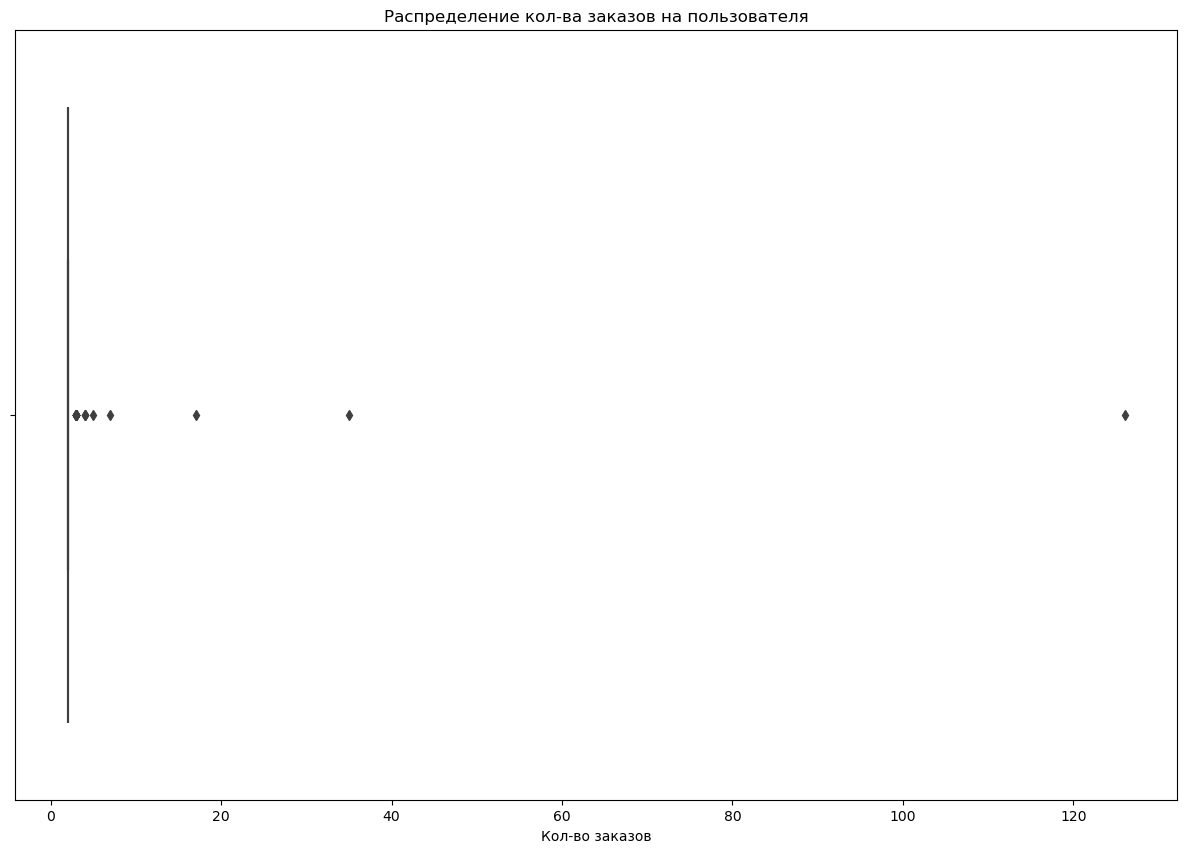

count    873.000000
mean       2.235968
std        4.377197
min        2.000000
25%        2.000000
50%        2.000000
75%        2.000000
max      126.000000
Name: count_orders, dtype: float64

In [62]:
plt.figure(figsize=(15,10))
sns.boxplot(data=multi_orders_cust, x='count_orders')
plt.xlabel('Кол-во заказов')
plt.title('Распределение кол-ва заказов на пользователя')
plt.show()
multi_orders_cust['count_orders'].describe()

Количество покупок более 2 раз на покупателя, считается аномальным значением. Взглянем сколько таких пользователей.

In [63]:
print('Кол-во пользователей с 2 заказами:',
      multi_orders_cust.loc[multi_orders_cust['count_orders'] == 2, 'customer_id'].count())
print('Кол-во пользователей с заказами более 2-ух:',
     multi_orders_cust.loc[multi_orders_cust['count_orders'] > 2, 'customer_id'].count())

Кол-во пользователей с 2 заказами: 845
Кол-во пользователей с заказами более 2-ух: 28


Таким образом, мы имеем следующую картину:
    
    - 1537 покупателя с 1 заказом;
    - 845 покупателей с 2 заказами;
    - И всего лишь 28 покупателей с более чем 2-умя заказами.
    
На мой взгляд, сегментирование на 5 групп, описанных выше в данной ситуации будет некорректно. Группы будут силшком сильно разниться и дальнейший анализ будет не точный.

**Предлагаю внести поправки в показатель F-частота совершения покупок и скорректировать группы:**

1 группа. 2 и более покупки / выручка выше среднего;

2 группа. 2 и более покупки / выручка ниже среднего;

3 группа. 1 покупка / выручка выше среднего;

4 группа. 1 покупка / выручка ниже среднего;

У нас есть датафрейм с номерами пользователей с 1 покупок. Создадим два датафрейма с двумя разными группами:

    - С транзакциями покупателей, совершивших 1 покупку;
    - С транзакциями покупателей, совершивших 2 и более покупок.

In [64]:
first_group_orders = data.query('customer_id in @single_order_cust.customer_id')
print('Кол-во в первой группе:', first_group_orders['customer_id'].nunique())

Кол-во в первой группе: 1537


In [65]:
second_group_orders = data.query('customer_id not in @single_order_cust.customer_id')
print('Кол-во в первой группе:', second_group_orders['customer_id'].nunique())

Кол-во в первой группе: 873


#### Сегментация по выручке

Далее переходим к сегментированию покупателей по выручке, которую они принесли. Первым делом построим график распределения выручки на пользователя

In [66]:
revenue_per_users = data
revenue_per_users = revenue_per_users.pivot_table(index='customer_id', values='cost_position', aggfunc='sum').reset_index()
revenue_per_users = revenue_per_users.rename(columns={'cost_position':'revenue'})
revenue_per_users.head()

customer_id  revenue
0  000d6849-084e-4d9f-ac03-37174eaf60c4    555.0
1  001cee7f-0b29-4716-b202-0042213ab038    442.0
2  00299f34-5385-4d13-9aea-c80b81658e1b    914.0
3  002d4d3a-4a59-406b-86ec-c3314357e498   1649.0
4  003bbd39-0000-41ff-b7f9-2ddaec152037   2324.0

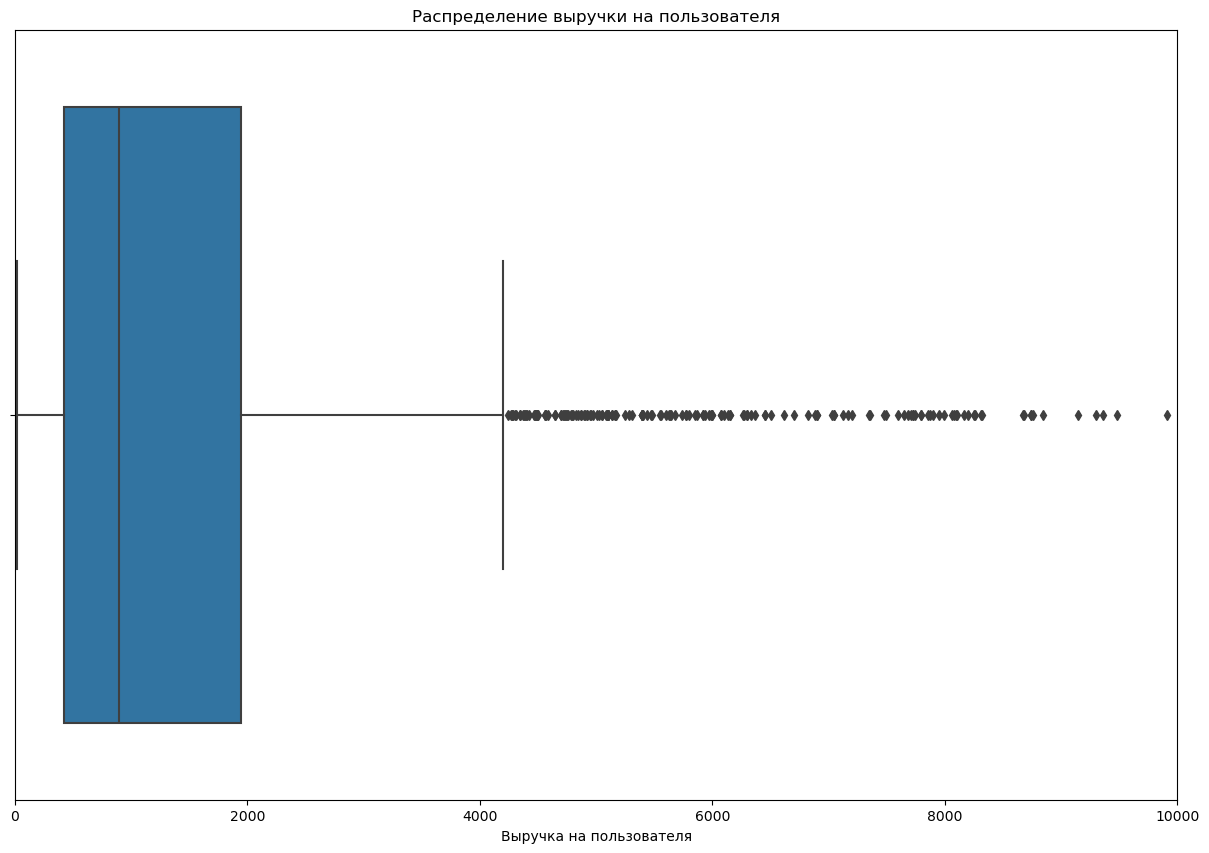

count      2410.000000
mean       1877.400173
std        5339.114435
min          15.000000
25%         420.250000
50%         899.500000
75%        1946.250000
max      166988.000000
Name: revenue, dtype: float64

In [67]:
plt.figure(figsize=(15,10))
sns.boxplot(data=revenue_per_users, x='revenue')
plt.title('Распределение выручки на пользователя')
plt.xlabel('Выручка на пользователя')
plt.xlim(0,10000)
plt.show()
revenue_per_users['revenue'].describe()

Медианная выручка на пользователя за все время - 899 д.е. Возьмем это число за границу выручки для сегментирования. Создаем переменную с id покупателями чья выручка равна и ниже медианного значения.

In [68]:
low_revenue_users = revenue_per_users.query('revenue <= 899')
display(low_revenue_users.sort_values('revenue').head(), low_revenue_users.sort_values('revenue').tail())
print('Кол-во пользователей с выручкой ниже среднего:',low_revenue_users['customer_id'].count())

customer_id  revenue
1404  9777b839-4212-41bb-94c2-87de3658248a     15.0
325   2330d859-e9cb-4c8f-abd0-55f9e27e6745     15.0
2299  f420bf6d-9985-47bc-95a7-5c640ad6d001     22.0
312   21df03ad-d9ac-47e9-a482-5372fd3e2464     22.0
399   2b6439c9-1ae1-4785-9509-ca4348b3d39a     22.0

customer_id  revenue
1518  a48b8615-7a8c-4a3b-8237-4b4c74a4a522    899.0
1608  ae650a78-e75a-4c2f-bd3c-21fdd23464f0    899.0
237   19583336-1bfd-42de-a86b-a887552c6c99    899.0
2402  ff0c73c3-6b62-4e67-8e12-bb83ed1851d5    899.0
1884  c99fb6e2-2583-46ba-aae4-b80037f4bdfa    899.0

Кол-во пользователей с выручкой ниже среднего: 1205


Итого получилось 1205 пользователей. Взглянем сколько пользователей с выручкой выше среднего. Должно получится так же 1205.

In [69]:
print('Кол-во пользователей с выручкой ниже среднего:',
      revenue_per_users.query('customer_id not in @low_revenue_users.customer_id')['customer_id'].count())

Кол-во пользователей с выручкой ниже среднего: 1205


Далее делим переменные first_group_orders и second_group_orders на две части по полученному признаку выручки.

In [70]:
first_group = second_group_orders.query('customer_id not in @low_revenue_users.customer_id')
second_group = second_group_orders.query('customer_id in @low_revenue_users.customer_id')
third_group = first_group_orders.query('customer_id not in @low_revenue_users.customer_id')
fourth_group = first_group_orders.query('customer_id in @low_revenue_users.customer_id')

Выведем кол-во в группах, а так же общую сумму, которая должна быть 2410, чтобы проверить правильность разбития по группам.

In [71]:
print('Кол-во покупателей в первой группе:', first_group['customer_id'].nunique())
print('Кол-во покупателей в первой группе:', second_group['customer_id'].nunique())
print('Кол-во покупателей в первой группе:', third_group['customer_id'].nunique())
print('Кол-во покупателей в первой группе:', fourth_group['customer_id'].nunique())
print('Общее количество покупателей:', first_group['customer_id'].nunique() + second_group['customer_id'].nunique() +
     third_group['customer_id'].nunique()+ fourth_group['customer_id'].nunique())

Кол-во покупателей в первой группе: 505
Кол-во покупателей в первой группе: 368
Кол-во покупателей в первой группе: 700
Кол-во покупателей в первой группе: 837
Общее количество покупателей: 2410


Отлично! Все верно.

Таким образом, мы имеем 4 группы:
    
    1 группа. 2 и более покупки / выручка выше среднего - 505 покупателей;

    2 группа. 2 и более покупки / выручка ниже среднего - 368 покупателей;
    
    3 группа. 1 покупка / выручка выше среднего - 700 покупателей;

    4 группа. 1 покупка / выручка ниже среднего - 837 покупателей;

Переходим к анализу сегментов.

### Анализ сегментов

#### Доли сегментов

Первым делом, взглянем на доли сегментов в общем кол-ве покупателей. Но сначала добавим номера групп в исходный датафрейм, используя простенькую функцию.

In [72]:
def segmenting(id): 
    if id in list(first_group['customer_id']): 
        return '1'
    elif id in list(second_group['customer_id']):
        return '2'
    elif id in list(third_group['customer_id']):
        return '3'
    else:
        return '4'
    
data['segment_group'] = data['customer_id'].apply(segmenting) 

In [73]:
print('Кол-во пользователей в группе 1:', data.loc[data['segment_group'] == '1', 'customer_id'].nunique())
print('Кол-во пользователей в группе 2:', data.loc[data['segment_group'] == '2', 'customer_id'].nunique())
print('Кол-во пользователей в группе 3:', data.loc[data['segment_group'] == '3', 'customer_id'].nunique())
print('Кол-во пользователей в группе 4:', data.loc[data['segment_group'] == '4', 'customer_id'].nunique())

Кол-во пользователей в группе 1: 505
Кол-во пользователей в группе 2: 368
Кол-во пользователей в группе 3: 700
Кол-во пользователей в группе 4: 837


Отлично, кол-во покупателей совпадает с ранее созданными группами. Построим круговую диаграмму.

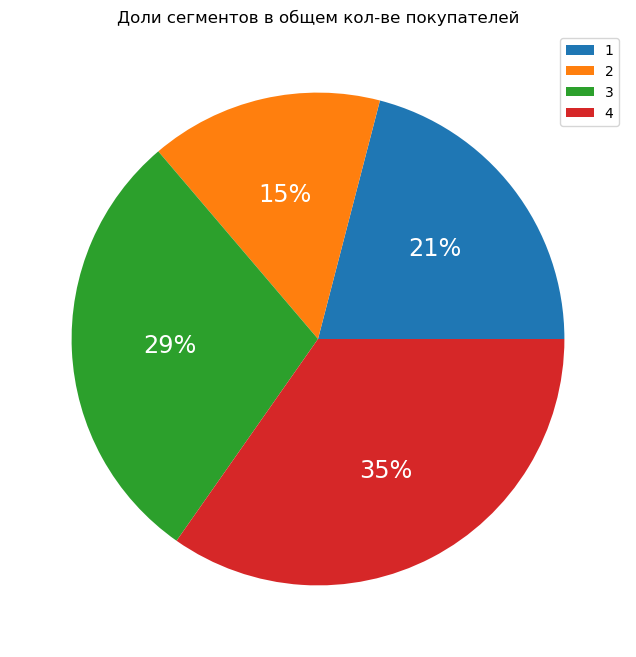

In [74]:
data.groupby('segment_group')['customer_id'].nunique().plot(kind='pie', 
                                           title='Доли сегментов в общем кол-ве покупателей', 
                                           autopct='%1.f%%', 
                                           figsize=(8,8),
                                           legend=True, 
                                           label='',
                                          labeldistance=None,
                                          textprops={'color':'white', 'fontsize':'xx-large'})
plt.show()

Наибольшая доля в общем кол-ве пользователей у 4 группы (35%) - покупатели, совершившие 1 покупку с выручкой ниже среднего. Далее идет 3 группа (29%) - 1 покупка с высокой выручкой. Следующая группа номер 1 (21%) - покупатели совершившие 2 и более покупок с выручкой выше среднего. И меньше всего покупателей (15%) с заказами от 2-ух и с низкой выручкой. Довольно странно, что покупателей с высокой выручкой с 2-мя и более заказами больше чем покупателей 2 группы.

#### Средний чек по сегментам

Далее переходим к анализу среднего чека по сегментам.

In [75]:
aov_segments = data
aov_segments = aov_segments.pivot_table(
    index='segment_group', values={'cost_position', 'order_id'},
           aggfunc={'cost_position':'sum','order_id':'nunique'}).reset_index()
aov_segments = aov_segments.rename(columns={'order_id':'count_orders','cost_position':'revenue'})
aov_segments['aov'] = round(aov_segments['revenue'] / aov_segments['count_orders'])
aov_segments

segment_group       revenue  count_orders     aov
0             1  1.761861e+06          1209  1457.0
1             2  1.843512e+05           743   248.0
2             3  2.237504e+06           700  3196.0
3             4  3.408180e+05           837   407.0

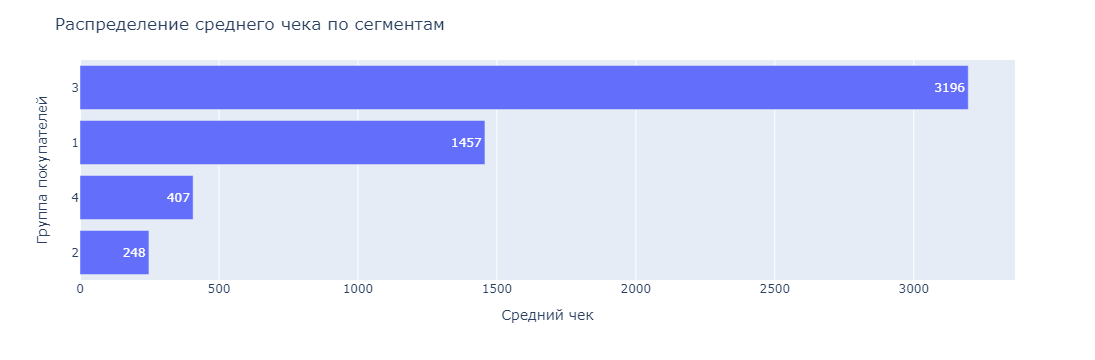

In [76]:
aov_segments_fig = px.bar(aov_segments.sort_values('aov'),
                          x = 'aov',
                          y = 'segment_group',
                         text='aov')
aov_segments_fig.update_layout(title='Распределение среднего чека по сегментам',
                              xaxis_title='Средний чек',
                              yaxis_title='Группа покупателей')

Самый высокий показатель среднего чека у группы покупателей, кто совершил 1-у покупку с выручкой выше среднего (3196 д.е.). Далее идут покупатели с 2-мя и более покупками и высокой выручкой (1457 д.е.). Ниже всех группы покупателей с 2-мя покупками и выше и с выручкой ниже среднего.

#### Средняя выручка на пользователя по сегментам

Рассмотрим распределение средней выручки на пользователя по сегментам

In [77]:
arrppu_segments = data
arrppu_segments = (arrppu_segments.pivot_table(
    index='segment_group',
    values = ('cost_position','customer_id'),
    aggfunc={'cost_position':'sum', 'customer_id':'nunique'})).reset_index()
arrppu_segments['arppu'] = round(arrppu_segments['cost_position'] / arrppu_segments['customer_id'])
arrppu_segments

segment_group  cost_position  customer_id   arppu
0             1   1.761861e+06          505  3489.0
1             2   1.843512e+05          368   501.0
2             3   2.237504e+06          700  3196.0
3             4   3.408180e+05          837   407.0

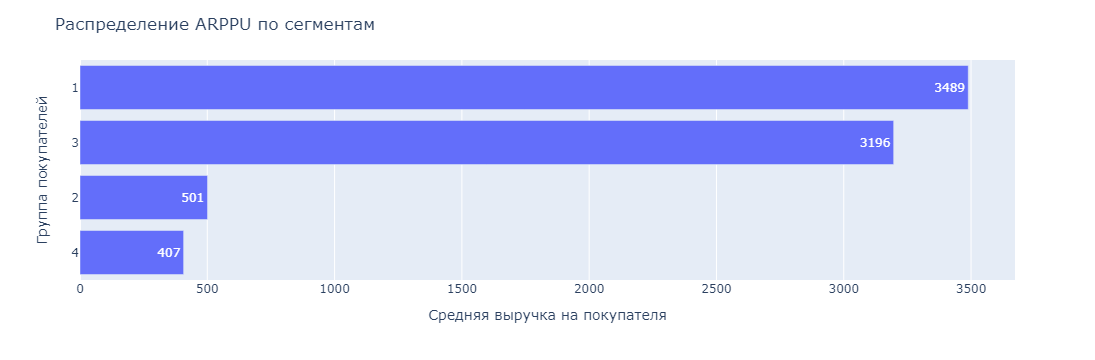

In [78]:
arrppu_segments_fig = px.bar(arrppu_segments.sort_values('arppu'),
                          x = 'arppu',
                          y = 'segment_group',
                         text='arppu')
arrppu_segments_fig.update_layout(title='Распределение ARPPU по сегментам',
                              xaxis_title='Средняя выручка на покупателя',
                              yaxis_title='Группа покупателей')

Судя по графику, можно сделать следующие выводы:
- Хоть средний чек у покупателей 3 сегмента выше(Для 3-го сегмента средний чек = ARPPU, т.к. покупатели совершали по 1 заказу) , чем у 1 группы, но по показателю средней выручки на покупателя 1 группа лидирует, так как в данной метрике не учитывается кол-во чеков;
- Покупатели из 2-го сегмента в среднем приносят больше выручки, хоть и не намного, чем 4-ая группа.

#### Распределение категорий продуктов среди сегментов.

Далее рассмотрим какие категории товаров преобладают у тех или иных групп покупателей по количесту заказанных.

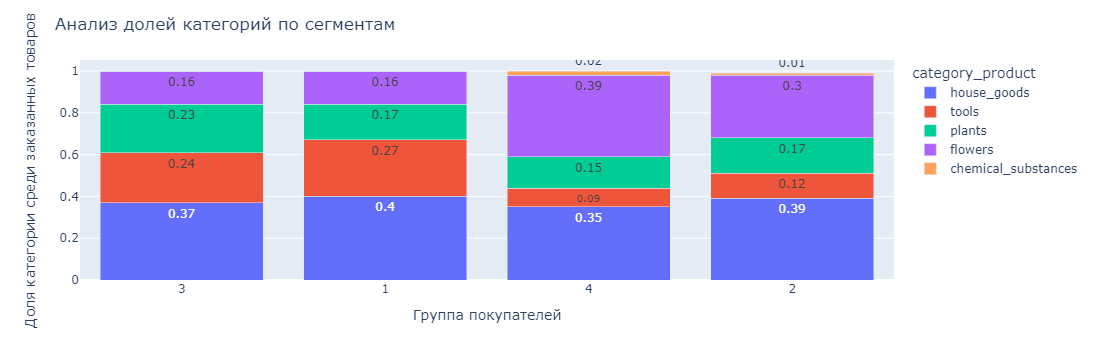

In [79]:
category_per_segments = data.groupby(['segment_group','category_product'], as_index=False).agg({'quantity':'sum'})\
    .sort_values(['quantity','category_product'], ascending=False)


category_per_segments_counts = category_per_segments.groupby('segment_group')['quantity'].sum()
category_per_segments['share_product'] = category_per_segments.apply(
    lambda row: row['quantity'] / category_per_segments_counts[row['segment_group']], axis=1) 
category_per_segments['share_product'] = round(category_per_segments['share_product'],2)

category_per_segments_fig = px.bar(category_per_segments, x='segment_group', y='share_product',
                                   color='category_product', barmode = 'stack', text='share_product')

category_per_segments_fig.update_layout(title='Анализ долей категорий по сегментам',
                            xaxis_title = 'Группа покупателей',
                            yaxis_title = 'Доля категории среди заказанных товаров',
                            yaxis={'categoryorder':'total ascending'})
category_per_segments_fig.show()

На графике видно, что у первой группы покупателей преобладают товары, заказанные в категории house_goods (40%), а менее всего среди группы популярна категория flowers(16%), chemical_substances и вовсе не были заказаны. 

У второй же группы популярная категория так же house_goods (39%) и flowers(30%), а вот самая редко заказываемая категория - tools (12%), не считая chemical_substances т.к. доля кол-ва заказанных товаров составляет около 1%. 

Среди третьей группы больше всего заказов на категорию house_goods(37%), plants(23%), tools (24%), chemical_substances и вовсе не были заказаны. 

Покупатели в четвертой группе более всего заказывают flowers(39%), однако house_goods так же имеют высокую долю (35%), что касается наименее популярной категории товаров, то это tools(9%).

Так же взглянем на динамику покупок товаров по группам в разрезе по месяцам. Введем функцию для построения графиков.

In [80]:
def plot_line_graph(row, num_group):
    season_category_func = data.loc[data['segment_group'] == num_group].pivot_table(
        index=('month','category_product'), values='quantity', aggfunc='sum').reset_index()
    
    plt.figure(figsize=(15,10))
    sns.lineplot(data=season_category_func, x='month', y='quantity', hue='category_product')
    plt.ylim([0, 900])
    plt.xlabel('Месяц')
    plt.ylabel('Кол-во заказанных товаров')

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



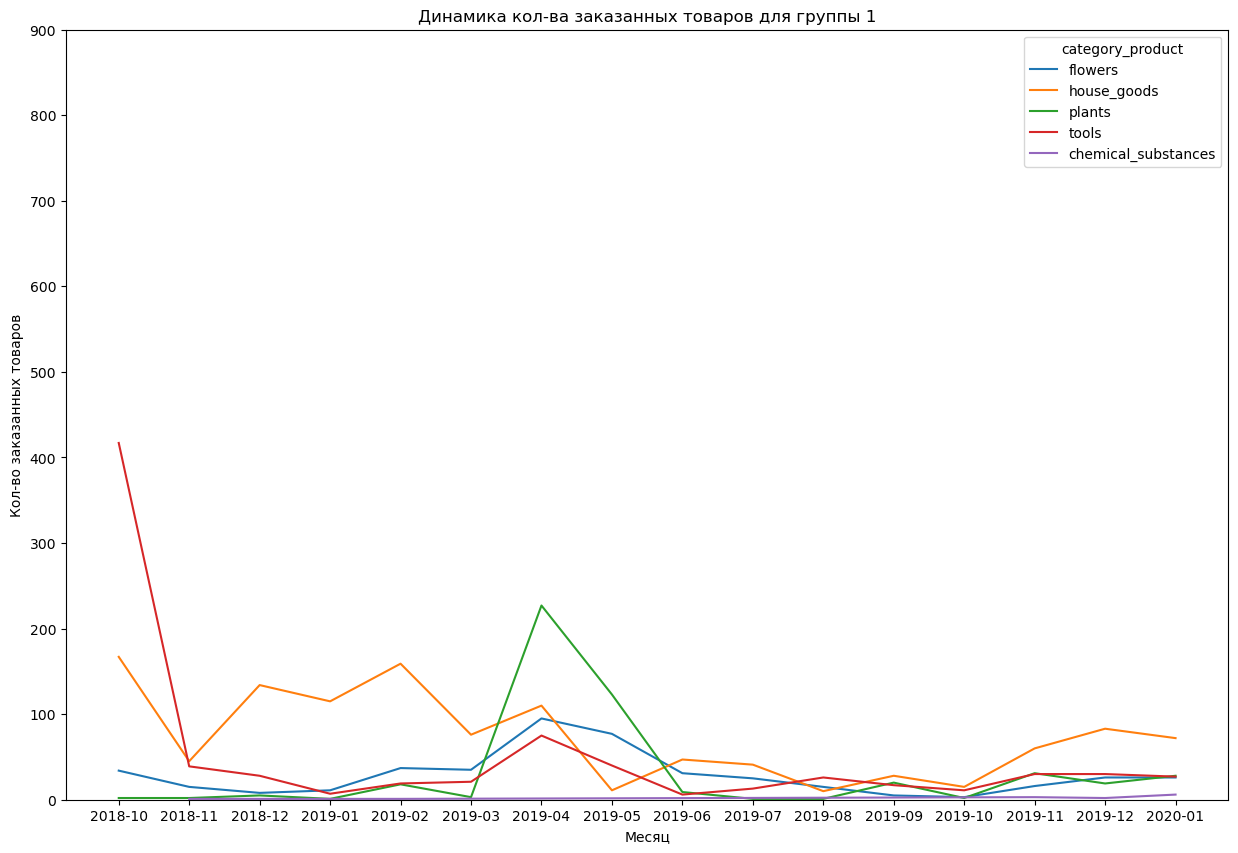

In [81]:
plot_line_graph(data, '1')
plt.title('Динамика кол-ва заказанных товаров для группы 1')
plt.show()

По графику для первой группы можно скаать следующее:
    
    - Категория tools имела наибольшие показатели заказанного кол-ва товара с начала периода, далее график пошел на спад, есть небольшой рост в апреле 2019 года.
    - Категория plants имеет довольно низкие показатели за исключением резкого роста к концу середине весны 2019 года, следом идет резкое падение.
    - Категория house_goods имеет высокие показатели кол-ва заказанного товара в начале года, начиная с весны показатели падают и приходят в норму ближе к концу 2019 года.
    - Flowers приблизительно стабильны за исключением весеннего периода.
    - По всем категориям у первой группы можно наблюдать рост начиная с 03.2019 по 05.2019, кроме товаров house_goods.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



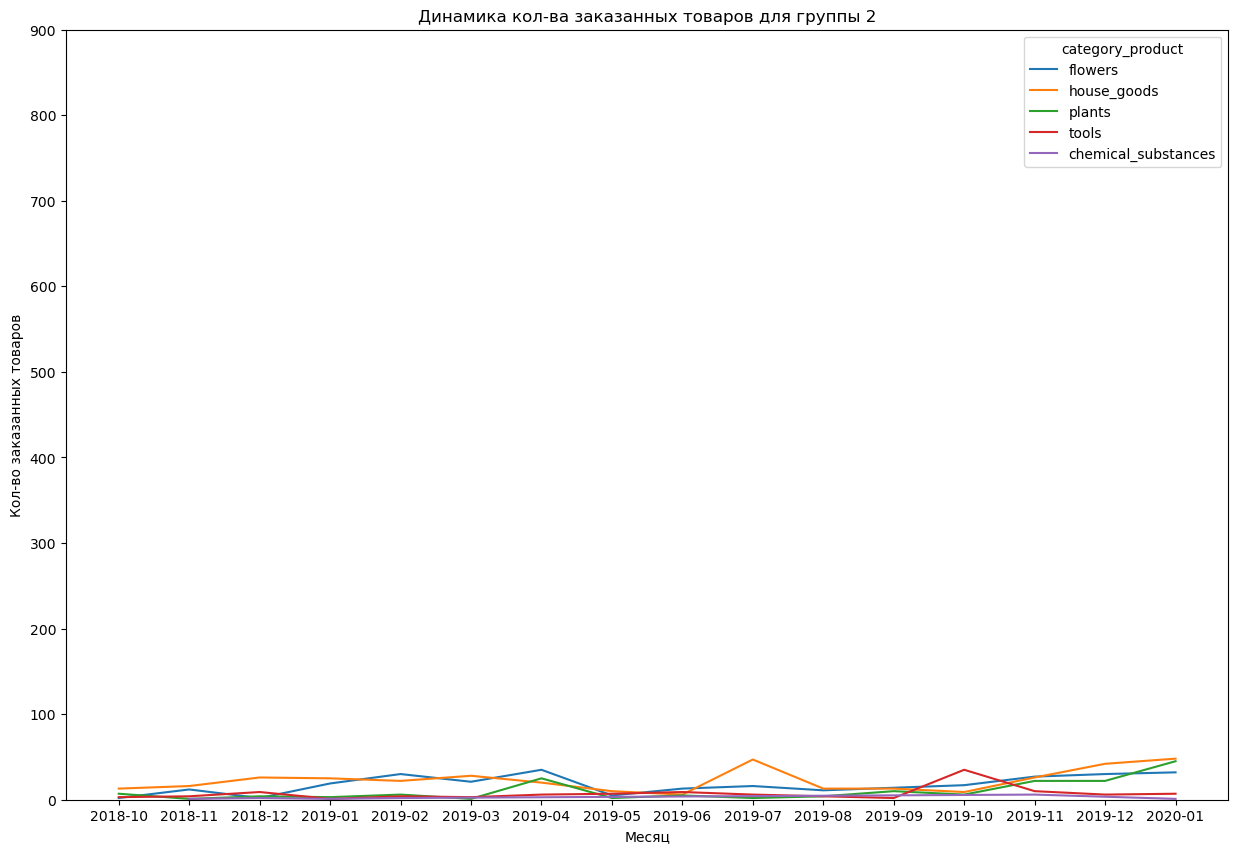

In [82]:
plot_line_graph(data, '2')
plt.title('Динамика кол-ва заказанных товаров для группы 2')
plt.show()

Т.к. объемы заказов у группы 2 довольно низкие, то трудно анализировать график с заданным лимитом по оси Y как и для всех групп. Увеличим масштаб.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



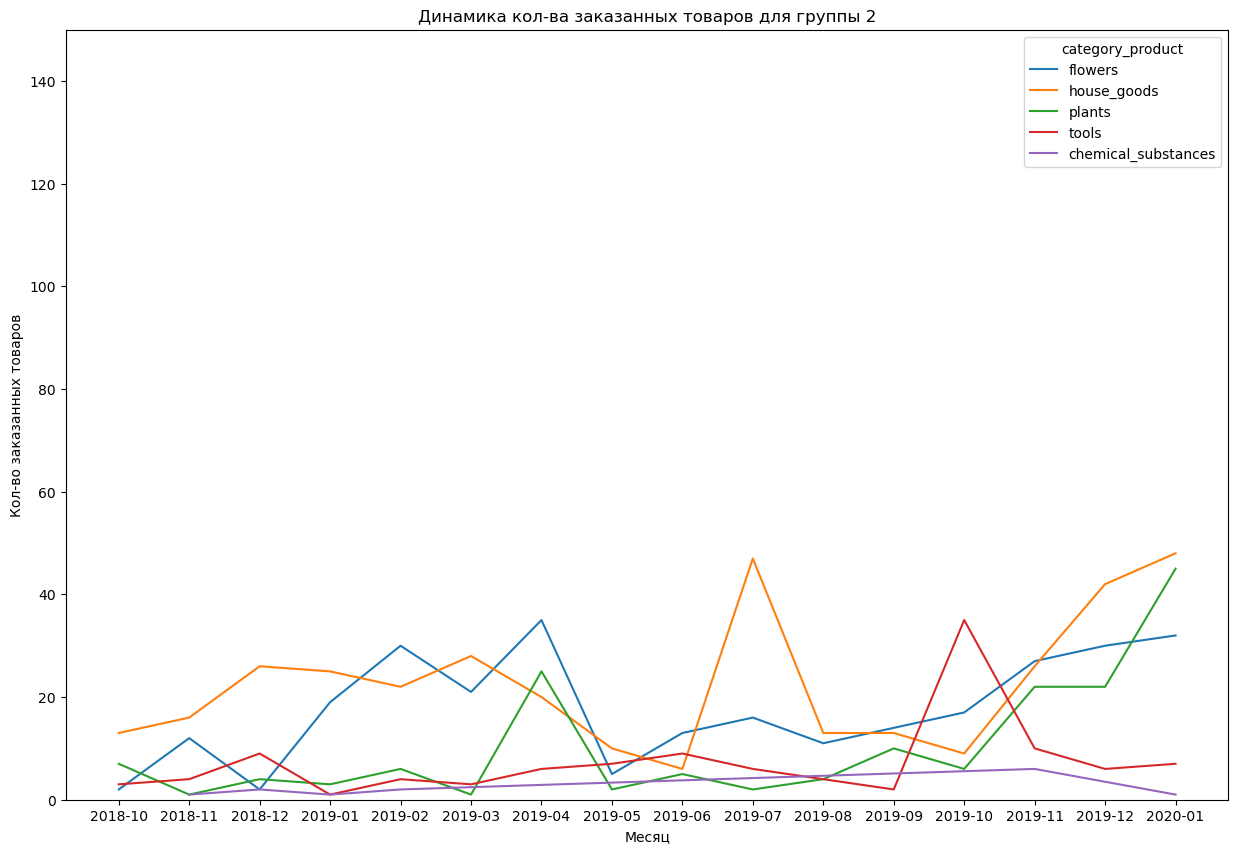

In [83]:
plot_line_graph(data, '2')
plt.ylim([0, 150])
plt.title('Динамика кол-ва заказанных товаров для группы 2')
plt.show()

Комментарии по группе 2:

    - Рост категории flowers с начала года 2019 и до конца весны 2019, далее резкое падение с последующим плавным восстановлением до высоких объемов;
    - Товары категории house_goods изначально имеют высокие объемы продаж, но затем постепенно падают, далее наступает резкий рост в середине лета и с середины октября;
    - Категория plants имеет пик 04.2019, а так же резкий рост, начиная от 10.2019.
    - Категория tools стабильна низка на протяжении почти всего 2019 года, однако наблюдается резкий рост с приходом осени;
    - chemical_substances: стабильно низкие объемы заказанных товаров

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



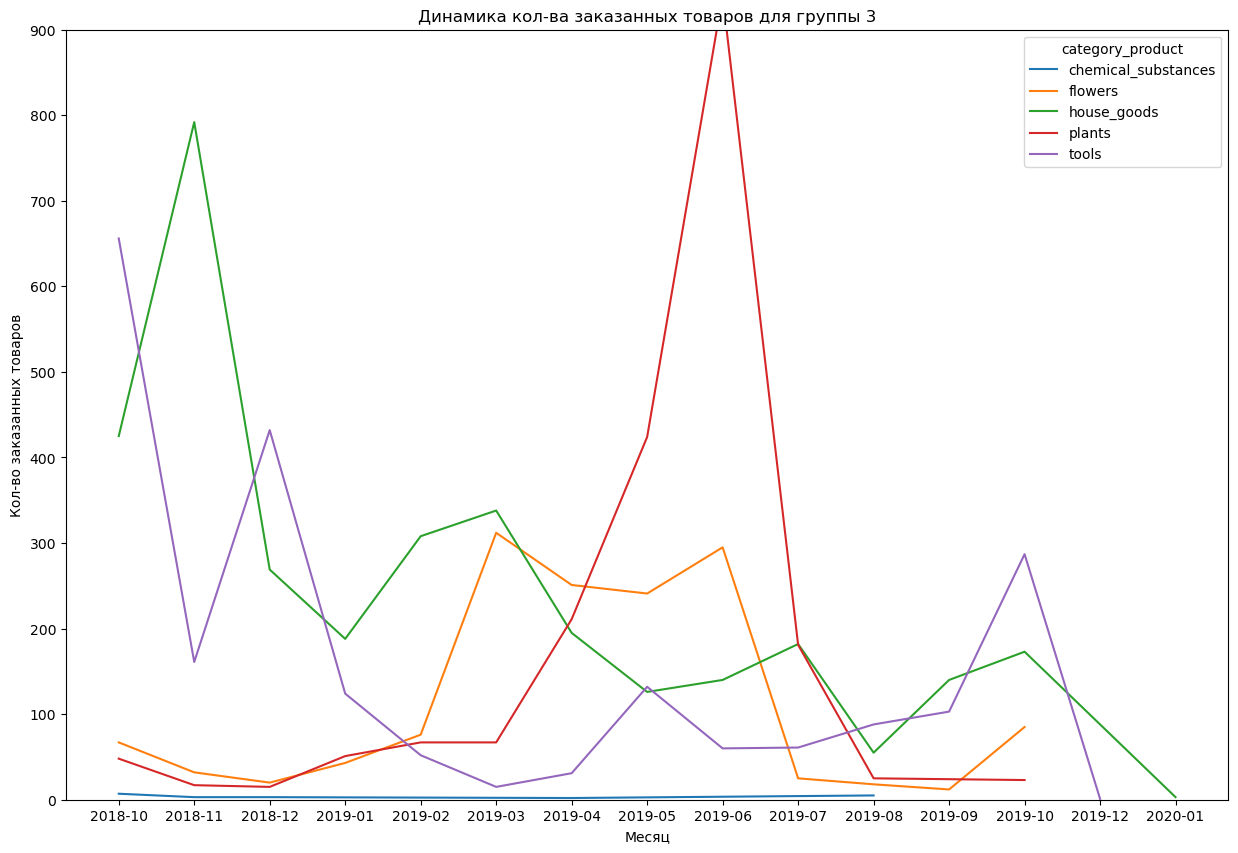

In [84]:
plot_line_graph(data, '3')
plt.title('Динамика кол-ва заказанных товаров для группы 3')
plt.show()

На мой взгляд, 3 группа наиболее динамична по объемам заказанных твоаров среди категорий, но это прежде всего связано с покупателями, которые могут спонтанно(вне зависимости от сезонов) заказывать большие чеки:
    
    - chemical_substances имеют наиболее низкие показатели;
    - flowers начиная с февраля 2019 по июнь 2019 были довольно большие заказы относительно остального периода;
    - Категория house_goods имеет высокий показатель заказанных товаров в конце 2018 года, с последующим падением, однако периодически происходят большие заказы, о чем говорят временные скачки у данной категории;
    - В июне 2019 наблюдается самый большой заказ plants среди всех категорий;
    - tools имеют высокообъемные заказы с конца 2018 года, однако вплоть до осени, заказы были маленького кол-ва

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



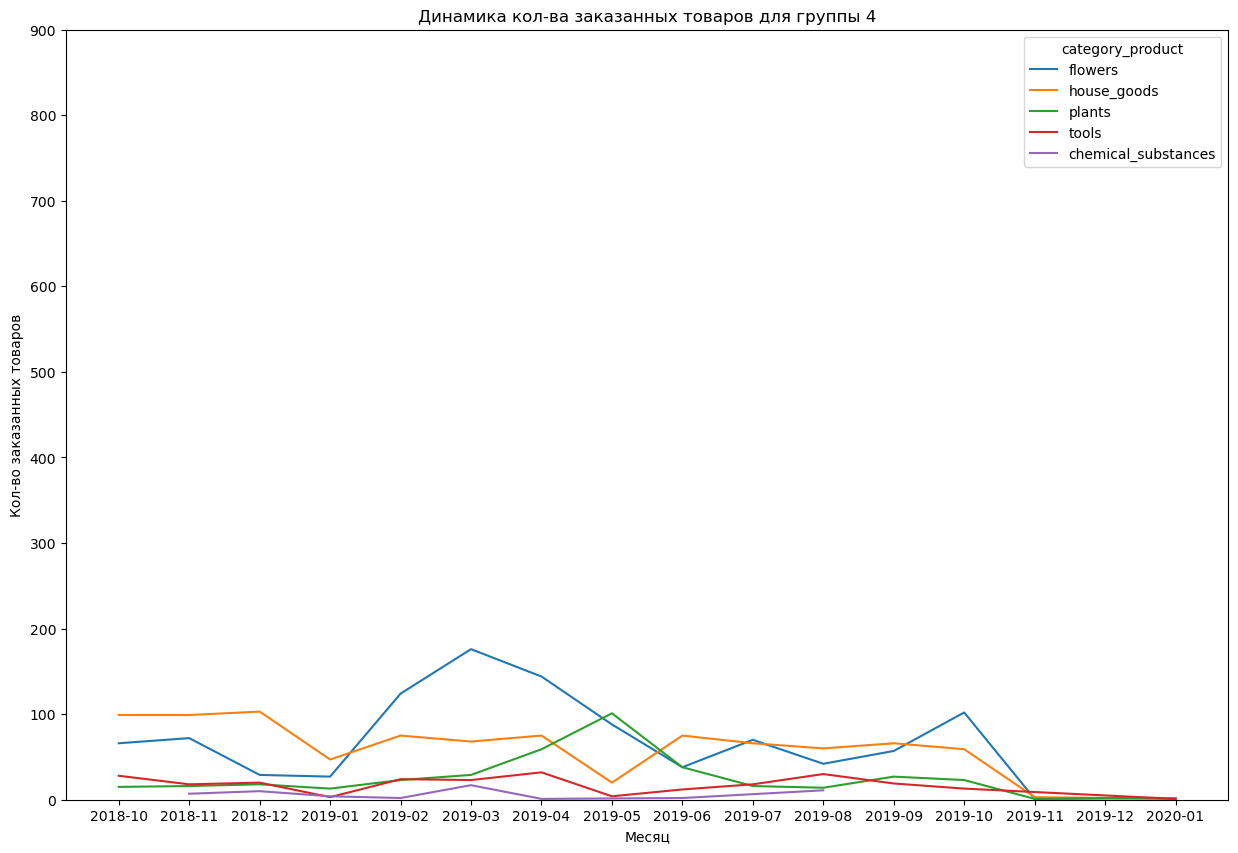

In [85]:
plot_line_graph(data, '4')
plt.title('Динамика кол-ва заказанных товаров для группы 4')
plt.show()

У покупатели группы 4 самые стабильные объемы среди категорий. Единственное, что бросатется в глаза это рост с начала 2019 по 06.2019 кол-ва заказанного товара в категории flowers/plants.

### Промежуточный итог

При сегментировании покупателей, мы использовали FM-анализ, который учитывает частоту совершения покупки, а также выручку. Изначально идея была поделить покупателей на 5 групп, однако при анализе кол-ва покупок на пользователя, мы столкнулись с проблемой, что болшинство покупателей совершают 2 покупки, а выше уже считается аномальным значением. Приняли решение составить профили по частоте для 1-го / 2-ух и более заказов. Теперь переходим к полученному описанию групп:

    - 1 группа (более 2-ух заказов/высокая выручка): Данная группа включает в себя 505 покупателей, что составляет около 21% от общего кол-ва. Является второй по среднему чеку (1457), ARPPU составляет 3489 д.е., наиболее популярные категории товаров(по объему заказанного товара)  - house_goods(40%) и toolds(27%). Динамика заказов примерно стабильна, за ислючением роста кол-ва заказанных товаров категории plants весной 2019 года.
    
    - 2 группа (более 2-ух заказов/низкая выручка): Данная группа включает в себя 368 покупателей (15%), является самой маленькой группой. Так же как и кол-во покупателей, средний чек данной группы самый низкий - 248 д.е., ARPPU составляет 501 д.е. Наиболее популярные категории: house_goods(39%) и flowers(30%). Самые низкие объемы заказнных товаров. Особенности в динамике объема заказнных товаров: категориия house_goods имеет резкий рост в середине лета 2019 года, plants имеет пик 04.2019, а ак же плавный рост, начиная от 07.2019, рост категории flowers с начала года 2019 и до конца весны 2019, далее резкое падение с последующим плавным восстановлением объемов
    
    - 3 группа (1 заказ/высокая выручка): Данная группа включает в себя 700 покупателей (29%). Средний чек данной группы самый высокий - 3196 д.е., ARPPU так же составляет 3196 д.е. Наиболее популярные категории: house_goods(37%), tools(24%), plants(23%). Самая нестабильная группа по кол-ву заказнных товаров. Могут быть как резкие скачки: plants(06.2019), house_goods(05.2019), flowers (03.2019) и др., так и резкие падения: house_goods(после 11.2018), tools (после 12.2018), fowers(после 06.2018) и др.
    
    - 4 группа (1 заказ/низкая выручка): Данная группа включает в себя наибольшее кол-во покупателей 837, что составляет более трети от всех (35%). Из интересных особенностей - средний чек данной группы выше чем у группы 2(так же с низкой выручкой) и составляет 407 д.е., ARPPU так же составляет 407 д.е. Самая популярная категория по объему заказанного товара является flowers(39%) и house_goods(35%). Динамика объемов заказов наиболее стабильна по сравнению с другими группами, единственная особенность это рост заказанных товаров категории flowers с начала 2019 года по середину весны того же года.

## Проверка гипотез

Однако просто проанализировать сегменты покупателей было бы скучно, можно сравнить их между собой с применением статистических тестов. Сравнивать будем две группы 2-ую и 3-ю, а также 2-ую и 4-ую группу. Напомним чем они отличаются:
  - 2 группа: более 2-ух заказов/низкая выручка
  - 3 группа: 1 заказ/высокая выручка
  - 4 группа: 1 заказ/невысокая выручка.
  
Использовать мы будет t-критерий Стьюдента для проверки двух независимых выборок. Так как проверять мы будет 3 гипотезы, две из которых для двух выборок, но в третьей добавим еще оддну, то применим попроавку Бонферонни на корректировку уровня значимости. Во всех тестах предлагаю использовать изначально уровень значимости в 5%.


###  Гипотеза равенства средних чеков групп 2 и 3

Первый делом, рассчитаем чеки для каждых покупателей среди групп 2 и 3.

In [86]:
second_aov = data.query('segment_group == "2"').pivot_table(
    index='order_id', values = 'cost_position', aggfunc='sum').reset_index()
second_aov = second_aov.rename(columns={'cost_position':'order_value'})
second_aov.head()

order_id  order_value
0     14497        303.0
1     14498        303.0
2     14544        135.0
3     14639        562.0
4     14673        304.0

In [87]:
third_aov = data.query('segment_group == "3"').pivot_table(
    index='order_id', values = 'cost_position', aggfunc='sum').reset_index()
third_aov = third_aov.rename(columns={'cost_position':'order_value'})
third_aov.head()

order_id  order_value
0     13547       4788.0
1     14486       1880.0
2     14496       1238.0
3     14500       5084.0
4     14501       1014.0

Далее формируем переменные со значениями чеков и используя уровень значимости в 5%, проверим равны ли средние чеки между группами.

Гипотезы:

H0: средний чек группы 2 = среднему чеку группы 3

H1: средний чек группы 2 != среднему чеку группы 3


In [88]:
alpha = 0.05 / 3 
print('Уровень значимости с поправкой Бонферонни:', round(alpha,3))

Уровень значимости с поправкой Бонферонни: 0.017


In [89]:
aov_2 = list(second_aov['order_value'])
aov_3 = list(third_aov['order_value'])

result_1 = st.ttest_ind(aov_2, aov_3)

print('p-value:', result_1.pvalue)

if result_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

p-value: 3.116069491023329e-37
Отвергаем нулевую гипотезу


По итогам данного тестирования, мы получили результат, что между средними чеками группы 2 и 3 есть значимые различия, при условии что нулевая гипотеза верна. Вероятность получить такие или еще более значимые различия составляет менее 1.7%. Отвергаем нулевую гипотезу в пользу альтернативной.

### Гипотеза равенства LTV групп 2 и 3

Чтобы сравнить общую выручку, которую приносят покупатели двух групп, сперва найдем общую сумму выручки для каждого покупателя групп.

In [90]:
second_ltv = data.query('segment_group == "2"').pivot_table(
    index='customer_id', values='cost_position', aggfunc='sum').reset_index()
second_ltv = second_ltv.rename(columns={'cost_position':'revenue'})
second_ltv.head()

customer_id  revenue
0  00c0f92a-121a-4883-a78d-2c7b5fe187de    321.0
1  00cd704a-a65c-4865-b39a-779f1b4f1d1a    213.0
2  01f95d43-4a8d-45e5-9c23-cccd211e6d30    118.0
3  02a27adc-a1fe-4aaf-9945-1ab779979537    165.0
4  02cb74c5-348f-43dc-ba4d-e546a21a07f1    298.0

In [91]:
third_ltv = data.query('segment_group == "3"').pivot_table(
    index='customer_id', values='cost_position', aggfunc='sum').reset_index()
third_ltv = third_ltv.rename(columns={'cost_position':'revenue'})
third_ltv.head()

customer_id  revenue
0  00299f34-5385-4d13-9aea-c80b81658e1b    914.0
1  002d4d3a-4a59-406b-86ec-c3314357e498   1649.0
2  003bbd39-0000-41ff-b7f9-2ddaec152037   2324.0
3  004d24e9-4a6c-4d0e-8727-8391dfd4b43a   1536.0
4  00bd74b1-2792-47db-a2f1-680a09ac5026    937.0

Формируем переменные со значениями выручки с покупателя и используя уровень значимости в 5%, проверим равны ли показатели ltv между группами.

Гипотезы будут следующие: 

H0: LTV группы 2 = LTV группы 3

H1: LTV группы 2 != LTV группы 3

При alpha = 0.17.

In [92]:
ltv_2 = list(second_ltv['revenue'])
aov_3 = list(third_ltv['revenue'])

result_2 = st.ttest_ind(ltv_2, aov_3)

print('p-value:', result_2.pvalue)

if result_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
  

p-value: 1.0104722700416083e-16
Отвергаем нулевую гипотезу


По итогам данного тестирования, мы получили результат, что между показателем LTV группы 2 и 3 есть значимые различия, при условии что нулевая гипотеза верна. Вероятность получить такие или еще более значимые различия составляет менее 1.7%. Отвергаем нулевую гипотезу в пользу альтернативной.

### *Гипотеза равенства средних чеков для  групп 2 и 4

Так же для интереса, предлагаю сравнить средние чек двух групп, 2 и 4, выручка которых ниже среднего. Формируем переменную со средними чеками для 4-ой группы.

In [93]:
fourth_aov = data.query('segment_group == "4"').pivot_table(
    index='order_id', values = 'cost_position', aggfunc='sum').reset_index()
fourth_aov = fourth_aov.rename(columns={'cost_position':'order_value'})
fourth_aov.head()

order_id  order_value
0     12624        375.0
1     14480        359.0
2     14482        376.0
3     14485        676.0
4     14487        514.0

Проверять будем следующие гипотезы:

H0: средний чек группы 2 = среднему чеку группы 4

H1: средний чек группы 2 != среднему чеку группы 4

При alpha = 0.017.

In [94]:
aov_4 = list(fourth_aov['order_value'])

result_3 = st.ttest_ind(aov_2, aov_4)

print('p-value:', result_1.pvalue)

if result_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

p-value: 3.116069491023329e-37
Отвергаем нулевую гипотезу


По итогам данного тестирования, мы получили результат, что между показателем среднего чека для группы 2 и 4 есть значимые различия, при условии что нулевая гипотеза верна. Вероятность получить такие или еще более значимые различия составляет менее 1.7%. Отвергаем нулевую гипотезу в пользу альтернативной.

### Промежуточный итог

В ходе данного этапа проверили три гипотезы, с использованием t-критерия Стьюдента для независимых выборок, уровень статистической значимости решили взять во всех проверках 5% (с поправкой Бонферонни alpha - 0.017). Првоеряли средующие гипотезы:

1) Средний чек группы 2 = среднему чеку группы 3;

2) LTV покупателей группы 2 = LTV покупателей группы 3;

3) Средний чек группы 2 = среднему чекну группы 4.

Все три гипотезы были отвегрнуты в пользу альтернативных, а значит по имеющимся у нас данных, мы склоняемся к тому, что
1) Средний чек групп 2 и 3 различен;

2) LTV для покупателей групп 2 и 3 различен;

3) Средний чек между группами 2 и 4 различен.

## Рекоммендации

### Рекламеные предложения для разных сегментов

На данном этапе, нам необходимо дать рекомменации для каждого сегмента по проводимым рекламным кампаниям. Предлагаю разобрать отдельно каждую группу. 

#### Группа 1 

Как мы помним, данная группа включает в себя покупателей, совершивших 2 и более заказов с выручкой выше среднего. Выведем распределение категорий товаров у данной группы. Введем функцию для построения графиков.

In [95]:
def accumulation_hist(number_group):
    colors = ['blue', 'red', 'green', 'perple', 'orange']
    category_per_segments_fig = px.bar(category_per_segments.loc[category_per_segments['segment_group'] == number_group],
                                   x='segment_group', y='share_product',
                                   color='category_product', barmode = 'stack', text='share_product')
    category_per_segments_fig.update_layout(title='Анализ долей категорий по сегментам',
                            xaxis_title = 'Группа покупателей',
                            yaxis_title = 'Доля категории среди заказанных товаров')
    
    category_per_segments_fig.show()
    plot_line_graph(data, number_group)

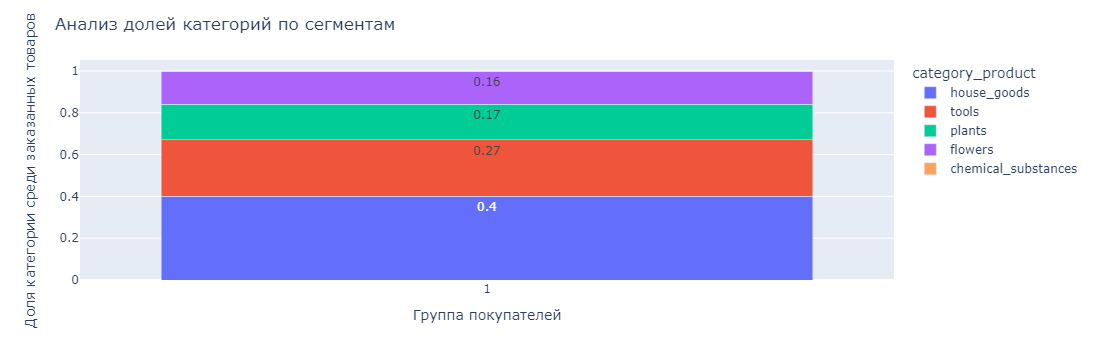

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



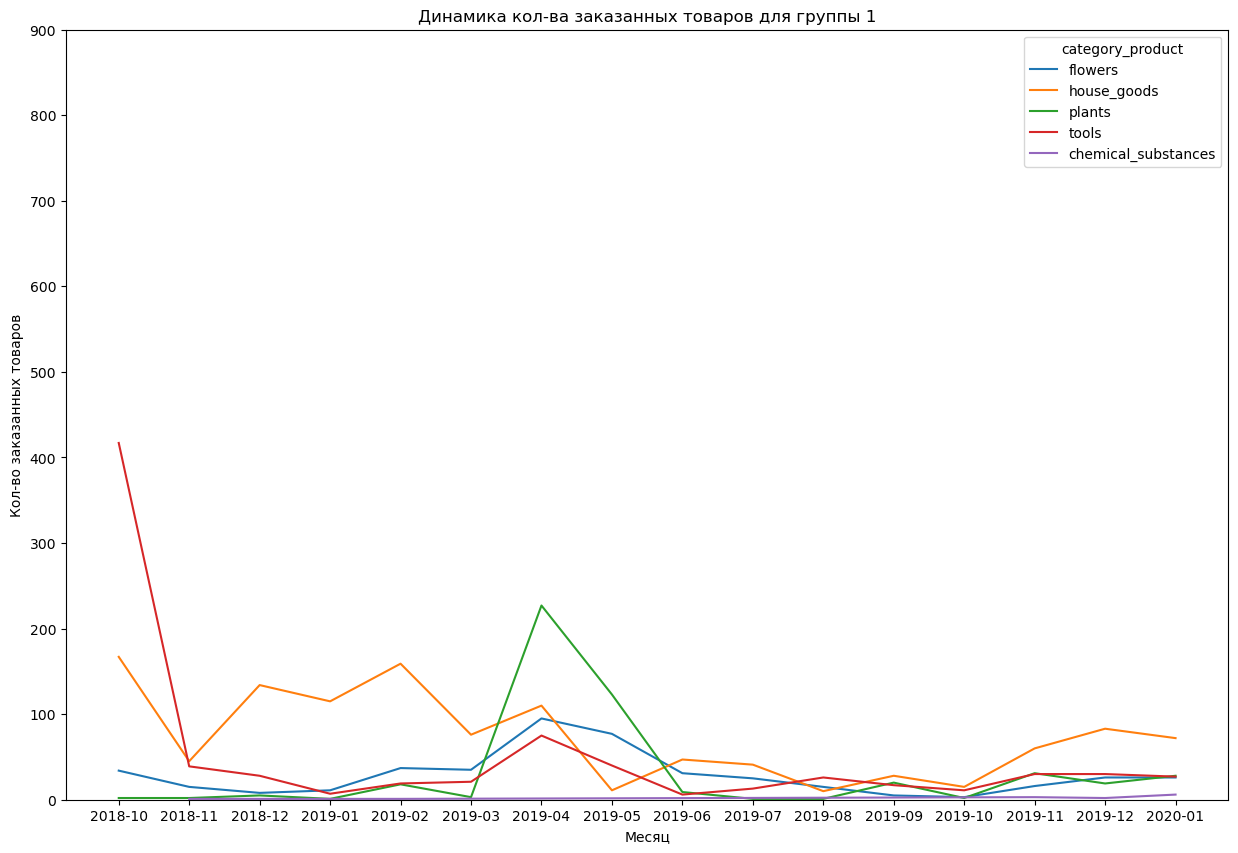

In [96]:
accumulation_hist('1')
plt.title('Динамика кол-ва заказанных товаров для группы 1')
plt.show()

Сопоставив графики можно сделать следующие выводы:
1) Самая часто покупаемая категория  house_goods имеет рост с конца 2018 года и держится высоко по март 2019 года;

2) Категория tools является четвертой частью от всех категорий плавные продажи, небольшой рост в апреле и августе 2019 года;

3) Категория plants (17%) и flowers(16%) имеют резкий скачок в конце весны;


Основными категориями у данного сегмента являются house_goods на неё и будем акцентировать внимание.

- так как категория house_goods резко падает с приходом мая, возможно стоит делать рассылку на почту/пуш-уведоления именно в этот период: поздняя весна/начало лето, чтобы как можно дольше сохранять интерес со стороны покупателей. С приходом осени ситуация более менее выравнивается и график идет вверх это можно заметить по концу периода 2018/2019 годов.

- категория tools: скачок данной категории приходится на период середины весны, далее график более стабилен. С большей долей вероятности это связано с тем, что в летний период люди попросту выезжают за город и занимаются дачными делами. Честно говоря, не думаю, что стоит тратить время и деньги на увеличение объема заказов именно в летний период. На мой взгляд, следует уделить внимание именно осени/зиме и заниматься маркетинговыми кампаниями именно в этот период.

- Категории flowers/plants по данным категориям трудно увеличить объемы заказов вне предлетнего периода, на графике видно, что продажи стабильно низкие во все времена года кроме середины весны. Мне кажется, можно вводить акции для остатков на складе на растения и цветы в период конца лета, так как большинство людей возвращаются с дач, то возможно специальные предложения могут быть интересны для покупателей.

#### Группа 2

2-ой сегмент покупателей имеет низкую выручку, но совершали покупки 2 и более раз. Взглянем на графики (объемы заказанных товаров у данной группы низкие, график динамики кол-ва заказанных товаров уменьшен).

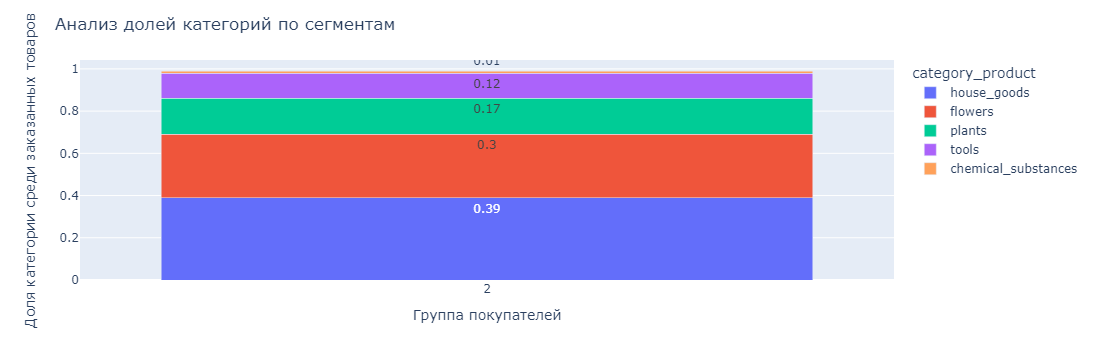

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



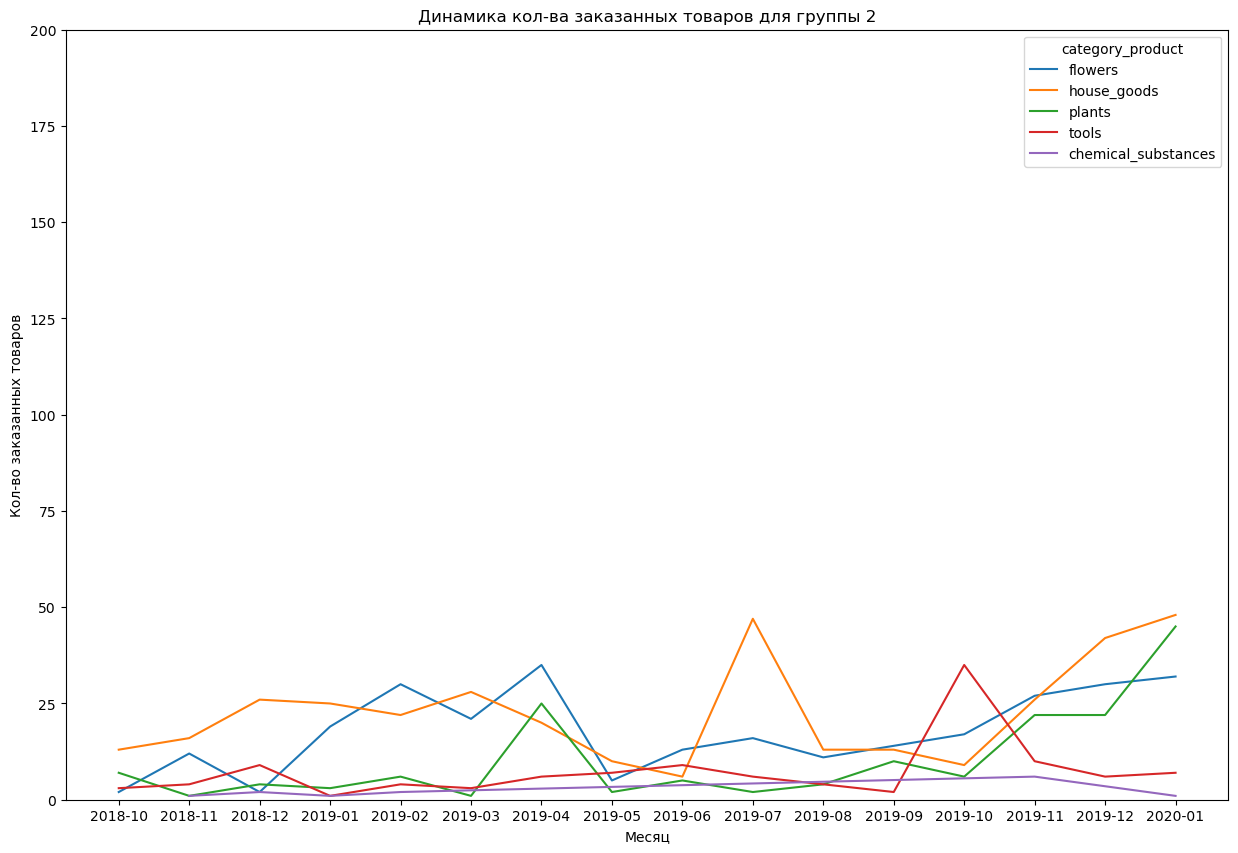

In [97]:
accumulation_hist('2')
plt.title('Динамика кол-ва заказанных товаров для группы 2')
plt.ylim([0, 200])
plt.show()

Судя по графикам, можно прийти к следующему:

1) Самая часто покупаемая категория house_goods (39%) имеет стабильные заказы до марта 2019 года, объем продаж падают до июя 2019 года далее следует резкий скачок с корректировкой и последующим ростом. Это говорит о том, что в целом категория стабильна ,но в период начала лета объемы падают.;

2) flowers у данной группы составляют 30% от общего кол-ва заказанных товаров, рост почти на протяжении всего периода. Падение с приходом мая;

3) Категория plants низкие показатели проданных товаров до апреля 2019 - резкий скачек с последющим падением. Однако что интересно это рост с начала августа

4) категория tools имеет резкий скачок с сентября 2019 г. с чем это связано, честно говоря идей нет, скорее всего был большой заказ или два, т.к. на протяжении всего периода объемы продаж довольно стабильны.


Основными категориями у данного сегмента являются house_goods и flowers на них и будем акцентировать внимание.

- категория house_goods: стоит уделить особое внимание началу марта и постараться максимально повторно привлечь покупателей именно в этот период, так как в апреле показатели объемов продаж начинают падать до июля.

- категория flowers: сильная просадка в мае, именно этому месяцу стоит уделить внимание - возможно стоит вводить спциальные акции и рассылку уведомлений именно в этот месяц, но с большей долей вероятности т.к. в весенний период обычно покупают цветы/семена для рассады, то с оттоком объема продаж сделать ничего не получиться.

- Так же как и flowers категория plants имеет пик продаж в апреле 2019 года. Направлять уведомления о специальных предложениях и специальных рекламных кампаний следует проводить после этого периода.


#### Группа 3

Далее рассмотрим группу 3. В данном сегменте покупатели, совершившие одну покупку за период с высокой выручкой.

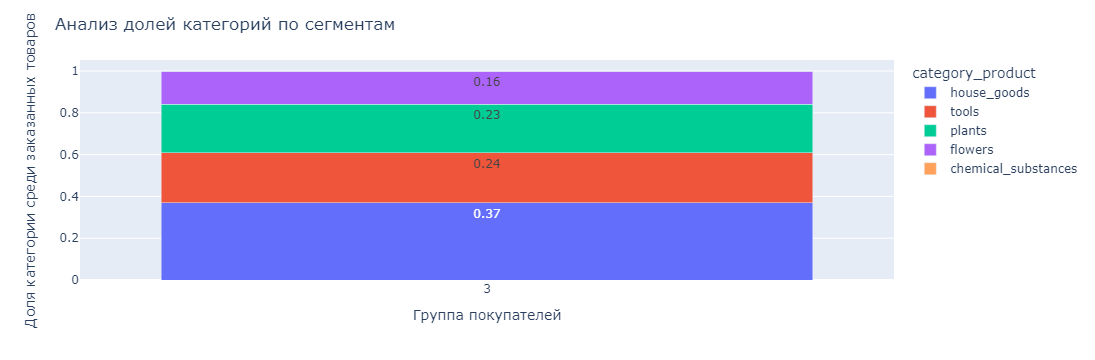

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



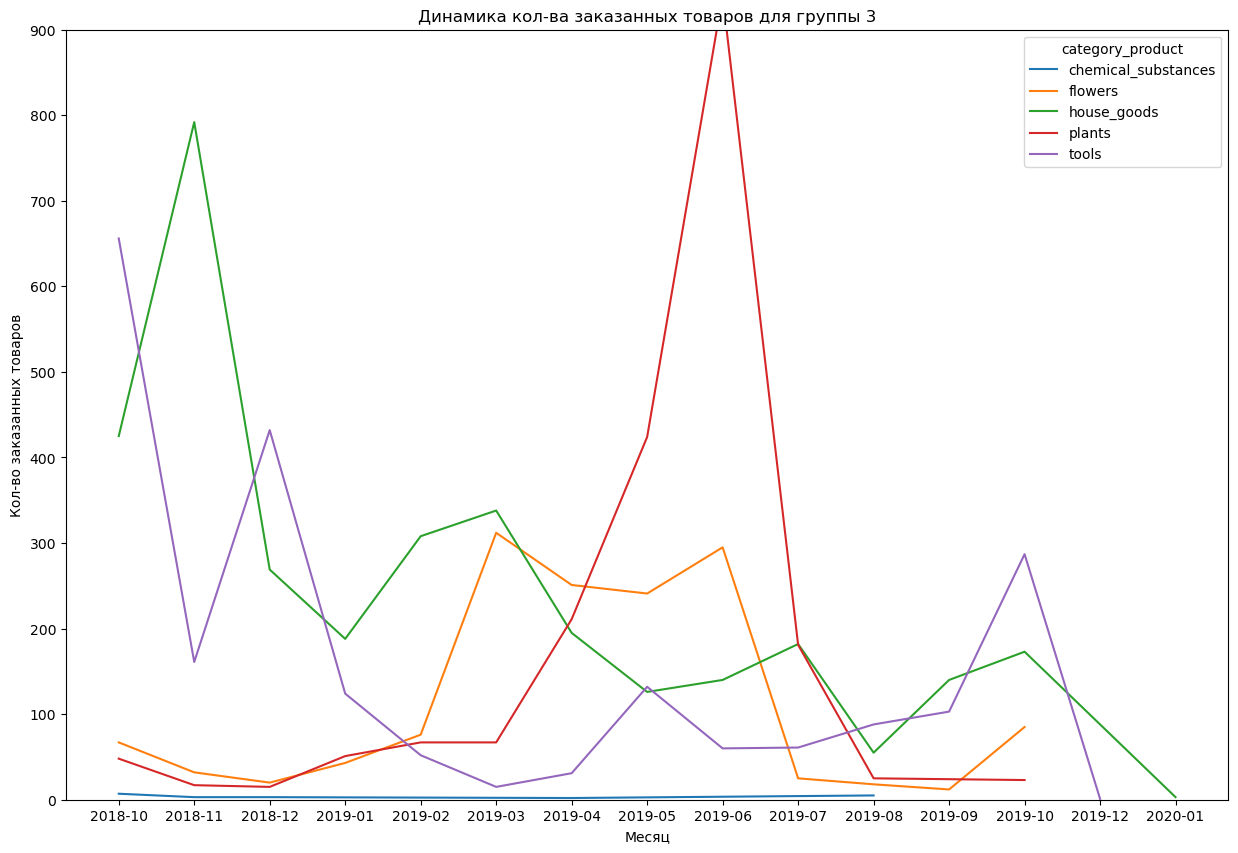

In [98]:
accumulation_hist('3')
plt.title('Динамика кол-ва заказанных товаров для группы 3')
plt.show()

Первым делом стоит упомянуть, что покупатели в данном сегменте совершали по 1 покупке за рассматриваемый период, а значит нашей задачей является максимально заинтересовать и заддержать данных покупателей.

1) Товары категории house_goods имеет самую большую долю. Нисходящую тренд, но есть четыре пиковые точки - ноябрь 2018, март 2019, июль 2019, октябрь 2019 года.

2) Tools занимают около чевтертой (24%) от всех заказанных товаров. Здесь можно заметить тенденцию падения с начала года и ростом с приходом осени. Рекие скачки наблюдаются - в начале периода (10.2018), декабре 2018, мае 2019 и октябре 2019 года.

3) Товары категории house_goods имеет нисходящую тенденцию, но есть четыре пиковые точки - ноябрь 2018, марте 2019, июль 2019, октябрь 2019 года.

3) Резкий скачок категории plants начиная с марта 2019, но после июня объем продаж резко идет на спад.

4) Flowers довольно сильно растут с начала 2019 года и имею высокие объемы вплоть до июня 2019.

Мне кажется, основной идеей для данного сегмента является удержание данных покупателей, возможно они и совершают покупки раз в год, однако приносимая выручка выше среднего. Здесь стоит направлять уведомления в период близкиий к пиковым точкам, чтобы покупатели не забывали совершать столь редкие, но дорогостоящие покупки. На мой взгляд, следует заранее привлекать покупателей и направлять им уведомления о новых товаров, пополнении  ассортимента и др.

- Для категории house_goods это будет предлетний и предосенний период;
- Для категории flowers/plants начало зимы, весенний период.

Именно в эти времена стоит напоминать о себе данным покупателям.

#### Группа 4

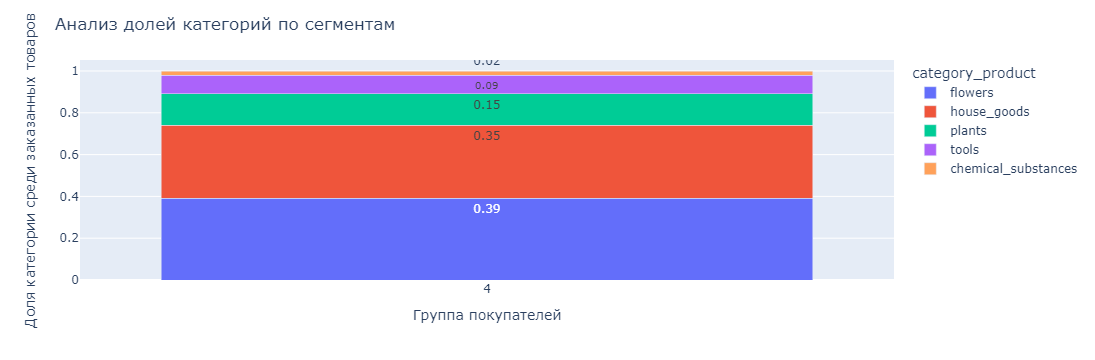

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\Python\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



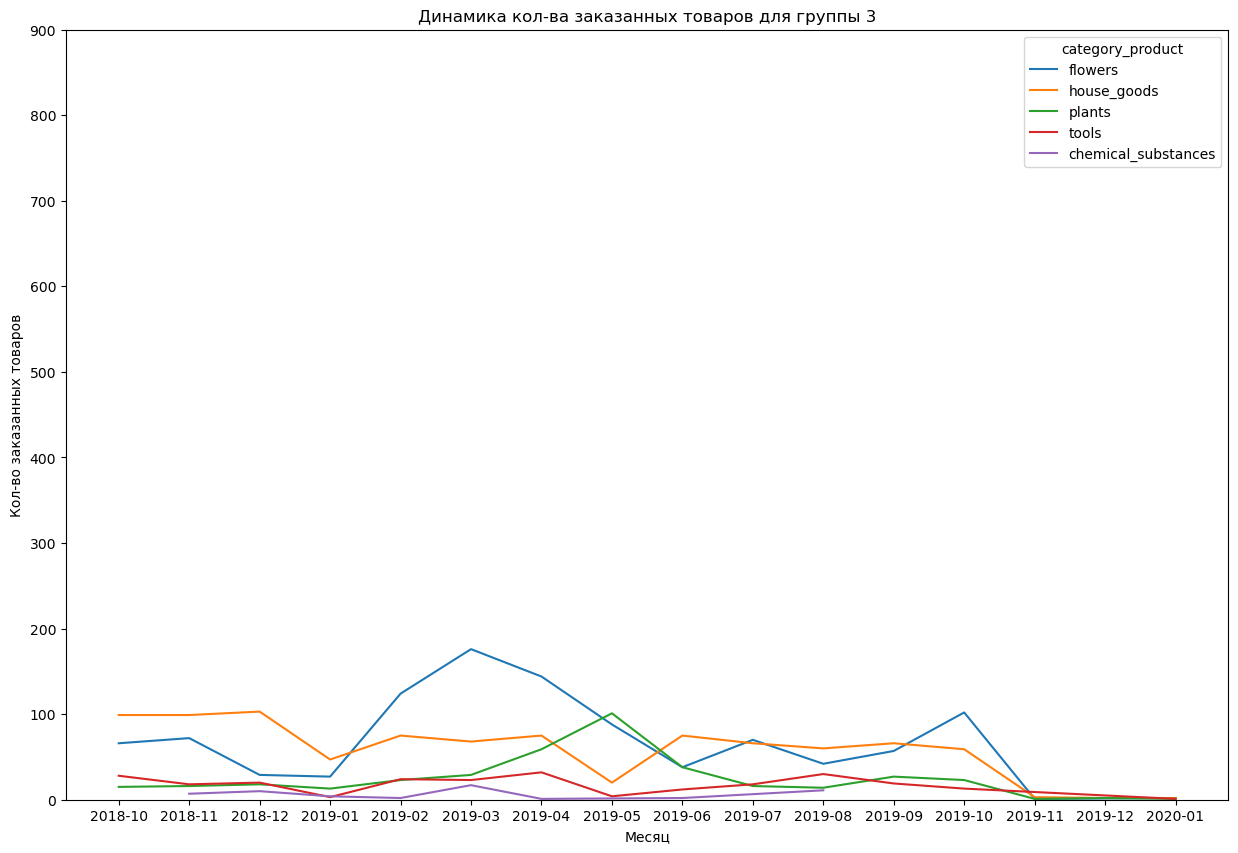

In [99]:
accumulation_hist('4')
plt.title('Динамика кол-ва заказанных товаров для группы 3')
plt.show()

На мой взгляд, данная группа включает себя случайных покупателей, так же как и предыдущая. Как мне кажется, покупателям данной категории стоит периодически напоминать о себе путем рассылки специальных предложений/акций/начислением бонусных баллов(при наличии бонусных карт) независимо от сезона. Стоит  обратить внимание на категории растительности: flowers (39%), house_goods(35%). Категория flowers сильно растут с приходом весны. Категория house_goods стабильна. 

### Улучшение объема продаж для сегментов

По ходу предыдущего шага (анализ сегментов), мы давали краткие комментарии по возможным маркетинговый кампаниям и их сезонности. Подитожим на данном этапе наши рекоммендации по улучшению объема продаж для сегментов.

**1 Группа**

Данная группа влючает в себя покупателей, которые оформили 2 и более заказов с высокой выручкой. Высокая выручка связана с категорией, ккоторую в основном покупает данный сегмент - house_goods. На мой взгляд, отличной идеей будет рассылка уведомлений с новыми товарами в летний период в данной категории, так как категория довольно большая по ассортименту, то каждому покупателю обязательно что нибудь приглянется. Так же при наличии бонусной системы, с покупок дорогостоящих товаров начисляется и большое кол-во бонусов, о чем стоит напоминать покупателю, чтобы побудить его совершить повторную покупку.

**2 Группа**

Данная группа включает в себя покупателей с невысокой выручкой от 2 и более заказов. Категория, отличающаяся от предыдущей группы является - flowers, которая занимает почти треть (30%) заказанных товаров в данном сегменте, house_goods имеет долю в 39%. Можно предположить, что в данном сегменте покупателей привлекают именно флористика и все, что с ней связано. Упор на рекламные кампании следует делать именно на них. на протяжении всего периода объемы продаж цветов довольно высоки, так же как и у house_goods, но с приходом лета, данные категории резко падают. Нам необходимо удержать покупателей именно в период начала лета. Одним и возможных варинатов, могут быть купонны или скидки на повторные покупки, сделанные весной. Сроком действия данных акций можно назначить июнь и отправка уведомлений за месяц о конце проведения акций, так как именно упущенная выгода будет побуждать людей сделать покупки в последний момент(июнь).

**3 Группа**

Третья группа покупателей являются не постоянные гости нашего интернет-магазина, но приносящие высокую выручку. Основной идеей стратегии будет именно удержать покупателей, пусть и они будут совершать покупки раз в год. На мой взгляд, данным покупателям следует делать рассылку незадолго до начала периода сезонности товаров именно для этого сегмента, когда совершаются крупные покупки:

- Для категории house_goods это будет предлетний и предвесенний период;
- Для категории flowers/plants начало зимы, весенний период.

Так же бонусная система будет отличным инструментом для повторного привлечения покупателей данного сегмента, с высокими покупками начисляются большое кол-во баллов, так же как и в случае со второй группой бонусные баллы необходимо ограничивать сроком. Еще одним инструментом могут послужить уведомления с уникальными товарами, представленными только в нашем магазине.

**4 Группа**

С четвертой группой все куда сложнее, низкая выручка по 1 заказу. Около трети покупок (74%) были в категориях flowers и house_goods. Основной стратегией будет рассылка о поступлении новый сортов/семян/саженцев и уникального ассортимента товаров для дома у данных категорий. Так как весной продажи и без этого растут, стоит направлять уведомления летом.

### Retention Rate

Так как ранее мы выяснили, что более половины покупателей совершают 1 покупку, а если и совершают несколько, то выше 2 покупок считается аномальным значением, то мне кажется, расчет показателя возврата покупателей не будет информативен и не принесет никакой пользы. Предлагаю рассмотреть распределение кол-ва дней между первым и последним заказом у групп 1 и 2, сравним их взглянем есть ли различия.

In [100]:
first_group_differ = data.loc[data['segment_group'] == '1'].pivot_table(
    index=('customer_id'), values='date', aggfunc={'min','max'}).reset_index()
first_group_differ['days_between'] = (first_group_differ['max'] - first_group_differ['min']).dt.days

second_group_differ = data.loc[data['segment_group'] == '2'].pivot_table(
    index=('customer_id'), values='date', aggfunc={'min','max'}).reset_index()
second_group_differ['days_between'] = (second_group_differ['max'] - second_group_differ['min']).dt.days

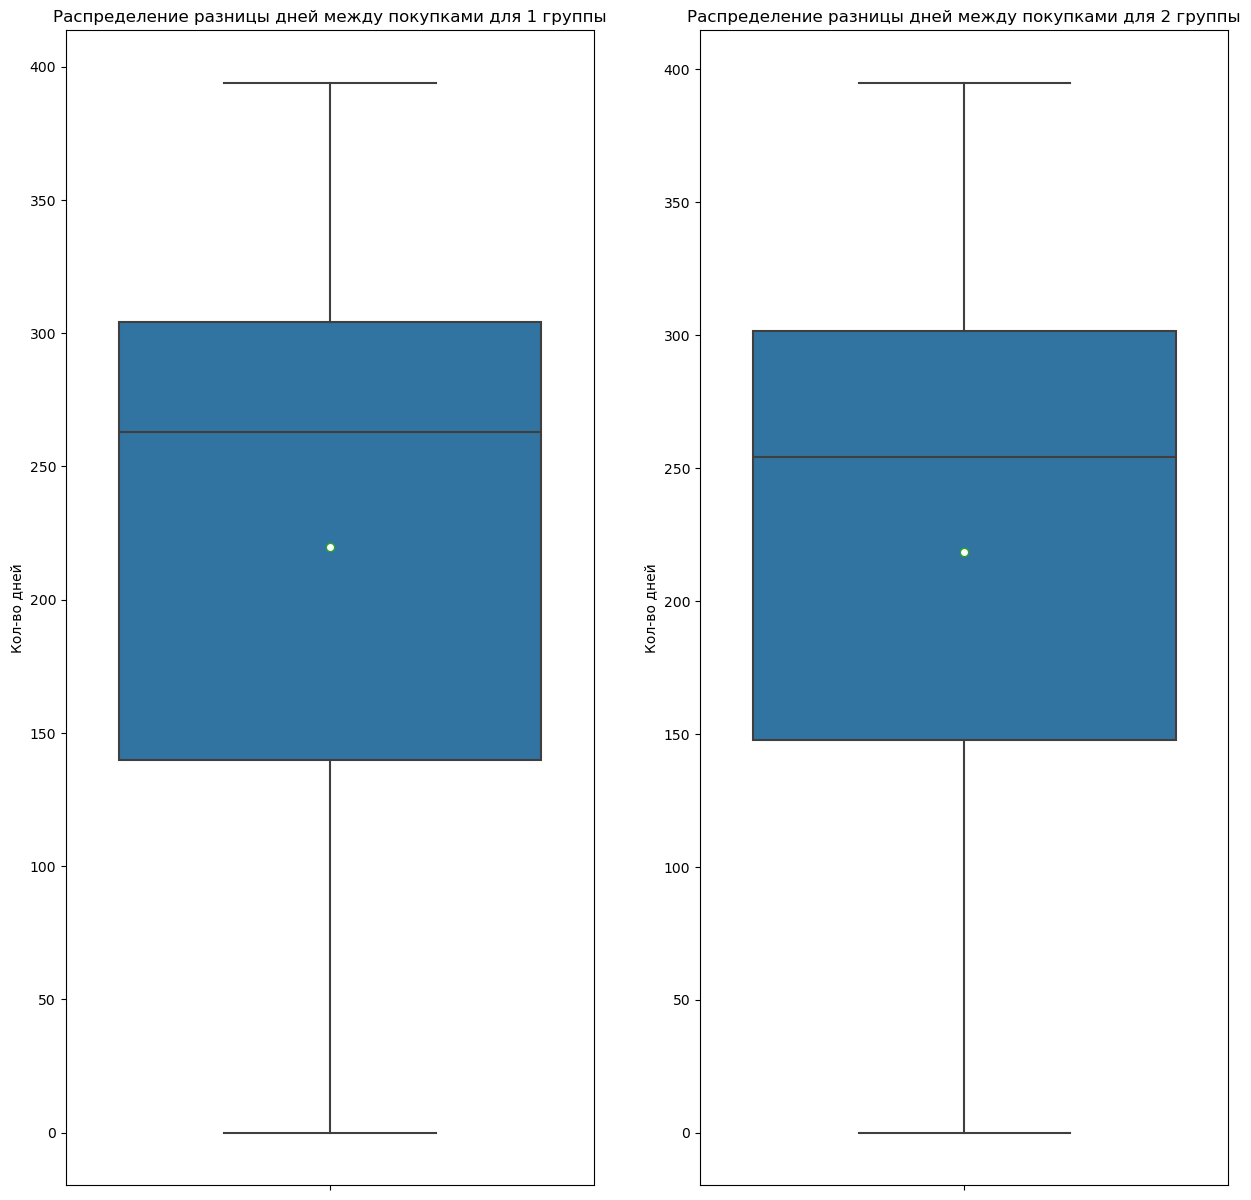

In [101]:
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
sns.boxplot(data=first_group_differ, y = 'days_between',
            showmeans=True, meanprops={'marker':'o','markerfacecolor':'white'})
plt.ylabel('Кол-во дней')
plt.title('Распределение разницы дней между покупками для 1 группы')

plt.subplot(1, 2, 2)
sns.boxplot(data=second_group_differ, y = 'days_between',
            showmeans=True, meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Распределение разницы дней между покупками для 2 группы')
plt.ylabel('Кол-во дней')
plt.show()


На мой взгляд, разница не существена. Медианное значение находится в районе 250 дней и у 1-ой и у 2-ой группы. Среднее значение чуть ниже около 220 дней.

## Презентация итогов

Большя часть наших коллег может принимать результаты исследования в виде файла Jupyter Notebook, однако далеко не все заказчики, а в нашем случае коллеги с отдела маркетинга, могут быть знакомы как с данным инструментом, так и с используемыми технологиями. Гораздно проще подитожить результаты нашего исследования в виде лаконичной, краткой презентации с основными идеями и выводами

ссылка на презентацию - https://disk.yandex.ru/i/p_N48-2JH1COMw

## Общий итог по работе

В начале работы в нашем распоряжении был датасет с информацией о транзакциях покупателей интернет-магазина товаров для дома "Пока все ещё тут". Нам необходимо было помочь нашим коллегам с маркетингового отдела исследовать наших покупателей , сегоментировать их и дать рекоммендации по улучшению маректинговых кампаний. Далее по плану:

1) Импортировали необходимые нам библиотеки, сохранили исходные данные. Просмотрели общую информацию о данных, сразу обозначили корректировки, в датасете хранилось 7474 строки.

2) Далее приступили к подготовке данных к исследованию. Скорректировали тип данных у столбца date, добавили столбец с месяцем и общей стоимостью заказанной позиции. Явных дубликатов и пропусков в исходных данных не было. Неявные дубликаты по столбцам order_id и customer_id решили оставить, так как без ущерба данным удалить не удалось бы. Категоризировали товары поделив на 5 групп: house_goods, tools, flowers, plants и chemical_substances. Больше всего в асстортименте магазина представлены товары категории house_goods, транзакций больше всего по категории plants. Медианное значение стоимости одной позииции составляет 188 д.е. Наиболее высокие цены на товары категорий: house_goods и tools. Медианное значение стоимости 1 заказа составляет 600 д.е. В среднем стоимость колеблется в пределах 200 - 1434 д.е. Самый дорогой заказ был на вантузы в кол-ве 1000 шт., данный заказ удалили. Так же обнаружили аномалии в кол-ве заказанных товаров, приняли решения считать, что заказы свыше 20 являются оптовыми заккупками, но даже среди них есть аномально болььшие 2 закза, которые превышаюь 99 перцентиль. Удалили их.

3) В ходе исследовательского анализа обнаружили, что общая тенденция выручки за рассматрвиаемый период падает, так же как и средний чек с ARPPU. Среднее кол-во заказов на пользователя стремится к 1, поэтому средний чек и ARPPU схожи в динамике. Для категорий типа - растения характерен рост продаж весной/начало лета, товары для дома и инструменты падают по показателям объема продаж с небольшим ростом в начале и конце года. Графики выручки по категориям схожи с объемами продаж.

4) Используя FM-анализ изначально рассчитывали поделить покупателей на 5 сегментов, но столкнулись с проблемой низкого кол-ва заказов на покупателя - более половины совершили 1 заказ. В итоге, сформировали 4 группы:
    
    - 1 группа (более 2-ух заказов/высокая выручка): Данная группа включает в себя 505 покупателей, что составляет около 21% от общего кол-ва. Является второй по среднему чеку (1457 д.е.), ARPPU составляет 3317 д.е, наиболее популярные категории твоаров(по объему заказанного товара)  - house_goods(40%) и tools(27%).
    
    - 2 группа (более 2-ух заказов/низкая выручка): Данная группа включает в себя 368 покупателей (15%), является самой маленькой группой. Так же как и кол-во покупателей, средний чек данной группы самый низкий - 248 д.е., ARPPU составляет 495 д.е. Наиболее популярные категории: house_goods(39%) и flowers(30%). Самые низкие объемы заказнных товаров.
    
    - 3 группа (1 заказ/высокая выручка): Данная группа включает в себя 700 покупателей (28%). Средний чек данной группы самый высокий - 3196 д.е., ARPPU составляет 3196 д.е. Наиболее популярные категории: house_goods(37%), tools(24%), plants(23%). Самая нестабильная группа по кол-ву заказнных товаров.
    
    - 4 группа (1 заказ/низкая выручка): Данная группа включает в себя нибольшее кол-во покупателей 837, что составляет более трети от всех (35%). Из интересных особенностей - средний чек данной группы выше чем у группы 2(так же с низкой выручкой) и составляет 407 д.е., 407 д.е., ARPPU составляет 3014 д.е. Самая популярная категория по объему заказанного товара является flowers(39%) и house_goods(35%).
    
5) Провели три сравнения между группами, используя t-критерий Стьюдента. Сравнивали средний чек 2 и 3 группы, так же средний чек 2 и 4 группы и показатель LTV между 2 и 3 группой. По всем проверкам результаты показали значимые различия между средними значениями групп при статистической значимости в 5%(используя поправку Бонферонни 0.017) . Все гипотезы были отвергнуты в пользу альтернативных.

***Ниже представленны рекоммендации по улучшению объема продаж с описание маркетинговых инструментов и пероидов проведения:***

**1 Группа**

Данная группа влючает в себя покупателей, которые оформили 2 и более заказов с высокой выручкой. Высокая выручка связана с категорией, ккоторую в основном покупает данный сегмент - house_goods. На мой взгляд, отличной идеей будет рассылка уведомлений с новыми товарами в летний период в данной категории, так как категория довольно большая по ассортименту, то каждому покупателю обязательно что нибудь приглянется. Так же при наличии бонусной системы, с покупок дорогостоящих товаров начисляется и большое кол-во бонусов, о чем стоит напоминать покупателю, чтобы побудить его совершить повторную покупку.

**2 Группа**

Данная группа включает в себя покупателей с невысокой выручкой от 2 и более заказов. Категория, отличающаяся от предыдущей группы является - flowers, которая занимает почти треть (30%) заказанных товаров в данном сегменте, house_goods имеет долю в 39%. Можно предположить, что в данном сегменте покупателей привлекают именно флористика и все, что с ней связано. Упор на рекламные кампании следует делать именно на них. на протяжении всего периода объемы продаж цветов довольно высоки, так же как и у house_goods, но с приходом лета, данные категории резко падают. Нам необходимо удержать покупателей именно в период начала лета. Одним и возможных варинатов, могут быть купонны или скидки на повторные покупки, сделанные весной. Сроком действия данных акций можно назначить июнь и отправка уведомлений за месяц о конце проведения акций, так как именно упущенная выгода будет побуждать людей сделать покупки в последний момент(июнь).

**3 Группа**

Третья группа покупателей являются не постоянные гости нашего интернет-магазина, но приносящие высокую выручку. Основной идеей стратегии будет именно удержать покупателей, пусть и они будут совершать покупки раз в год. На мой взгляд, данным покупателям следует делать рассылку незадолго до начала периода сезонности товаров именно для этого сегмента, когда совершаются крупные покупки:

- Для категории house_goods это будет предлетний и предвесенний период;
- Для категории flowers/plants начало зимы, весенний период.

Так же бонусная система будет отличным инструментом для повторного привлечения покупателей данного сегмента, с высокими покупками начисляются большое кол-во баллов, так же как и в случае со второй группой бонусные баллы необходимо ограничивать сроком. Еще одним инструментом могут послужить уведомления с уникальными товарами, представленными только в нашем магазине.

**4 Группа**

С четвертой группой все куда сложнее, низкая выручка по 1 заказу. Около трети покупок (74%) были в категориях flowers и house_goods. Основной стратегией будет рассылка о поступлении новый сортов/семян/саженцев и уникального ассортимента товаров для дома у данных категорий. Так как весной продажи и без этого растут, стоит направлять уведомления летом.  